In [1]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

### ToDo: 
- check here with the maximum by year values are fulfilled 
- try to maybe increase the maximum value 
- bewirkt der ausbau eine veränerung (kanns vielleicht sein dass max- tech - shift von der Veränderung abhält?)
- plot load factors 

In [2]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested 
    tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e


In [3]:
def read_data(case_study_name, input_file_name):
    current_path = os.getcwd()
    print("Current path:", current_path)
    file_results = os.path.normpath(current_path + "/results")
    print("File results:", os.path.normpath(file_results))
    file_path = os.path.join(current_path, "/results")
    print(file_path)
    # Normalize the path
    normalized_path = os.path.normpath(file_path)
    print("Normalized path:", normalized_path)

    # reading input data 
    folder_input = os.path.normpath(current_path + "/data")
    with open(folder_input + "/" + input_file_name) as file:
        input_data = yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
    #     n_fueling_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
    #     budget_penalty_minus_dict = yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
    #     budget_penalty_plus_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
    #     budget_penalty_plus_yearly_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
    #     budget_penalty_minus_yearly_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
    #     detour_time_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    #     f_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
        h_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    #     h_exist_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    #     h_minus_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    #     h_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
        q_fuel_infr_plus_dict= yaml.safe_load(file)
    
    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_by_route_dict.yaml")) as file:
        q_fuel_infr_plus_by_route_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    #     q_mode_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
        s_dict= yaml.safe_load(file)
    
    # budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
    # budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
    # detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
    # f = {process_key(key): process_value(value) for key, value in f_dict.items()}
    h = {process_key(key): process_value(value) for key, value in h_dict.items()}
    # h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
    # h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
    # h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
    q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
    q_fuel_infr_plus_by_route = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_by_route_dict.items()}

    # q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
    s  = {process_key(key): process_value(value) for key, value in s_dict.items()}
    # n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}
    # # detour_time = {}
    # # n_fueling = {}
    # output_data = {"budget_penalty_minus": budget_penalty_minus, "budget_penalty_plus": budget_penalty_plus, "detour_time": detour_time, "f": f, "h": h, "h_exist": h_exist, "h_minus": h_minus, "h_plus": h_plus, "q_fuel_infr_plus": q_fuel_infr_plus, "q_mode_infr_plus": q_mode_infr_plus, "s": s, "n_fueling": n_fueling}
    output_data = {"h": h, "q_fuel_infr_plus_by_route": q_fuel_infr_plus_by_route, "q_fuel_infr_plus": q_fuel_infr_plus, "s": s}  # Assuming you only want to return f_dict for now
    return input_data, output_data

In [4]:
case_study_names = {
    "cs_2025-09-06_21-32-31": "Baseline",
    "cs_2025-09-08_08-22-18": "Baseline-Overshoot",
    "cs_2025-09-06_21-59-29": "Undershoot-Baseline",
    "cs_2025-09-06_22-00-05": "Undershoot-Overshoot",

}
input_files = {
    "cs_2025-09-06_21-32-31": "input_rq2_baseline_20250906.yaml",
    "cs_2025-09-08_08-22-18": "input_rq2_baseline_overshoot_20250906.yaml",
    "cs_2025-09-06_21-59-29": "input_rq2_undershoot_baseline_20250906.yaml",
    "cs_2025-09-06_22-00-05": "input_rq2_undershoot_overshoot_20250906.yaml"
}

case_study_output = {}
case_study_input = {}
failed_case_studies = []

# First check if all required files exist
missing_files = []
for cs, input_file in input_files.items():
    current_path = os.getcwd()
    file_results = os.path.normpath(current_path + "/results")
    folder_input = os.path.normpath(current_path + "/data")
    
    # Check input file
    input_file_path = os.path.join(folder_input, input_file)
    if not os.path.exists(input_file_path):
        missing_files.append(f"Input file: {input_file_path}")
    
    # Check required output files
    required_output_files = [
        f"{cs}_h_dict.yaml",
        f"{cs}_q_fuel_infr_plus_dict.yaml", 
        f"{cs}_q_fuel_infr_plus_by_route_dict.yaml",
        f"{cs}_s.yaml"
    ]
    
    for output_file in required_output_files:
        output_file_path = os.path.join(file_results, output_file)
        if not os.path.exists(output_file_path):
            missing_files.append(f"Output file: {output_file_path}")

if missing_files:
    print("ERROR: The following required files are missing:")
    for file in missing_files:
        print(f"  - {file}")
    print("\nPlease ensure all files exist before proceeding.")
else:
    print("All required files found. Proceeding with data loading...")
for cs in case_study_names.keys():
    try:
        print(f"Reading data for case study: {case_study_names[cs]}")
        input_data, output_data = read_data(cs, input_files[cs])
        case_study_output[case_study_names[cs]] = output_data
        case_study_input[case_study_names[cs]] = input_data
        print(f"Successfully read data for: {case_study_names[cs]}")
    except Exception as e:
        print(f"Error reading data for case study {case_study_names[cs]}: {str(e)}")
        failed_case_studies.append((cs, case_study_names[cs], str(e)))
        continue

print(f"\nSuccessfully loaded {len(case_study_output)} case studies:")
for name in case_study_output.keys():
    print(f"  - {name}")

if failed_case_studies:
    print(f"\nFailed to load {len(failed_case_studies)} case studies:")
    for cs_id, cs_name, error in failed_case_studies:
        print(f"  - {cs_name} ({cs_id}): {error}")

All required files found. Proceeding with data loading...
Reading data for case study: Baseline
Current path: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Successfully read data for: Baseline
Reading data for case study: Baseline-Overshoot
Current path: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results
Successfully read data for: Baseline-Overshoot
Reading data for case study: Undershoot-Baseline
Current path: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\simuser\Documents\AntoniaGolab\iDesignRES_transcompmodel\examples\Basque country\resul

In [88]:
years_to_calc =range(2020, 2051)
y_init = 2020
g_init = 2020-25
Y_end = 2050
tech_split_per_case_study = {year: {} for year in years_to_calc}
veh_tech_per_case_study = {year: {} for year in years_to_calc}
tech_split_per_case_study_by_geo = {year: {} for year in years_to_calc}
veh_tech_per_case_study_by_geo = {year: {} for year in years_to_calc}
tech_split_per_region = {year: {} for year in years_to_calc}
veh_elec_per_region = {year: {} for year in years_to_calc}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    h = output_data["h"]

    for year in years_to_calc:
        # Original calculation by financial status only
        tech_split_by_fs = {}
        veh_tech_by_fs = {}
        for fs in financial_status_dict.keys():
            h_total = sum([h.get((year, r, tv, g), 0) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"]])
            h_elec = sum([h.get((year, r, tv, g), 0) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"] and techvehicle_list_dict[tv]["technology"] == 2])
            print(f"Year: {year}, h_elec: {h_elec}, h_total: {h_total}, fs: {fs}")
            tech_split_by_fs[fs] = h_elec / h_total if h_total > 0 else 0.0
            veh_tech_by_fs[fs] = h_elec
        
        # New calculation by financial status and geographic origin
        tech_split_by_fs_by_geo = {}
        veh_tech_by_fs_by_geo = {}
        for geo in [12, 13, 14]:
            tech_split_by_fs_by_geo[geo] = {}
            veh_tech_by_fs_by_geo[geo] = {}
            for fs in financial_status_dict.keys():
                h_total = sum([h.get((year, r, tv, g), 0) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"] and odpair_list_dict[r]["from"] == geo])
                h_elec = sum([h.get((year, r, tv, g), 0) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and fs == odpair_list_dict[r]["financial_status"] and odpair_list_dict[r]["from"] == geo and techvehicle_list_dict[tv]["technology"] == 2])
                
                tech_split_by_fs_by_geo[geo][fs] = h_elec / h_total if h_total > 0 else 0.0
                veh_tech_by_fs_by_geo[geo][fs] = h_elec
        
        # New calculation: tech split per region (without financial status)
        tech_split_by_geo = {}
        veh_elec_by_geo = {}
        for geo in [12, 13, 14]:
            h_total = sum([h.get((year, r, tv, g), 0) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and odpair_list_dict[r]["from"] == geo])
            h_elec = sum([h.get((year, r, tv, g), 0) for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, r, tv, g) in h and odpair_list_dict[r]["from"] == geo and techvehicle_list_dict[tv]["technology"] == 2])
            
            tech_split_by_geo[geo] = h_elec / h_total if h_total > 0 else 0.0
            
            veh_elec_by_geo[geo] = h_elec
        
        tech_split_per_case_study[year][case_study_name] = tech_split_by_fs
        veh_tech_per_case_study[year][case_study_name] = veh_tech_by_fs
        tech_split_per_case_study_by_geo[year][case_study_name] = tech_split_by_fs_by_geo
        veh_tech_per_case_study_by_geo[year][case_study_name] = veh_tech_by_fs_by_geo
        tech_split_per_region[year][case_study_name] = tech_split_by_geo
        veh_elec_per_region[year][case_study_name] = veh_elec_by_geo


Year: 2020, h_elec: 764.35, h_total: 74512.14223, fs: First quintile
Year: 2020, h_elec: 961.05, h_total: 92401.333932, fs: Second quintile
Year: 2020, h_elec: 1129.34, h_total: 106173.474917, fs: Third quintile
Year: 2020, h_elec: 1254.07, h_total: 110042.494294, fs: Fourth quintile
Year: 2020, h_elec: 1645.31, h_total: 136420.048533, fs: Fifth quintile
Year: 2020, h_elec: 386.46, h_total: 32982.329663, fs: Commercial
Year: 2021, h_elec: 731.87, h_total: 79119.923441, fs: First quintile
Year: 2021, h_elec: 920.17, h_total: 98836.876995, fs: Second quintile
Year: 2021, h_elec: 1081.31, h_total: 114926.640637, fs: Third quintile
Year: 2021, h_elec: 1197.36, h_total: 137095.222254, fs: Fourth quintile
Year: 2021, h_elec: 1346.08, h_total: 173031.638686, fs: Fifth quintile
Year: 2021, h_elec: 325.04, h_total: 40580.972942, fs: Commercial
Year: 2022, h_elec: 699.39, h_total: 84150.885051, fs: First quintile
Year: 2022, h_elec: 879.29, h_total: 105721.074294, fs: Second quintile
Year: 2022,

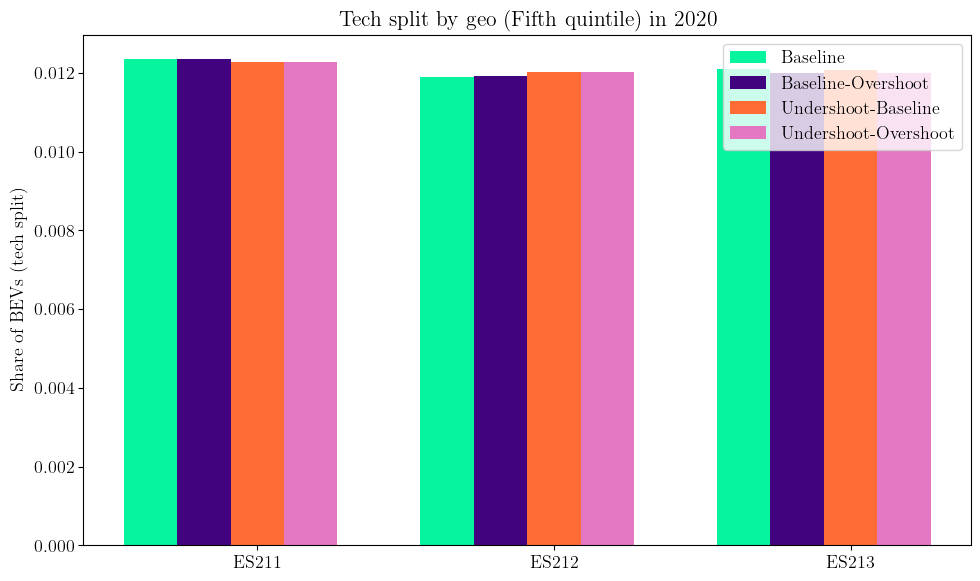

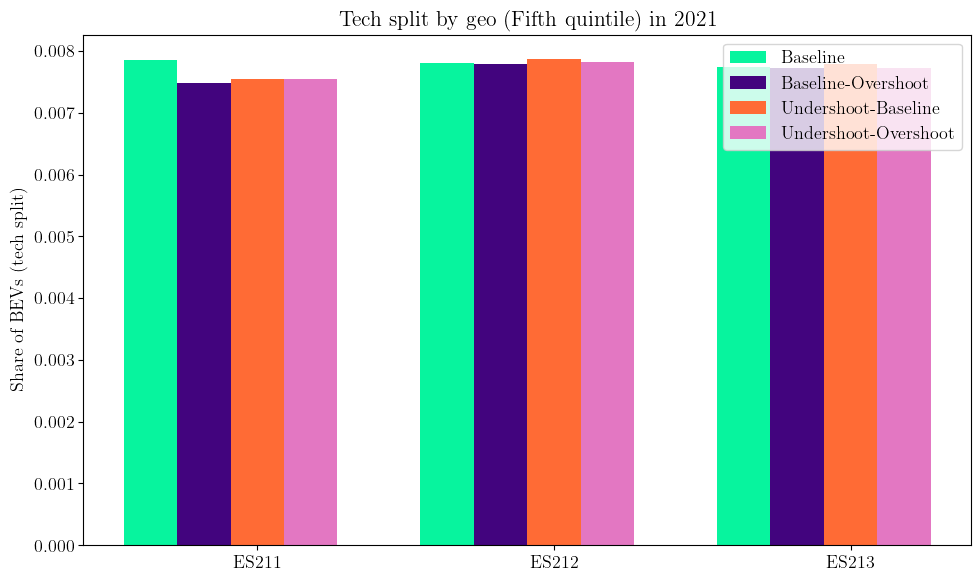

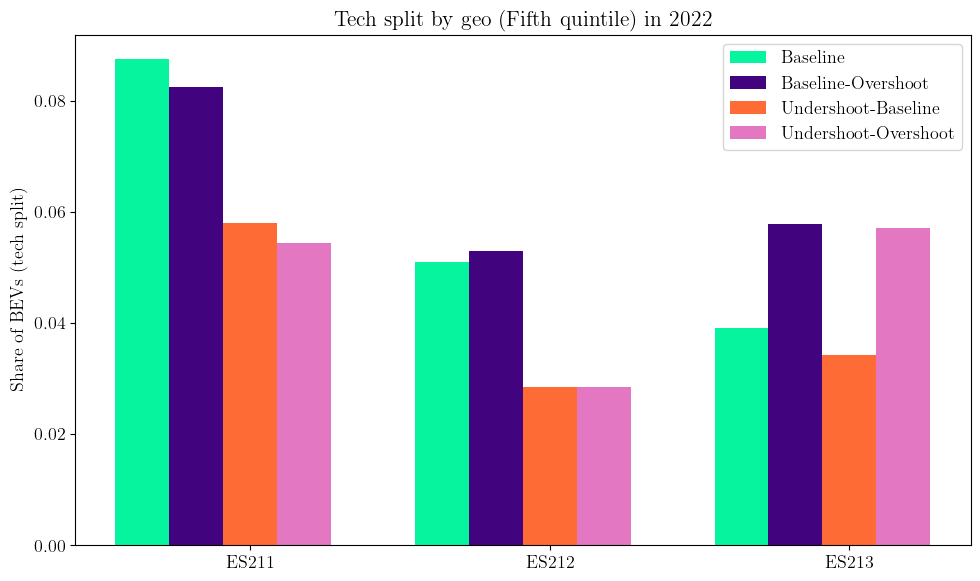

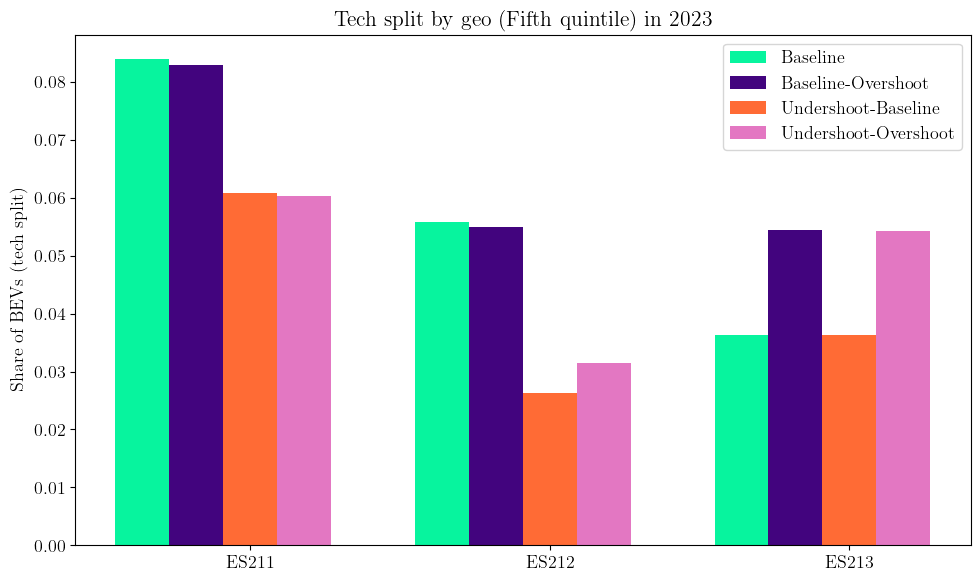

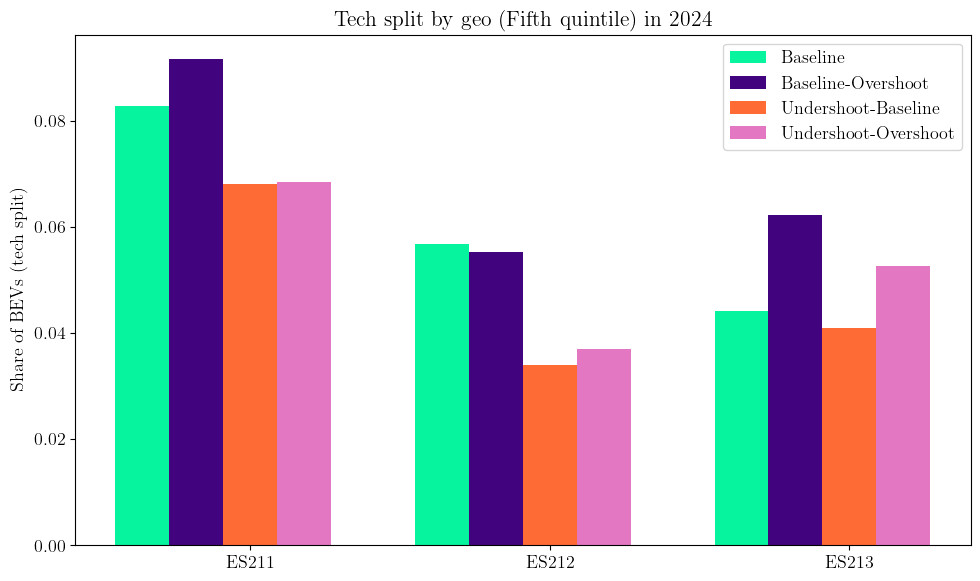

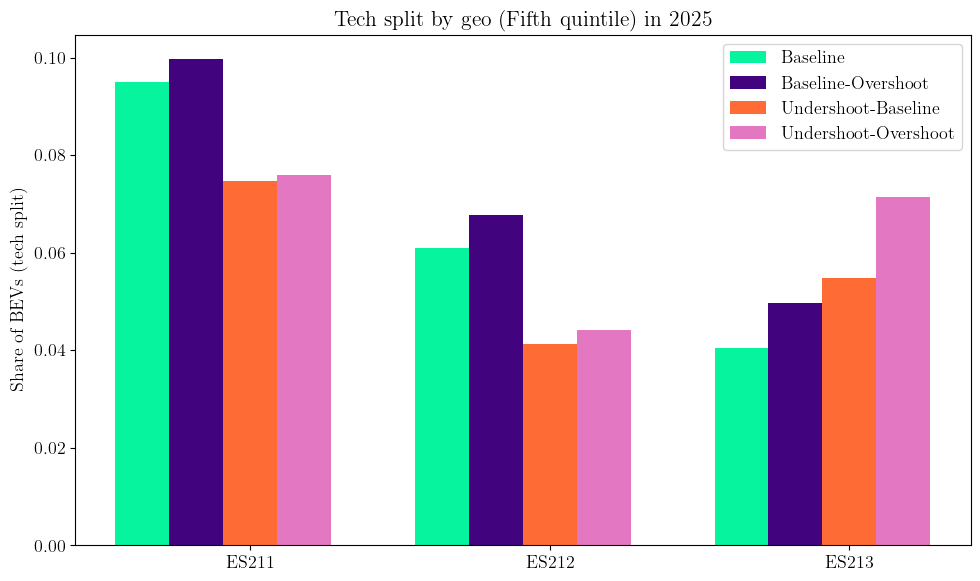

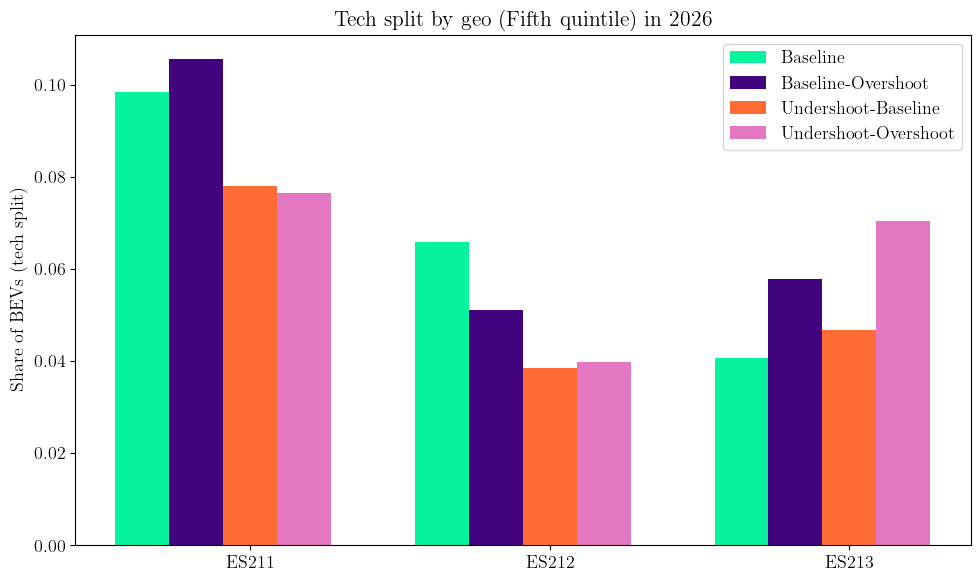

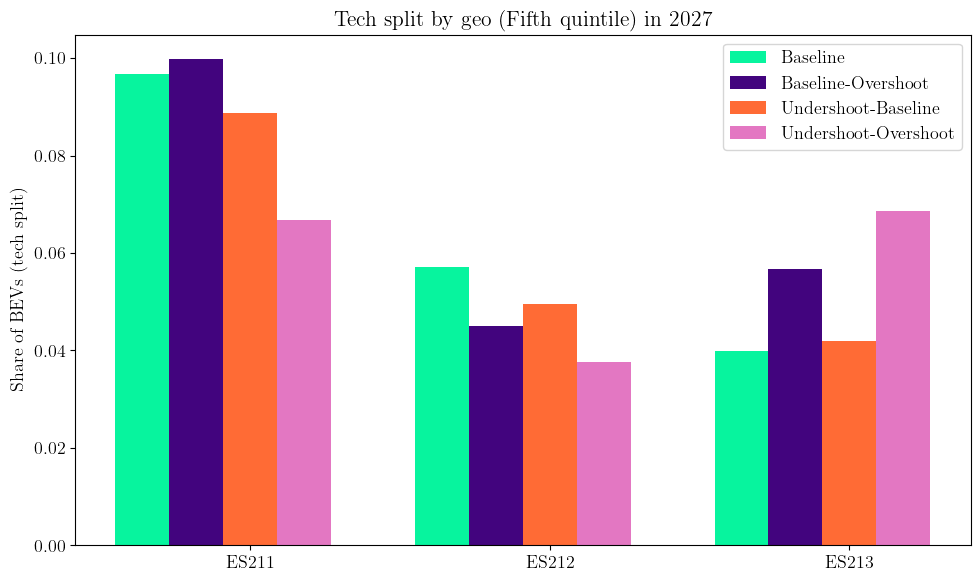

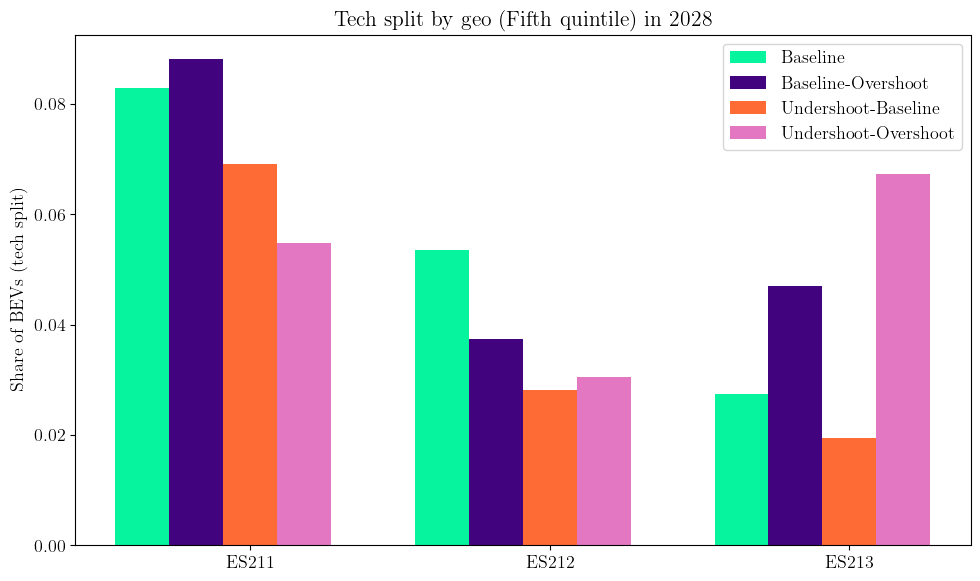

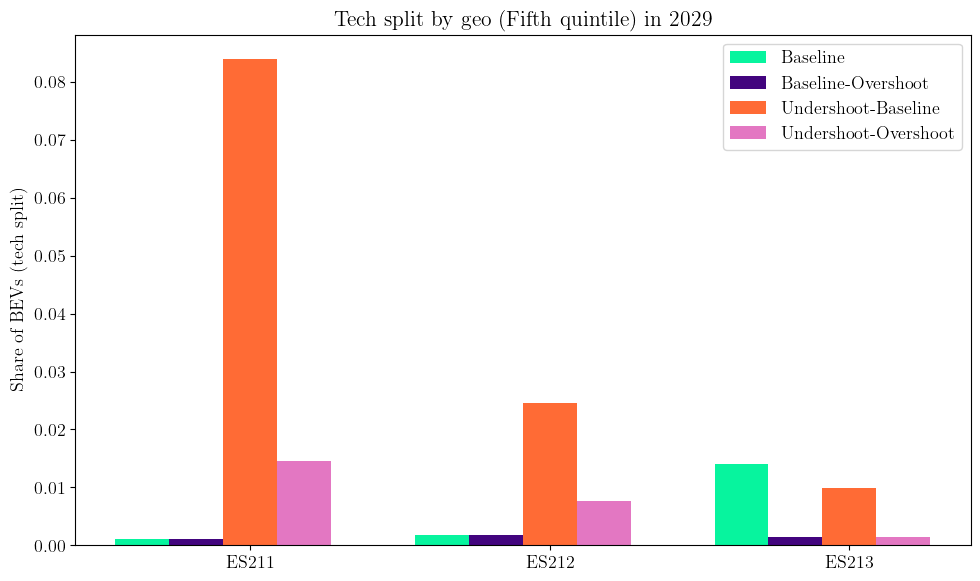

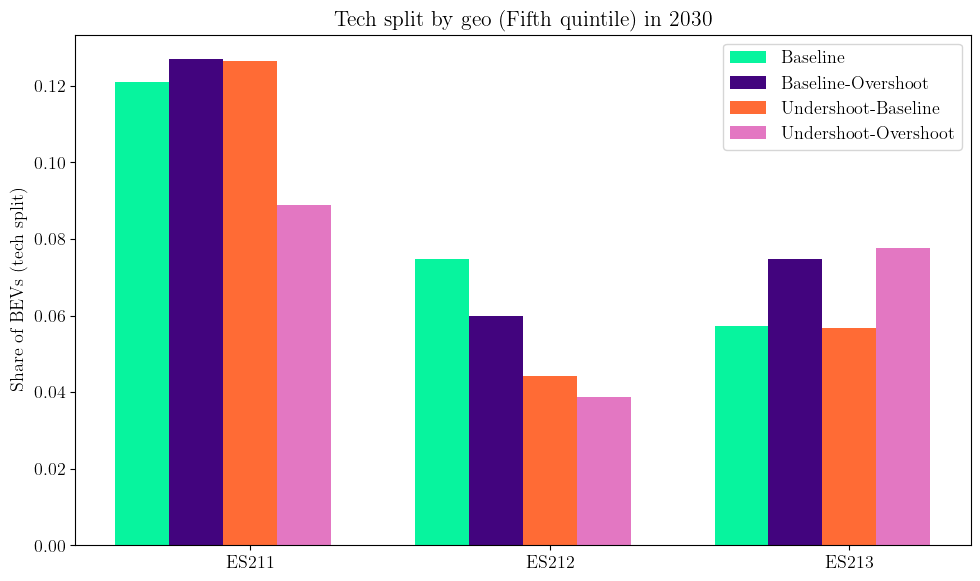

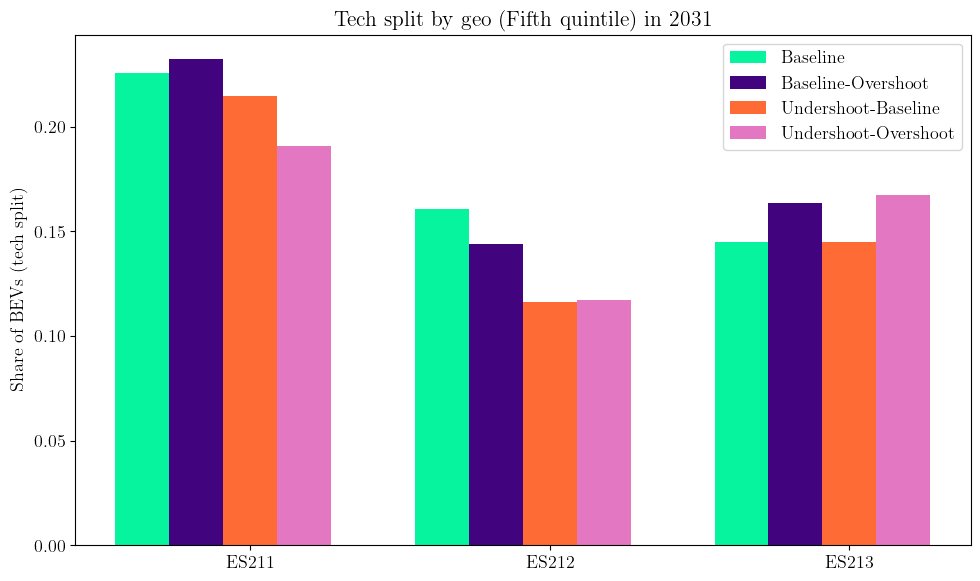

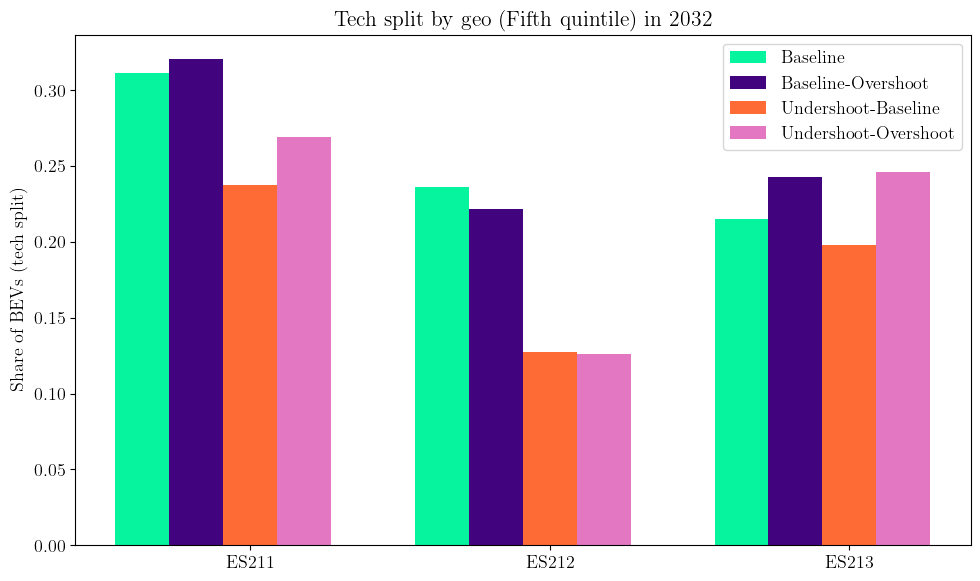

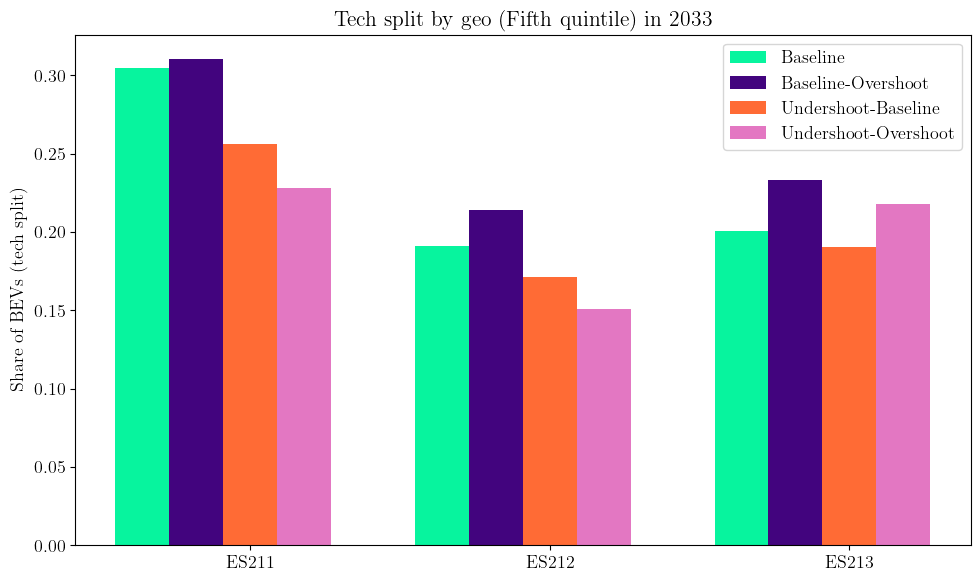

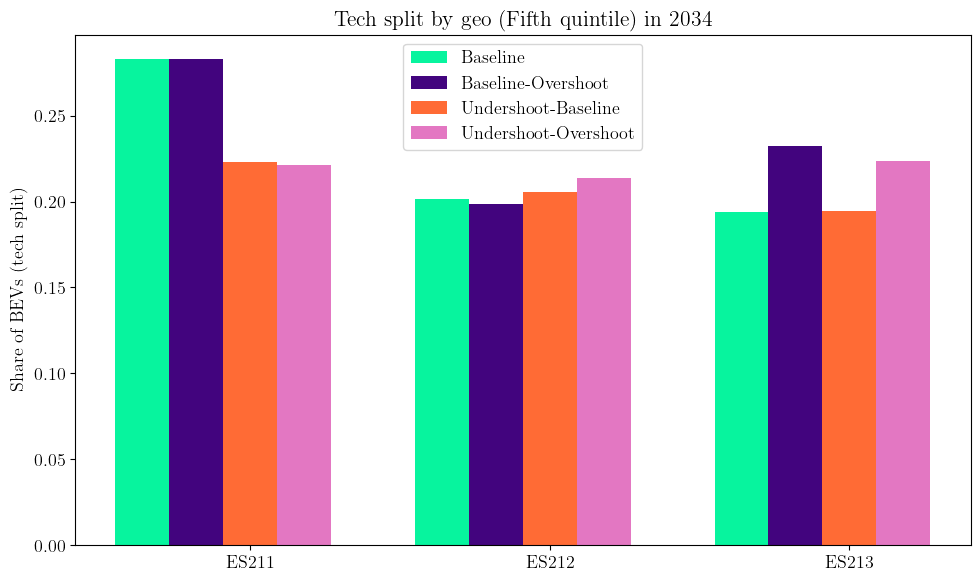

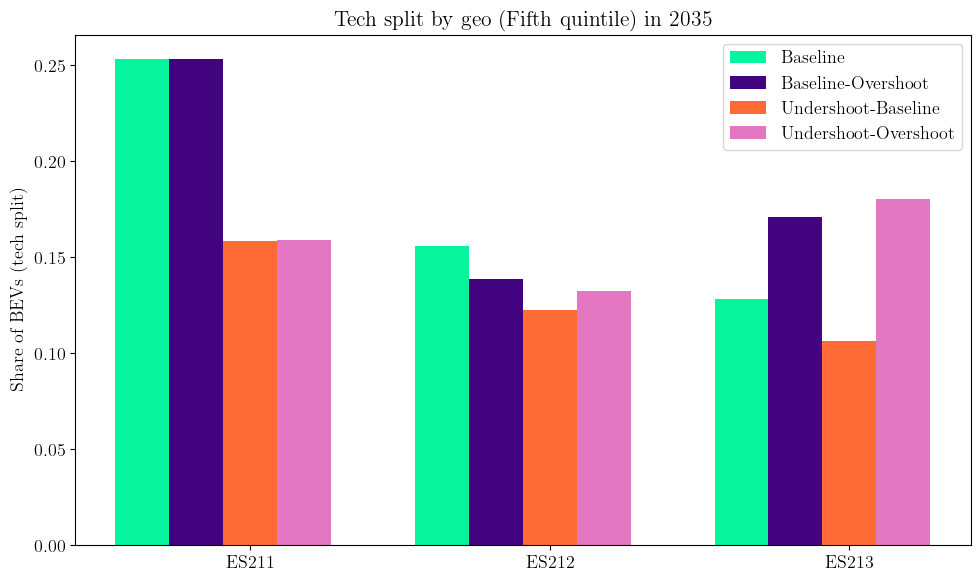

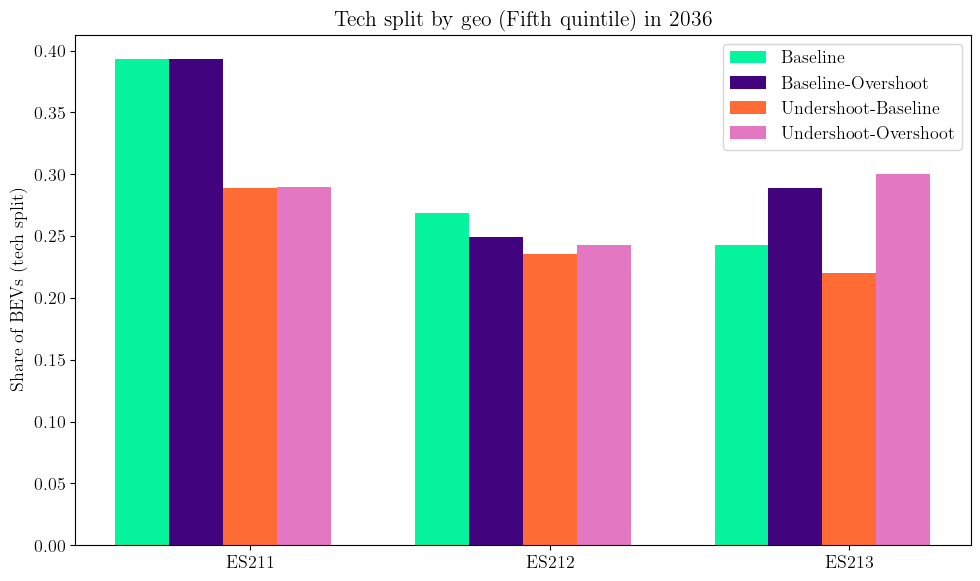

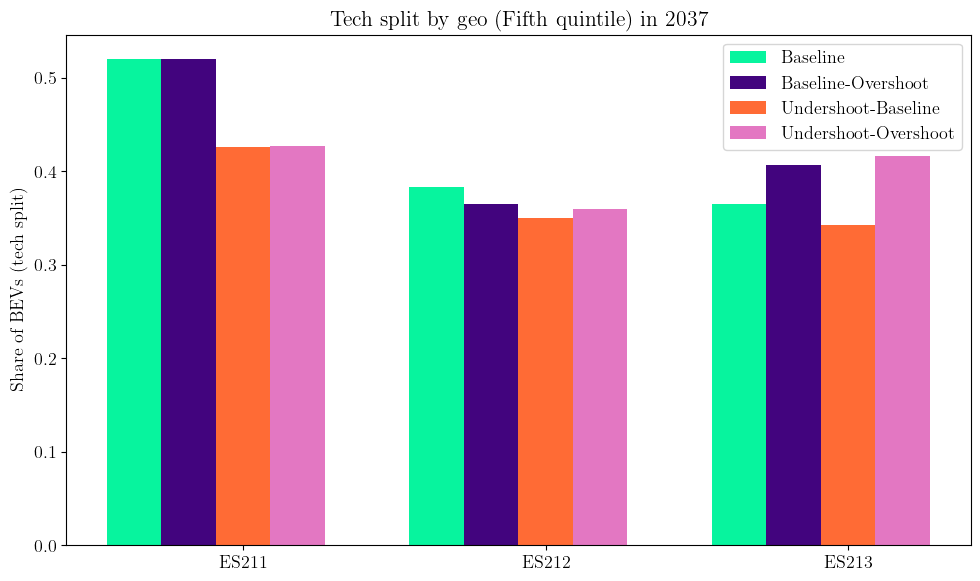

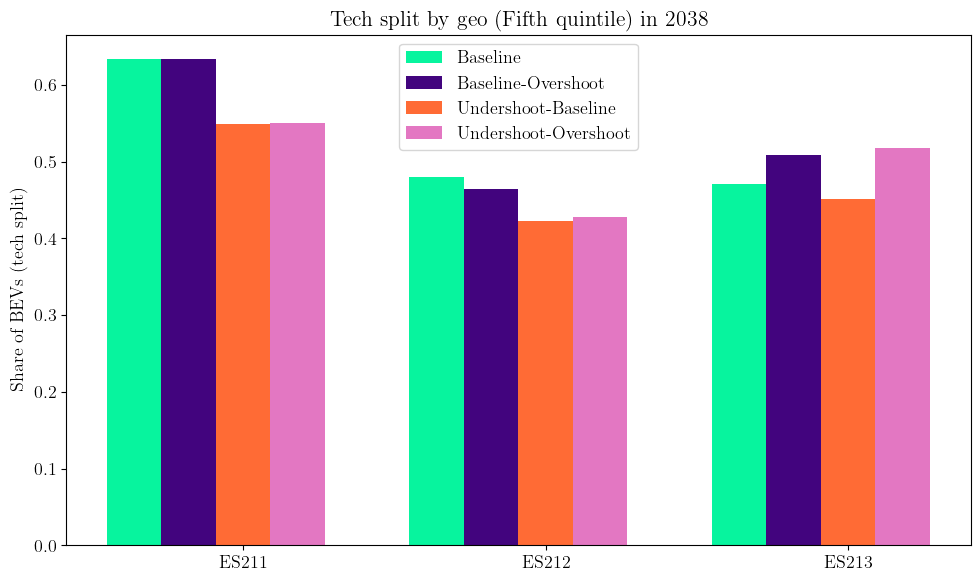

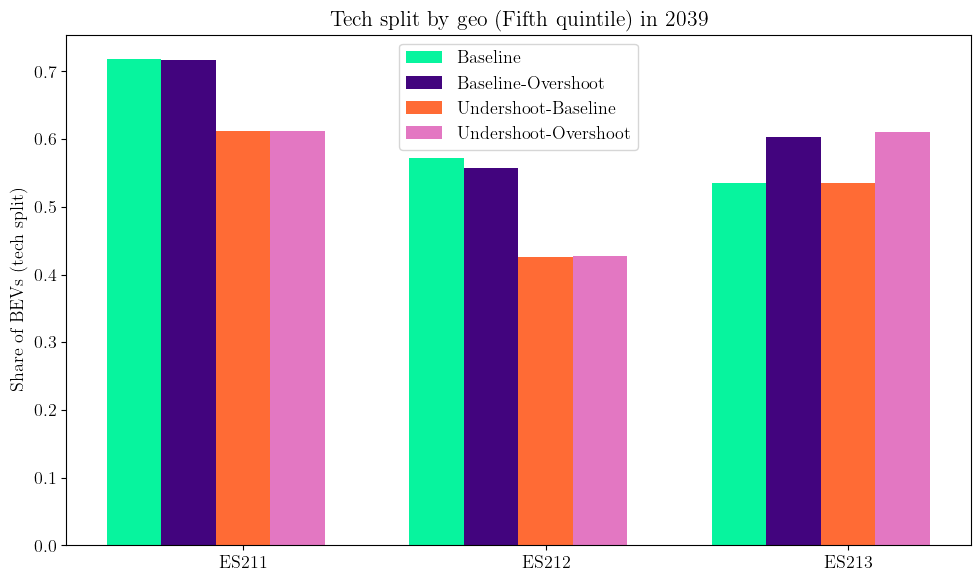

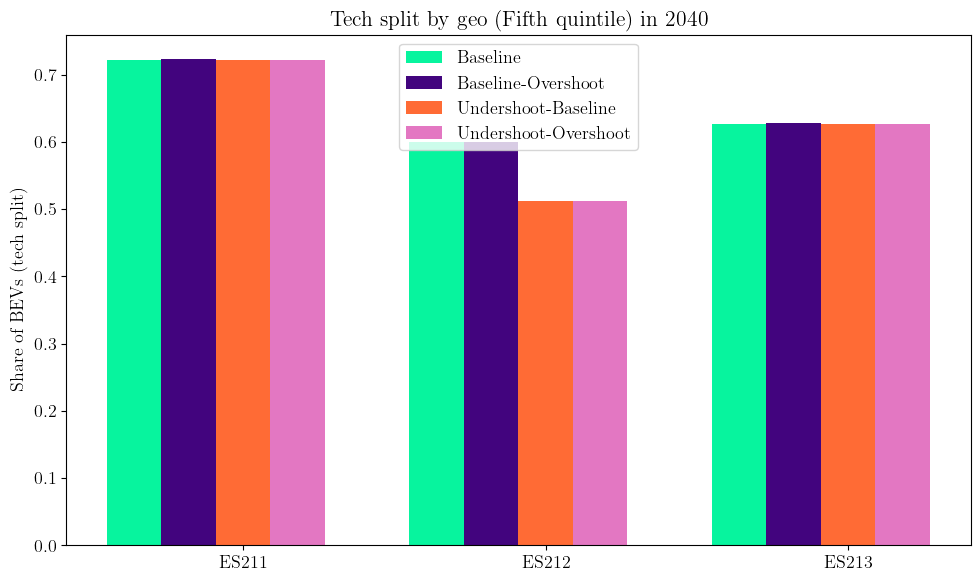

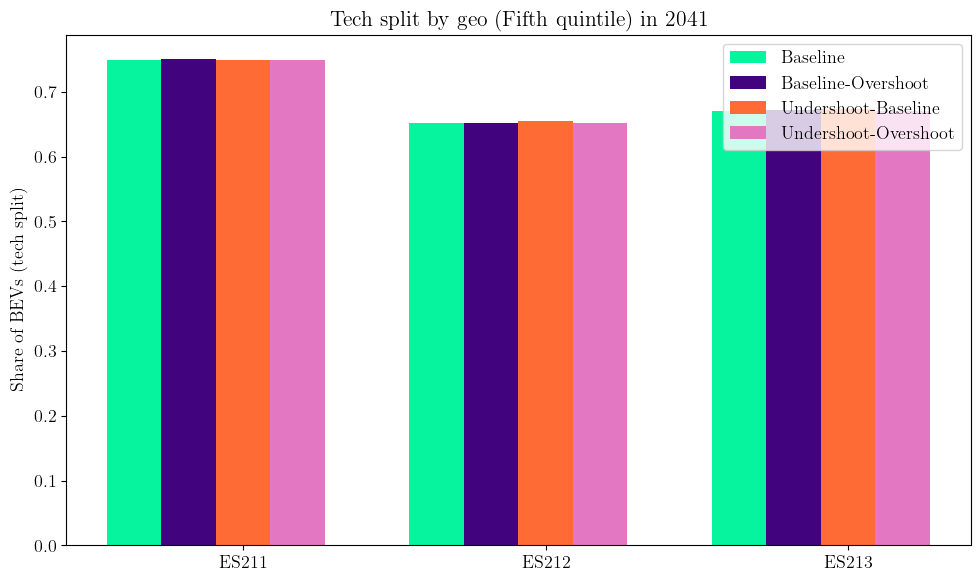

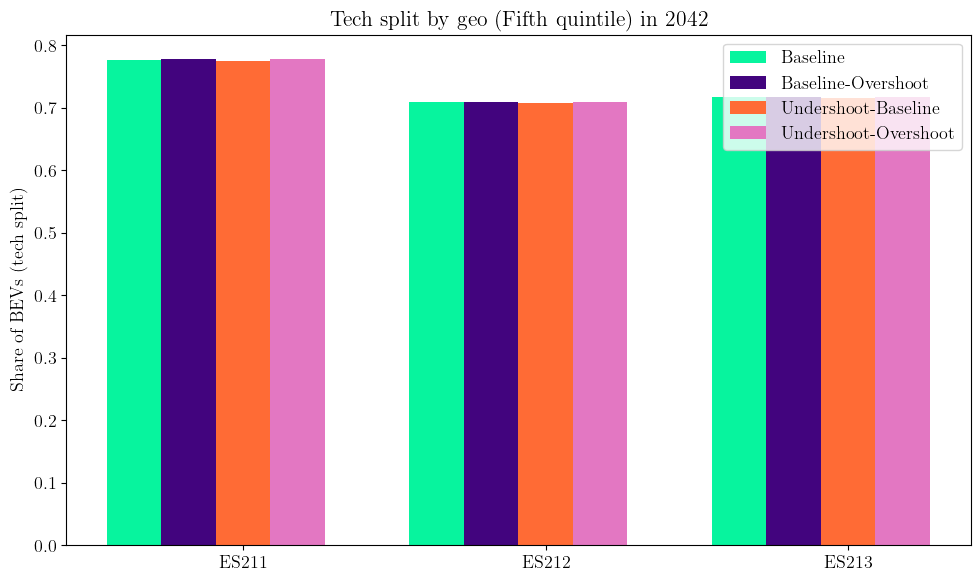

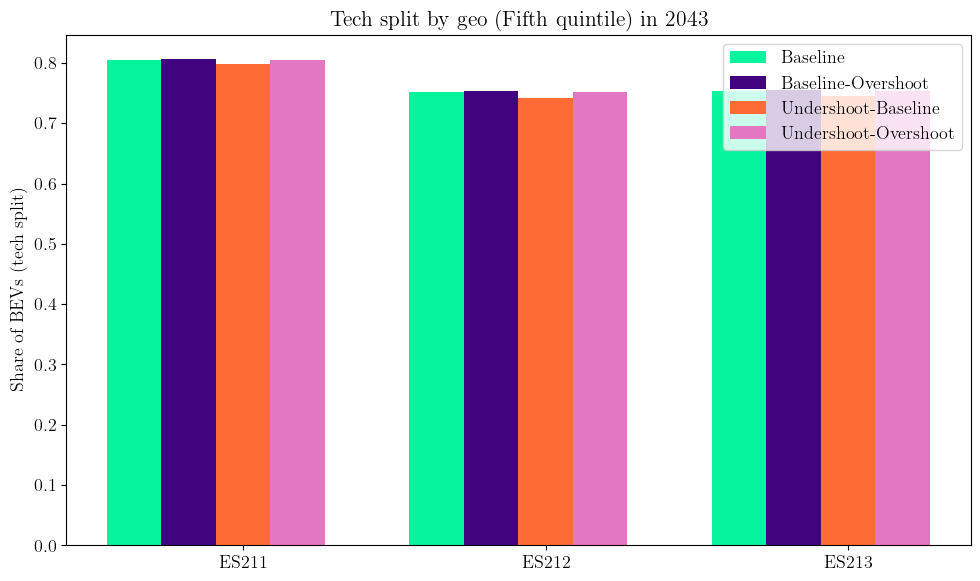

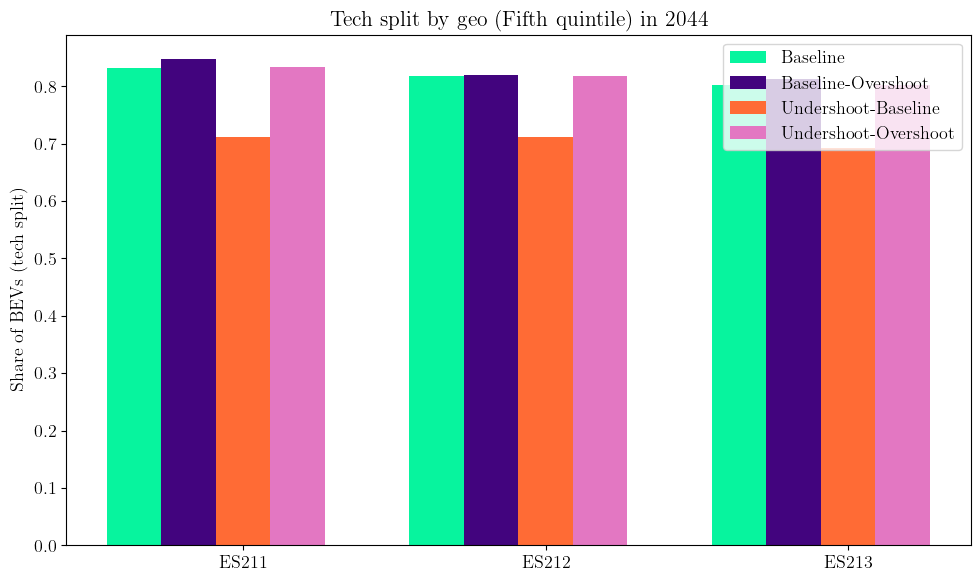

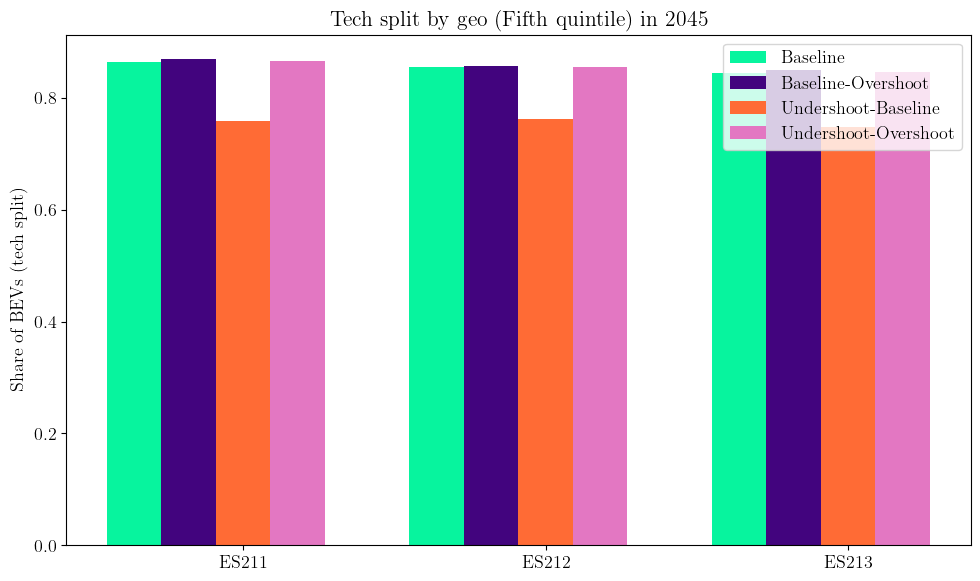

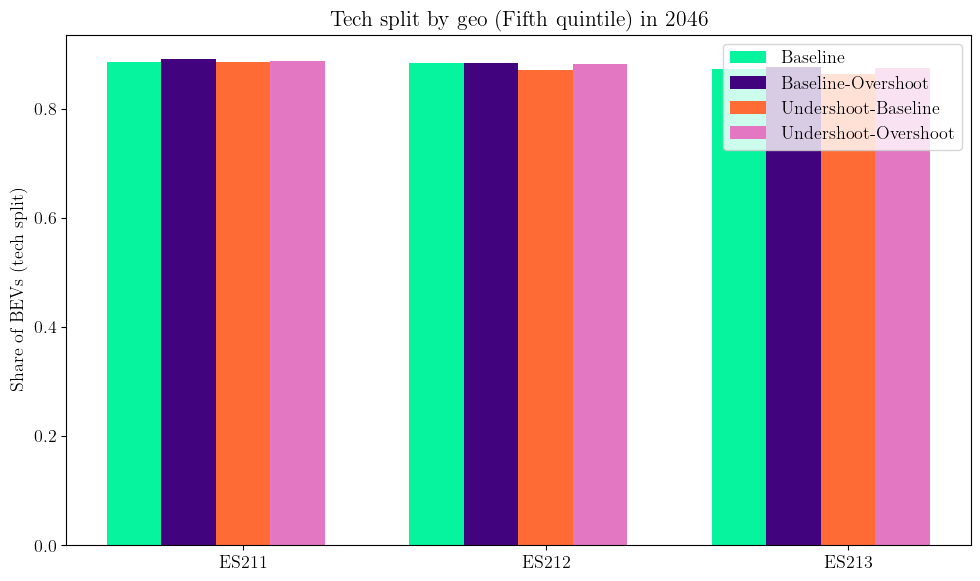

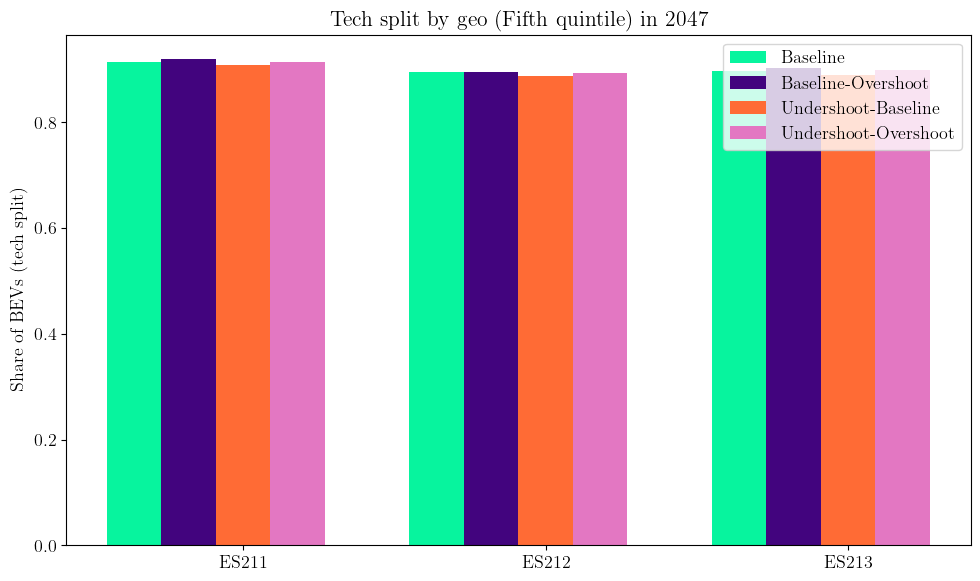

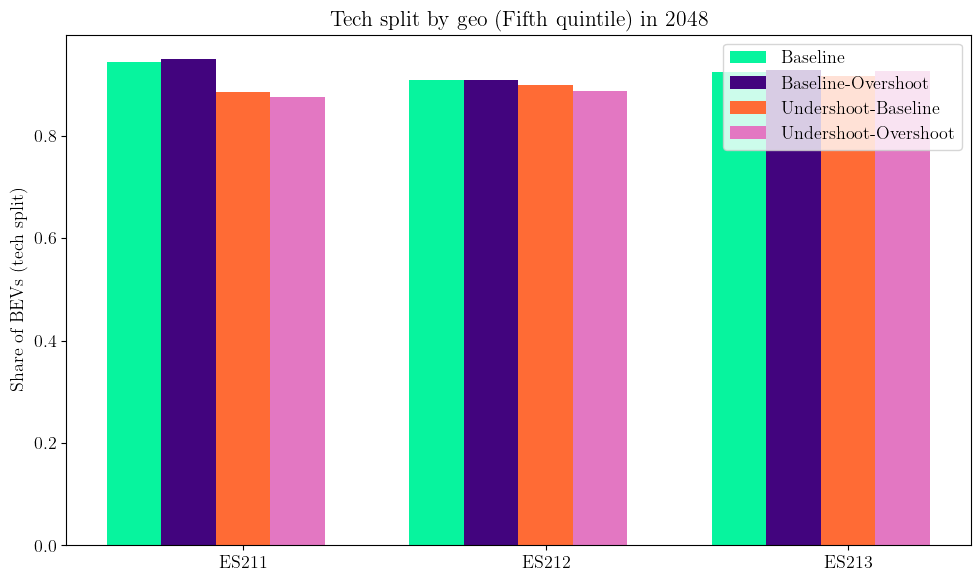

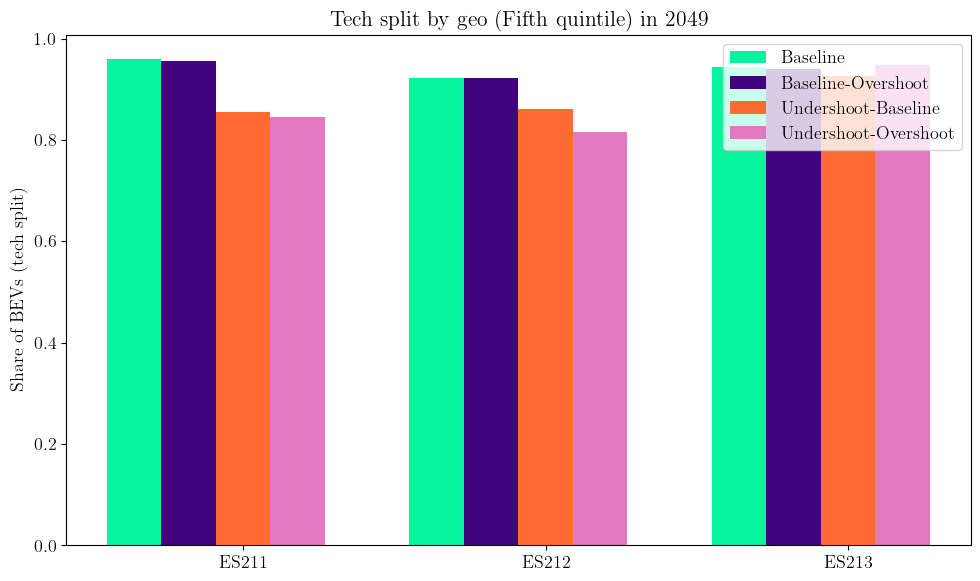

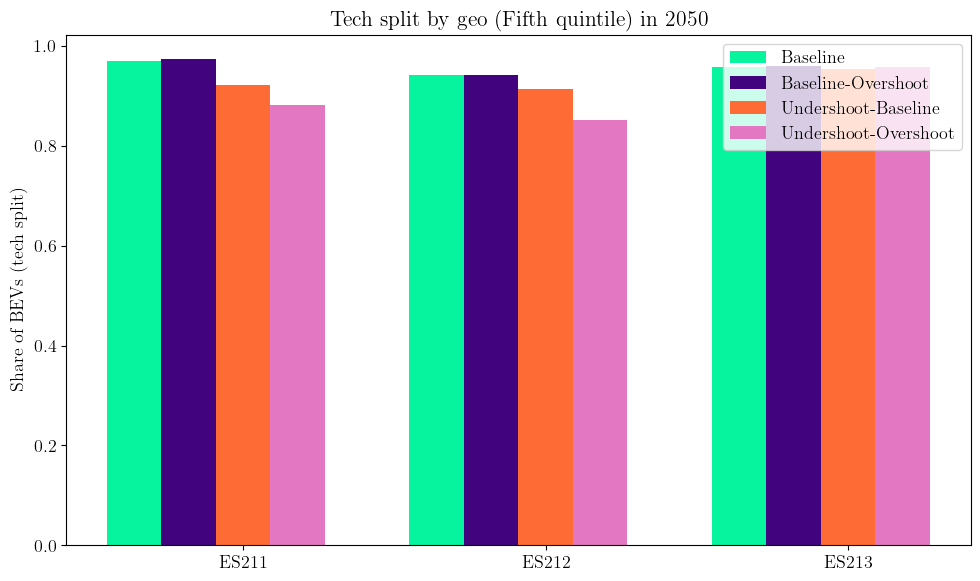

In [89]:
import numpy as np
import matplotlib.pyplot as plt

years_to_plot = years_to_calc
case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Baseline", "Undershoot-Overshoot"]
origin_labels = {12: "ES211", 13: "ES212", 14: "ES213"}
colors = ["#07f49e", "#42047e", "#ff6b35", "#e377c2"]  # Added color for 4th case study

for year in years_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(origin_labels))
    width = 0.18

    for idx, case_study in enumerate(case_study_order):
        tech_split = tech_split_per_case_study_by_geo[year][case_study]
        values = [tech_split[geo]['Fifth quintile'] for geo in origin_labels.keys()]  # Example: plot for 'Fifth quintile'
        ax.bar(x + idx * width, values, width, label=case_study, color=colors[idx])

    ax.set_xticks(x + width * (len(case_study_order) / 2))
    ax.set_xticklabels([origin_labels[geo] for geo in origin_labels], rotation=0)
    ax.set_ylabel("Share of BEVs (tech split)")
    ax.set_title(f"Tech split by geo (Fifth quintile) in {year}")
    ax.legend()
    plt.tight_layout()
    plt.show()

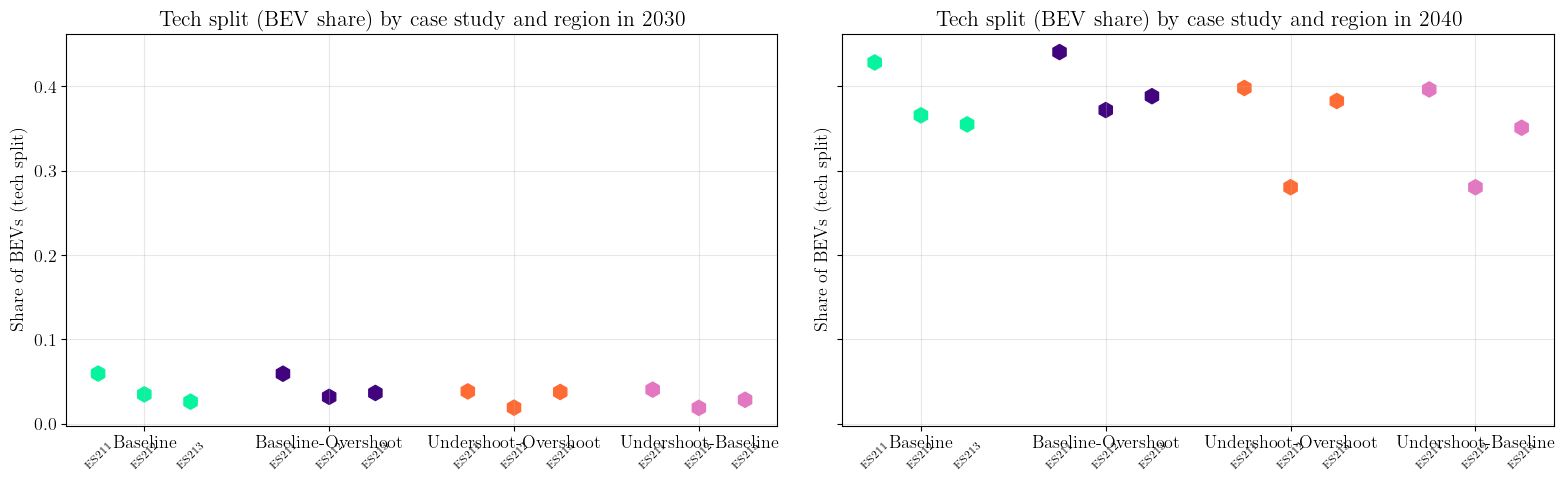

In [90]:
import numpy as np
import matplotlib.pyplot as plt

years_to_plot = [2030, 2040]
case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Overshoot", "Undershoot-Baseline"]
region_ids = [12, 13, 14]
region_labels = {12: "ES211", 13: "ES212", 14: "ES213"}
colors = ["#07f49e", "#42047e", "#ff6b35", "#e377c2"]  # Added color for 4th case study

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
for subplot_idx, year in enumerate(years_to_plot):
    ax = axes[subplot_idx]
    
    x_positions = []
    y_values = []
    color_list = []
    case_positions = []
    width = 0.8
    spacing_between_cases = 1.0
    
    for cidx, case_study in enumerate(case_study_order):
        case_start = cidx * (len(region_ids) + spacing_between_cases)
        case_positions.append(case_start + (len(region_ids) - 1) / 2)  # Center position for case label
        
        for ridx, region in enumerate(region_ids):
            xpos = case_start + ridx
            x_positions.append(xpos)
            y_values.append(tech_split_per_region[year][case_study][region])
            color_list.append(colors[cidx])
    
    ax.scatter(x_positions, y_values, c=color_list, s=120, marker='h')
    
    # Set case study labels on x-axis
    ax.set_xticks(case_positions)
    ax.set_xticklabels(case_study_order)
    
    # Add region labels beneath each case study
    for cidx, case_study in enumerate(case_study_order):
        case_start = cidx * (len(region_ids) + spacing_between_cases)
        for ridx, region in enumerate(region_ids):
            xpos = case_start + ridx
            ax.text(xpos, -0.04, region_labels[region], ha='center', va='top', 
                    transform=ax.get_xaxis_transform(), rotation=45, fontsize=8)
    
    ax.set_ylabel("Share of BEVs (tech split)")
    ax.set_title(f"Tech split (BEV share) by case study and region in {year}")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
year = 2040 
y_init = 2020
g_init = 2020 - 25
Y_end = 2060
amount_battery_electric_vehs = {}
relevant_origins = [12, 13, 14]  # include 14

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    geographic_elements = input_data["GeographicElement"]
    geographic_elements_dict = {item["id"]: item for item in geographic_elements}
    h = output_data["h"]
    amounts_vehs_by_origin = {origin: {} for origin in relevant_origins}
    for y in range(y_init, Y_end + 1):
        for origin in relevant_origins:
            amounts_vehs_by_origin[origin][y] = sum([
                h.get((y, r, tv, g), 0)
                for r in odpair_list_dict.keys()
                for tv in techvehicle_list_dict.keys()
                for g in range(g_init, y + 1)
                if (y, r, tv, g) in h 
                and odpair_list_dict[r]["from"] == origin
                and techvehicle_list_dict[tv]["technology"] == 2
            ])
    print(f"Case study: {case_study_name}, Amounts of battery electric vehicles in {year}:")
    for origin in relevant_origins:
        print(f"  Origin {origin}: {amounts_vehs_by_origin[origin][year]}")
    amount_battery_electric_vehs[case_study_name] = amounts_vehs_by_origin


Case study: Baseline, Amounts of battery electric vehicles in 2040:
  Origin 12: 62493.918735
  Origin 13: 141792.474276
  Origin 14: 219694.062134
Case study: Baseline-Overshoot, Amounts of battery electric vehicles in 2040:
  Origin 12: 63765.785169
  Origin 13: 143485.757725
  Origin 14: 233751.384736
Case study: Undershoot-Baseline, Amounts of battery electric vehicles in 2040:
  Origin 12: 58814.387143
  Origin 13: 118567.542105
  Origin 14: 217880.583463
Case study: Undershoot-Overshoot, Amounts of battery electric vehicles in 2040:
  Origin 12: 58944.067455
  Origin 13: 118646.507592
  Origin 14: 231335.168258


In [92]:
# Filter battery electric vehicles for routes with destination equal to 14
amount_battery_electric_vehs_to_14 = {}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]
    
    h = output_data["h"]
    odpair_list_dict = {item["id"]: item for item in input_data["Odpair"]}
    techvehicle_list_dict = {item["id"]: item for item in input_data["TechVehicle"]}
    
    amounts_vehs_by_origin_to_14 = {origin: {} for origin in relevant_origins}
    
    for y in range(y_init, Y_end + 1):
        for origin in relevant_origins:
            amounts_vehs_by_origin_to_14[origin][y] = sum([
                h.get((y, r, tv, g), 0)
                for r in odpair_list_dict.keys()
                for tv in techvehicle_list_dict.keys()
                for g in range(g_init, y + 1)
                if (y, r, tv, g) in h 
                and odpair_list_dict[r]["from"] == origin 
                and odpair_list_dict[r]["to"] == 14  # Only routes with destination 14
                and techvehicle_list_dict[tv]["technology"] == 2

            ])
    
    print(f"Case study: {case_study_name}, BEVs to destination 14 in {year}:")
    for origin in relevant_origins:
        print(f"  Origin {origin}: {amounts_vehs_by_origin_to_14[origin][year]}")
    
    amount_battery_electric_vehs_to_14[case_study_name] = amounts_vehs_by_origin_to_14

Case study: Baseline, BEVs to destination 14 in 2040:
  Origin 12: 2096.021972
  Origin 13: 9013.211436
  Origin 14: 203589.333106
Case study: Baseline-Overshoot, BEVs to destination 14 in 2040:
  Origin 12: 2150.587943
  Origin 13: 9013.211436
  Origin 14: 217499.566309
Case study: Undershoot-Baseline, BEVs to destination 14 in 2040:
  Origin 12: 2096.021972
  Origin 13: 9013.211436
  Origin 14: 201775.854435
Case study: Undershoot-Overshoot, BEVs to destination 14 in 2040:
  Origin 12: 2096.021972
  Origin 13: 9013.211436
  Origin 14: 215230.43923


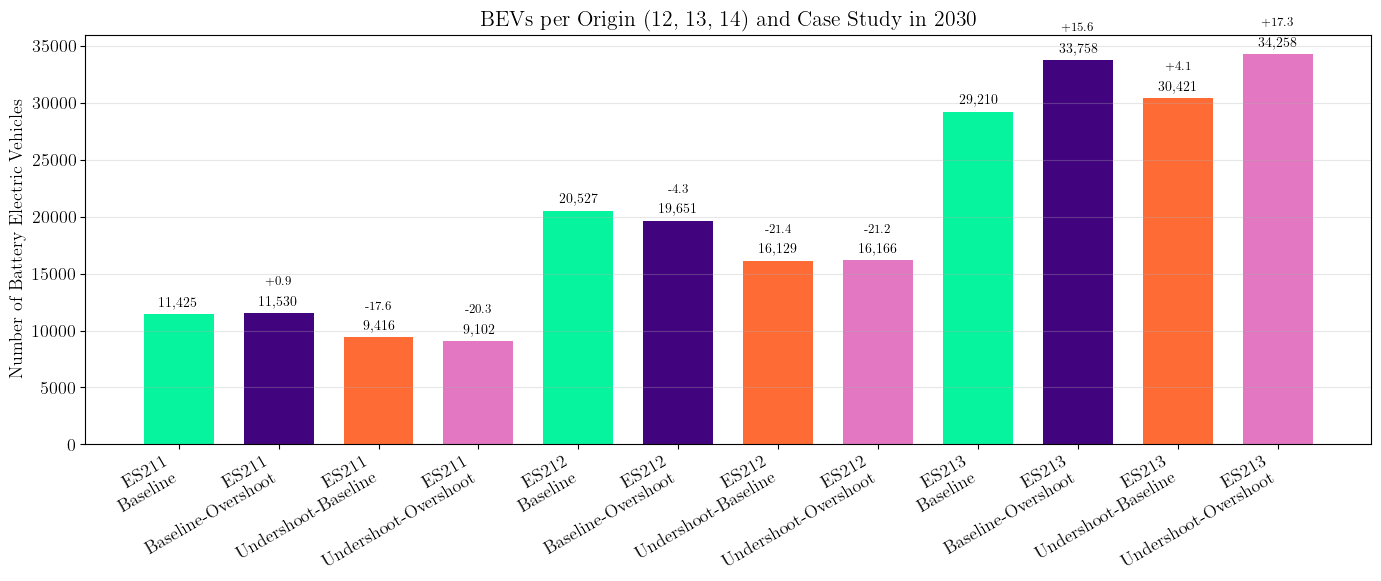

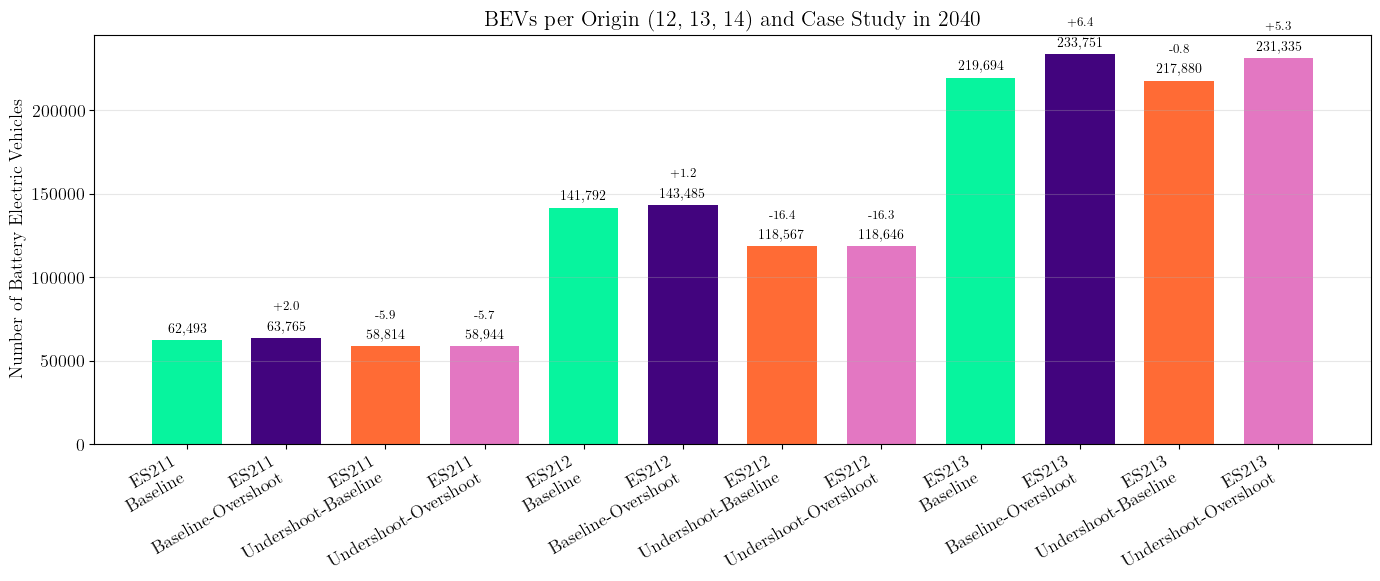

In [93]:
import numpy as np

import matplotlib.pyplot as plt
# Prepare data for plotting
years_to_plot = [2030, 2040]
case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Baseline", "Undershoot-Overshoot"]
origins = [12, 13, 14]
origin_labels = {12: "ES211", 13: "ES212", 14: "ES213"}
case_colors = ["#07f49e", "#42047e", "#ff6b35", "#e377c2"]

for year in years_to_plot:
    # Prepare bar values: for each origin, show all case studies
    bar_values = []
    bar_labels = []
    bar_colors = []
    rel_diffs = []  # Store relative differences for annotation

    for origin in origins:
        baseline_val = amount_battery_electric_vehs["Baseline"][origin][year]
        for idx, cs in enumerate(case_study_order):
            val = amount_battery_electric_vehs[cs][origin][year]
            bar_values.append(val)
            bar_labels.append(f"{origin_labels[origin]}\n{cs}")
            bar_colors.append(case_colors[idx])
            # Relative difference to baseline
            if cs == "Baseline":
                rel_diffs.append(None)
            else:
                rel_diff = (val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
                rel_diffs.append(rel_diff)

    x = np.arange(len(bar_values))
    width = 0.7

    fig, ax = plt.subplots(figsize=(14, 6))
    bars = ax.bar(x, bar_values, width, color=bar_colors)
    ax.set_xticks(x)
    ax.set_xticklabels(bar_labels, rotation=30, ha='right')
    ax.set_ylabel('Number of Battery Electric Vehicles')
    ax.set_title(f'BEVs per Origin (12, 13, 14) and Case Study in {year}')
    ax.grid(axis='y', alpha=0.3)

    # Annotate bars with values and relative differences
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        # Annotate relative difference for non-baseline bars
        if rel_diffs[i] is not None:
            ax.annotate(f'{rel_diffs[i]:+.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 18),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()

<>:78: SyntaxWarning: invalid escape sequence '\%'
<>:87: SyntaxWarning: invalid escape sequence '\%'
<>:134: SyntaxWarning: invalid escape sequence '\%'
<>:143: SyntaxWarning: invalid escape sequence '\%'
<>:78: SyntaxWarning: invalid escape sequence '\%'
<>:87: SyntaxWarning: invalid escape sequence '\%'
<>:134: SyntaxWarning: invalid escape sequence '\%'
<>:143: SyntaxWarning: invalid escape sequence '\%'
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\3820078871.py:78: SyntaxWarning: invalid escape sequence '\%'
  ax.annotate(f'{rel_diffs[i]:+.1f}$\%$',
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\3820078871.py:87: SyntaxWarning: invalid escape sequence '\%'
  ax.annotate(f'{diff_uo:+.1f}$\%$',
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\3820078871.py:134: SyntaxWarning: invalid escape sequence '\%'
  ax.annotate(f'{rel_diffs[i]:+.1f}$\%$',
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\3820078871.py:143: SyntaxWarning: invalid escape sequence '\%'
  ax.anno

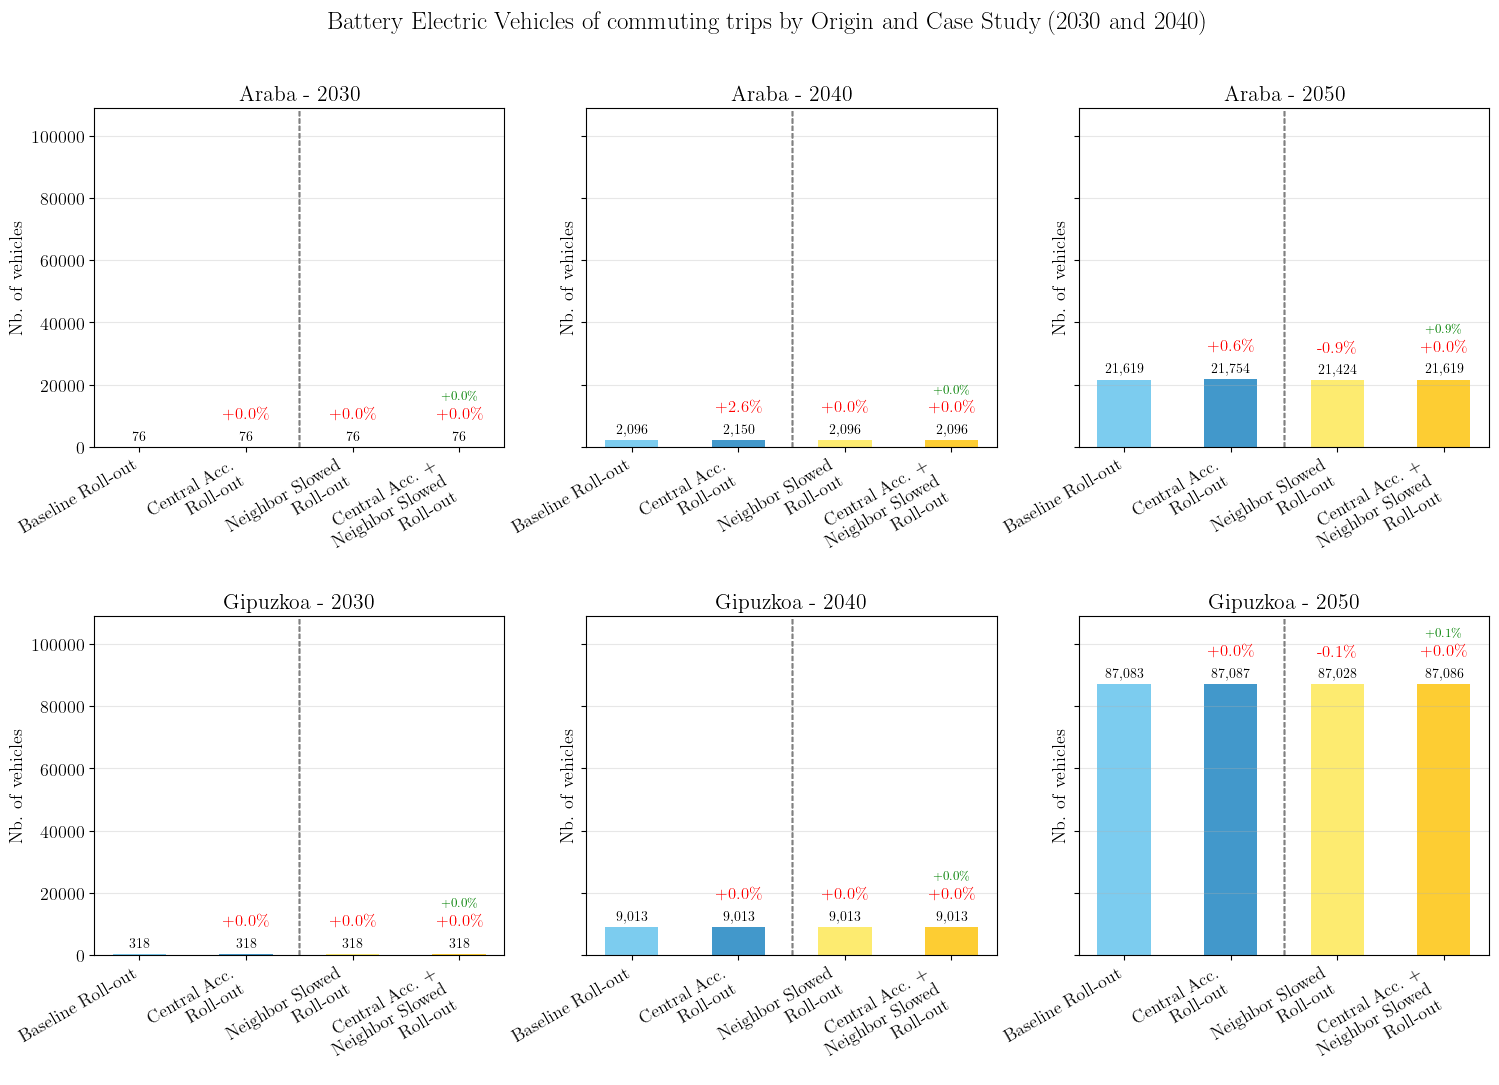

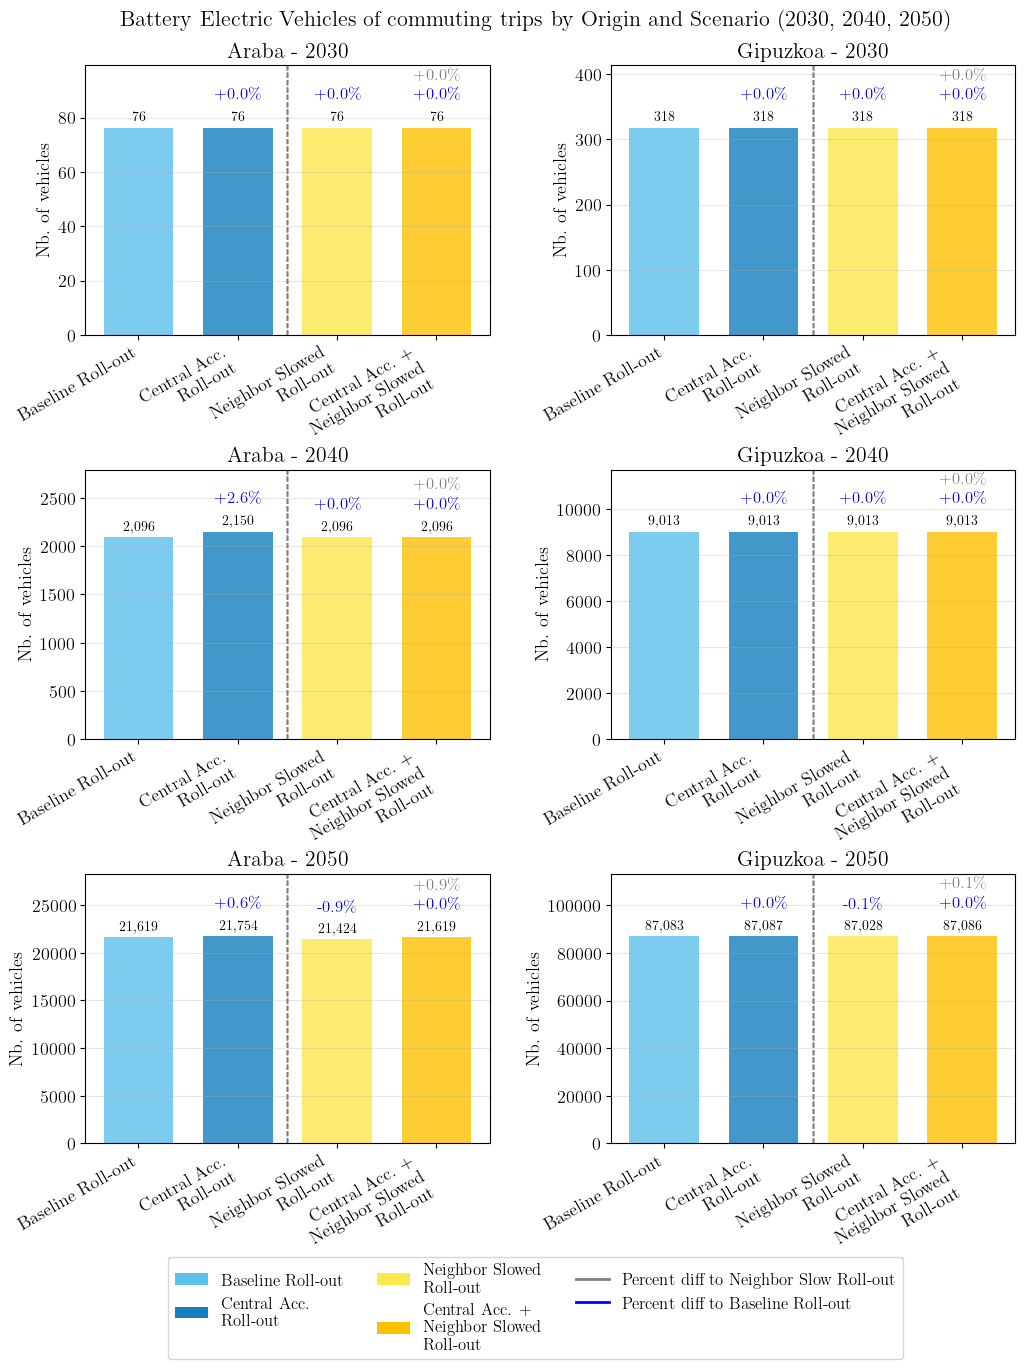

In [159]:
# Replace region_labels with region_names for axis titles and bar labels
case_colors = ["#5bc0eb", "#137fbf", "#fde74c", "#fdc100"]  # Added color for 4th case study
region_names = {12: "Araba", 13: "Gipuzkoa"}
case_study_order = ["Baseline", "Baseline-Overshoot",  "Undershoot-Baseline", "Undershoot-Overshoot"]

correct_case_study_names = {
    "Baseline": "Baseline Roll-out",
    "Baseline-Overshoot": "Central Acc. \nRoll-out",
    "Undershoot-Baseline": "Neighbor Slowed\nRoll-out",
    "Undershoot-Overshoot": "Central Acc. +\n Neighbor Slowed \nRoll-out"
}
for year in years_to_plot:
    bar_values = []
    bar_labels = []
    bar_colors = []
    rel_diffs = []

    for origin in origins:
        baseline_val = amount_battery_electric_vehs_to_14.get("Baseline", {}).get(origin, {}).get(year, 0)
        for idx, cs in enumerate(case_study_order):
            val = amount_battery_electric_vehs_to_14.get(cs, {}).get(origin, {}).get(year, 0)
            bar_values.append(val)
            # Use region_names instead of region_labels
            bar_labels.append(f"{region_names.get(origin, 'Unknown Region')}\n{cs}")
            bar_colors.append(case_colors[idx])
            if cs == "Baseline":
                rel_diffs.append(None)
            else:
                rel_diff = (val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
                rel_diffs.append(rel_diff)

    x = np.arange(len(bar_values))
    width = 0.7


years_to_plot = [2030, 2040, 2050]
# --- MODIFICATION: two rows (first row Araba, second Bizkaia), each row shows case studies for that origin for both years ---
fig2, axes = plt.subplots(2, len(years_to_plot), figsize=(18, 11), sharey=True, gridspec_kw={'hspace': 0.5})
fig2.suptitle('Battery Electric Vehicles of commuting trips by Origin and Case Study (2030 and 2040)', fontsize=18, y=0.97)
for row_idx, origin in enumerate(origins[:2]):  # Ensure row_idx does not exceed the number of rows
    for col_idx, year in enumerate(years_to_plot[:axes.shape[1]]):  # Ensure col_idx does not exceed the number of columns
        bar_values = []
        bar_labels = []
        bar_colors = []
        rel_diffs = []
        baseline_val = amount_battery_electric_vehs_to_14["Baseline"][origin][year]
        undershoot_baseline_val = amount_battery_electric_vehs_to_14["Undershoot-Baseline"][origin][year]
        for idx, cs in enumerate(case_study_order):
            val = amount_battery_electric_vehs_to_14[cs][origin][year]
            bar_values.append(val)
            bar_labels.append(correct_case_study_names.get(cs, 'Unknown Case Study'))
            bar_colors.append(case_colors[idx])
            if cs == "Baseline":
                rel_diffs.append(None)
            else:
                rel_diff = (val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
                rel_diffs.append(rel_diff)
        x = np.arange(len(bar_values))
        width = 0.5
        ax = axes[row_idx, col_idx]
        bars = ax.bar(x, bar_values, width, color=bar_colors, alpha=0.8)
        ax.set_xticks(x)
        ax.set_xticklabels(bar_labels, rotation=30, ha='right')
        ax.set_ylabel('Nb. of vehicles')
        # Use region_names for subplot titles
        ax.set_title(f'{region_names[origin]} - {year}')
        ax.grid(axis='y', alpha=0.3)
        y_max = max(bar_values) * 1.25 if bar_values else 1
        ax.set_ylim(0, y_max)
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
            if rel_diffs[i] is not None:
                ax.annotate(f'{rel_diffs[i]:+.1f}$\%$', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 18),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='red')
            ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=1)

        if bar_values[2] != 0:
            diff_uo = (bar_values[3] - bar_values[2]) / bar_values[2] * 100
            ax.annotate(f'{diff_uo:+.1f}$\%$', 
            xy=(x[3], bar_values[3]), 
            xytext=(0, 32), 
            textcoords="offset points", 
            ha='center', va='bottom', fontsize=9, color='green')

# Adjust the figure layout to have three rows and two columns, one row per year
fig2, axes = plt.subplots(len(years_to_plot), 2, figsize=(12, 14), sharey=False, gridspec_kw={'hspace': 0.5, 'wspace': 0.3})
fig2.suptitle('Battery Electric Vehicles of commuting trips by Origin and Scenario (2030, 2040, 2050)', fontsize=16, y=0.92)

for row_idx, year in enumerate(years_to_plot):  # Iterate over years for rows
    for col_idx, origin in enumerate(origins[:2]):  # Iterate over origins for columns
        bar_values = []
        bar_labels = []
        bar_colors = []
        rel_diffs = []
        baseline_val = amount_battery_electric_vehs_to_14["Baseline"][origin][year]
        undershoot_baseline_val = amount_battery_electric_vehs_to_14["Undershoot-Baseline"][origin][year]
        for idx, cs in enumerate(case_study_order):
            val = amount_battery_electric_vehs_to_14[cs][origin][year]
            bar_values.append(val)
            bar_labels.append(correct_case_study_names.get(cs, 'Unknown Case Study'))
            bar_colors.append(case_colors[idx])
            if cs == "Baseline":
                rel_diffs.append(None)
            else:
                rel_diff = (val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
                rel_diffs.append(rel_diff)
        x = np.arange(len(bar_values))
        width = 0.7
        ax = axes[row_idx, col_idx]
        bars = ax.bar(x, bar_values, width, color=bar_colors, alpha=0.8)
        ax.set_xticks(x)
        ax.set_xticklabels(bar_labels, rotation=30, ha='right')
        ax.set_ylabel('Nb. of vehicles')
        ax.set_title(f'{region_names[origin]} - {year}')
        ax.grid(axis='y', alpha=0.3)
        y_max = max(bar_values) * 1.3 if bar_values else 1
        ax.set_ylim(0, y_max)
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
            if rel_diffs[i] is not None:
                ax.annotate(f'{rel_diffs[i]:+.1f}$\%$', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 18),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='blue')
            ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=1)

        if bar_values[2] != 0:
            diff_uo = (bar_values[3] - bar_values[2]) / bar_values[2] * 100
            ax.annotate(f'{diff_uo:+.1f}$\%$', 
            xy=(x[3], bar_values[3]), 
            xytext=(0, 32), 
            textcoords="offset points", 
            ha='center', va='bottom', fontsize=12, color='grey')

# Add legend and save the figure
from matplotlib.legend_handler import HandlerBase
import matplotlib.text as mtext

class TextHandler(HandlerBase):
    def __init__(self, color):
        super().__init__()
        self.color = color

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        txt = mtext.Text(xdescent, ydescent + height / 2, orig_handle.get_label(),
                         fontsize=fontsize, verticalalignment='center', transform=trans, color=self.color)
        return [txt]

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
case_legend_handles = [Patch(facecolor=case_colors[i], label=correct_case_study_names[case_study_order[i]]) for i in range(len(case_study_order))]

extra_handles = [
    Line2D([0], [0], color='grey', lw=2, linestyle='-', label='Percent diff to Neighbor Slow Roll-out'),
    Line2D([0], [0], color='blue', lw=2, linestyle='-', label='Percent diff to Baseline Roll-out')
]
fig2.legend(
    handles=case_legend_handles + extra_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    fontsize=12
)
fig2.savefig("rq2_bevs_by_origin_case_study_2030_2040_2050.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [160]:
y_init = 2020
g_init = 2020 - 25
Y_end = 2060
amount_battery_electric_vehs = {}
amount_battery_electric_vehs_by_fs = {}
relevant_origins = [12, 13, 14]  # include 14

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    geographic_elements = input_data["GeographicElement"]
    geographic_elements_dict = {item["id"]: item for item in geographic_elements}
    h = output_data["h"]
    
    # Original calculation by origin
    amounts_vehs_by_origin = {origin: {} for origin in relevant_origins}
    for y in range(y_init, Y_end + 1):
        for origin in relevant_origins:
            amounts_vehs_by_origin[origin][y] = sum([
                h.get((y, r, tv, g), 0)
                for r in odpair_list_dict.keys()
                for tv in techvehicle_list_dict.keys()
                for g in range(g_init, y + 1)
                if (y, r, tv, g) in h and odpair_list_dict[r]["from"] == origin
            ])
    
    # New calculation by financial status and origin
    amounts_vehs_by_fs_by_origin = {}
    for fs in financial_status_dict.keys():
        amounts_vehs_by_fs_by_origin[fs] = {origin: {} for origin in relevant_origins}
        for y in range(y_init, Y_end + 1):
            for origin in relevant_origins:
                amounts_vehs_by_fs_by_origin[fs][origin][y] = sum([
                    h.get((y, r, tv, g), 0)
                    for r in odpair_list_dict.keys()
                    for tv in techvehicle_list_dict.keys()
                    for g in range(g_init, y + 1)
                    if (y, r, tv, g) in h 
                    and odpair_list_dict[r]["from"] == origin
                    and odpair_list_dict[r]["financial_status"] == fs
                    and techvehicle_list_dict[tv]["technology"] == 2
                ])
    
    print(f"Case study: {case_study_name}, Amounts of battery electric vehicles in {year}:")
    for origin in relevant_origins:
        print(f"  Origin {origin}: {amounts_vehs_by_origin[origin][year]}")
    
    amount_battery_electric_vehs[case_study_name] = amounts_vehs_by_origin
    amount_battery_electric_vehs_by_fs[case_study_name] = amounts_vehs_by_fs_by_origin

Case study: Baseline, Amounts of battery electric vehicles in 2050:
  Origin 12: 125038.188204
  Origin 13: 321845.844054
  Origin 14: 506863.601661
Case study: Baseline-Overshoot, Amounts of battery electric vehicles in 2050:
  Origin 12: 124945.467376
  Origin 13: 321686.94852
  Origin 14: 506302.529713
Case study: Undershoot-Baseline, Amounts of battery electric vehicles in 2050:
  Origin 12: 125374.572097
  Origin 13: 322594.986207
  Origin 14: 506774.163505
Case study: Undershoot-Overshoot, Amounts of battery electric vehicles in 2050:
  Origin 12: 125406.12244199999
  Origin 13: 323158.455115
  Origin 14: 506618.558174


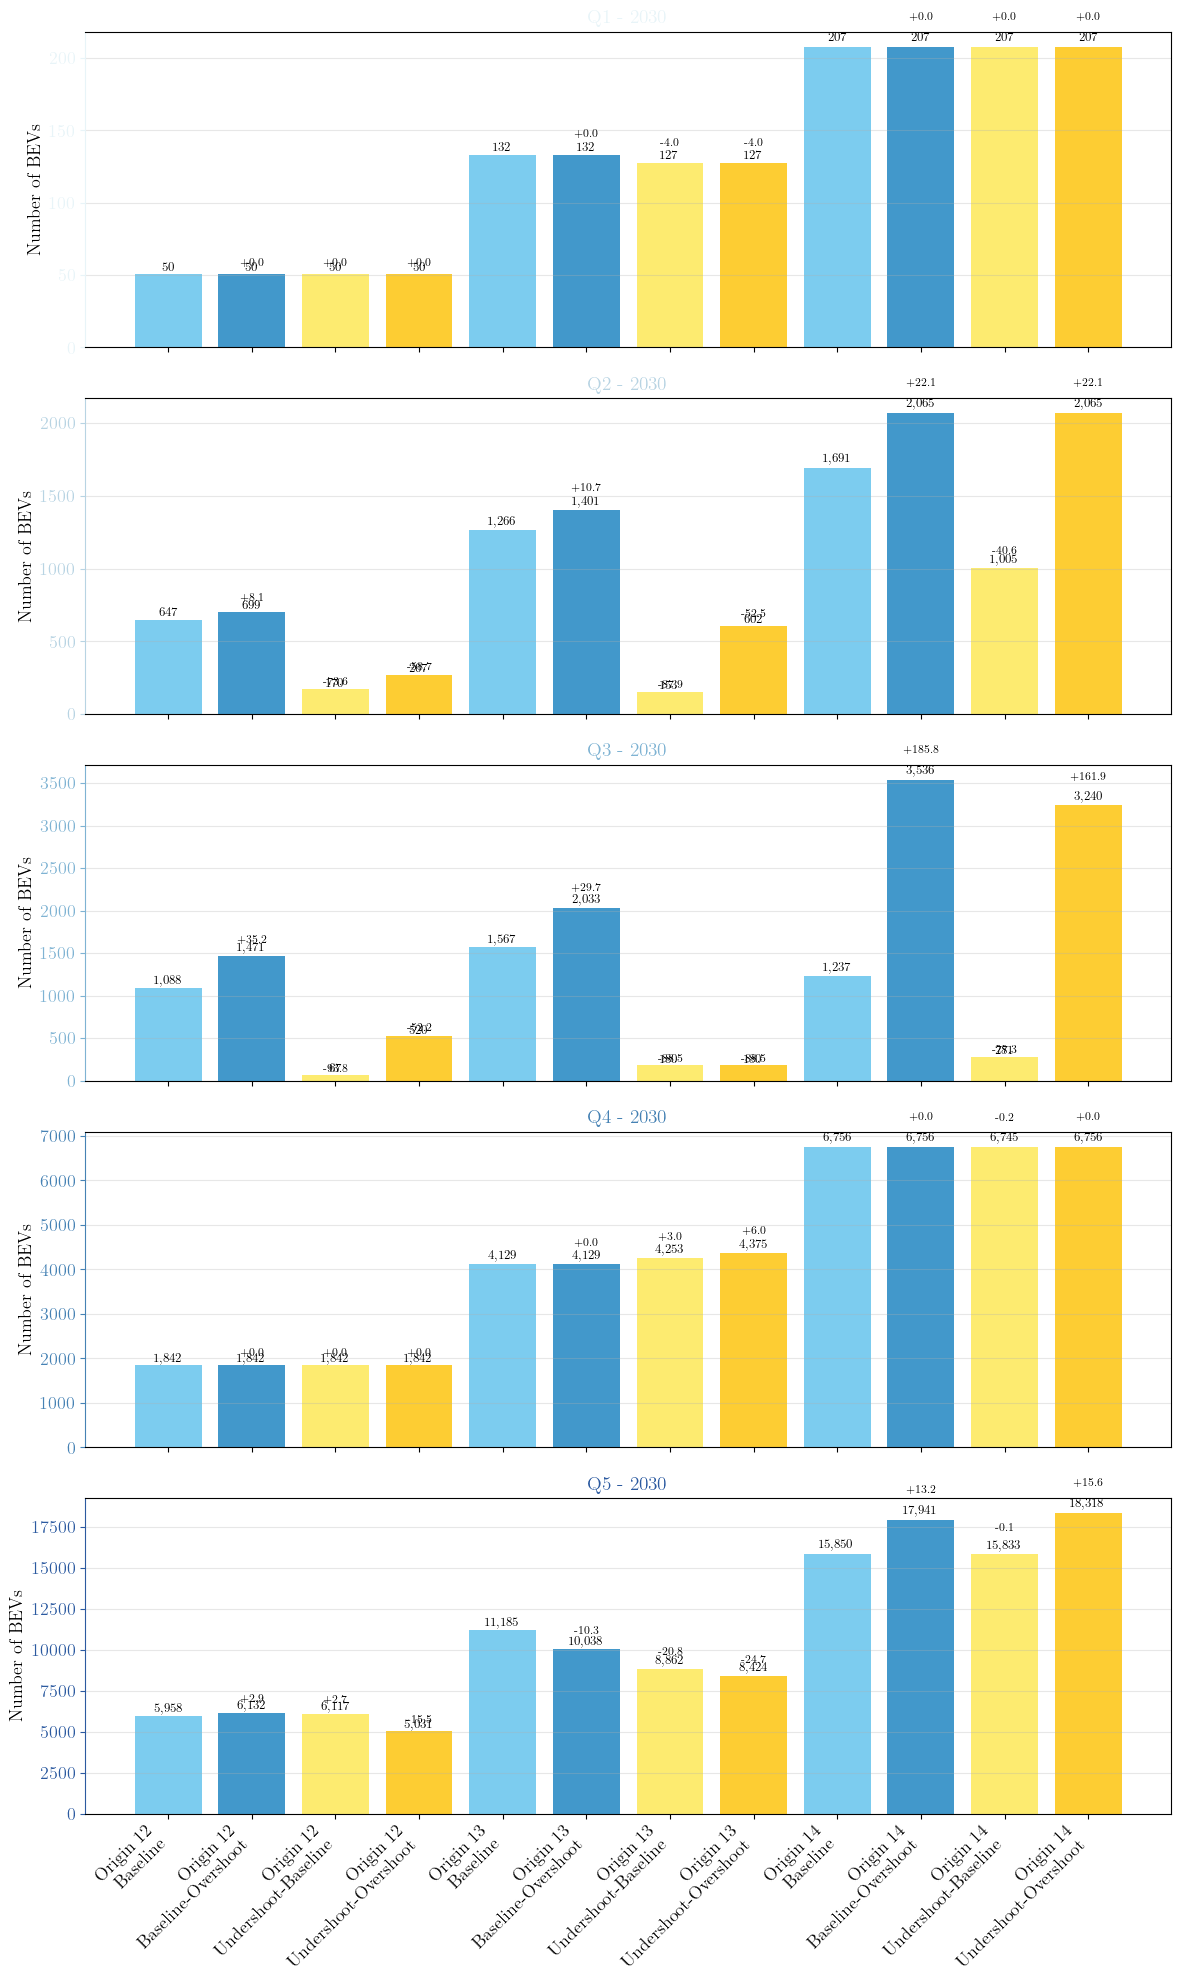

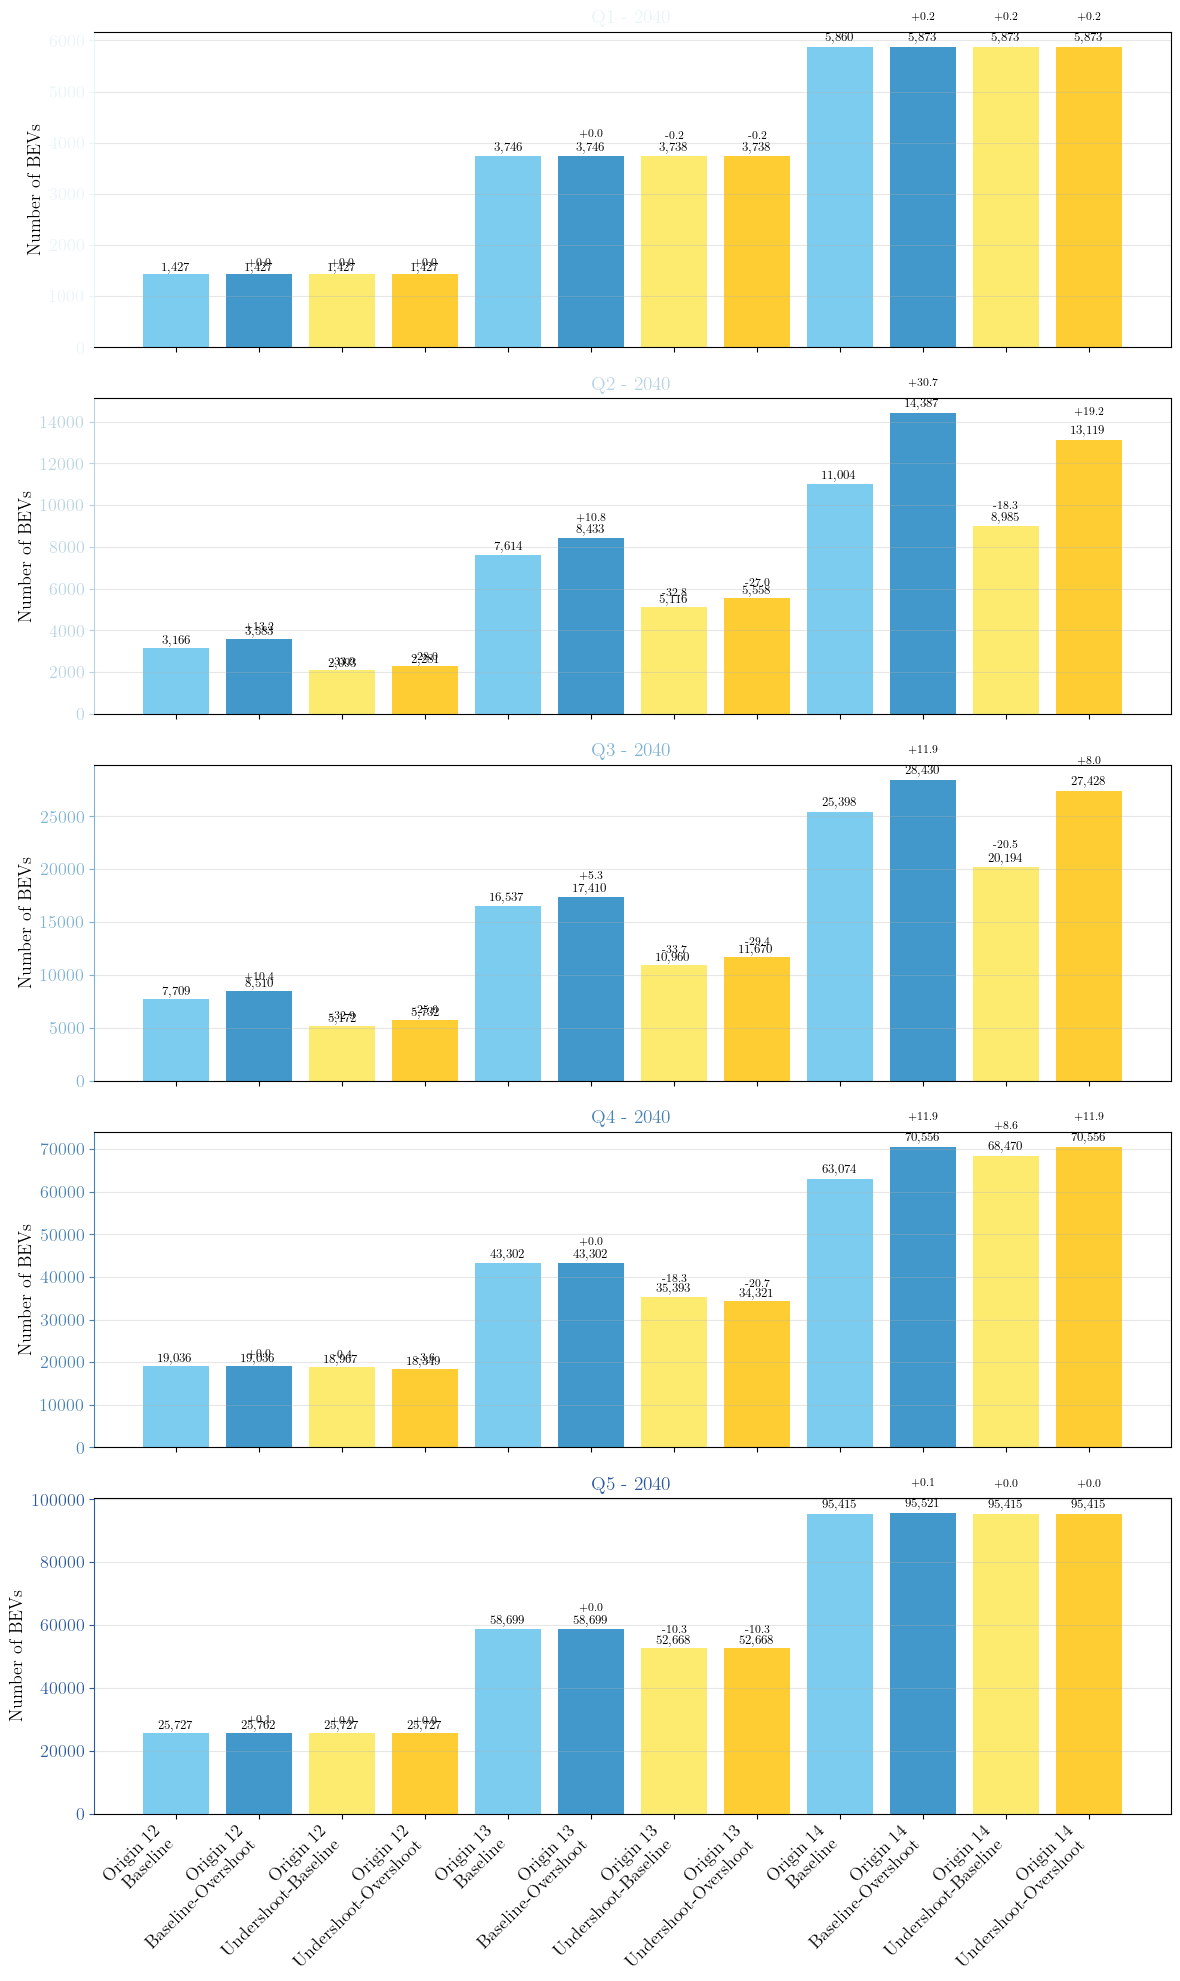

In [161]:
# Plot BEVs by financial status - one financial status per row
income_class_labels = {
    'First quintile': 'Q1',
    'Second quintile': 'Q2', 
    'Third quintile': 'Q3',
    'Fourth quintile': 'Q4',
    'Fifth quintile': 'Q5'
}

# Colors for income quintiles
quintile_colors = ['#e8f4f8', '#b8d4e3', '#7fb3d3', '#4682b4', '#2c5aa0']

years_to_plot = [2030, 2040]
case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Baseline", "Undershoot-Overshoot"]

for year in years_to_plot:
    fig, axes = plt.subplots(5, 1, figsize=(12, 20), sharex=True)
    
    for fs_idx, (fs, label) in enumerate(income_class_labels.items()):
        ax = axes[fs_idx]
        
        # Prepare data for this financial status
        x_positions = np.arange(len(relevant_origins) * len(case_study_order))
        bar_values = []
        bar_labels = []
        bar_colors = []
        rel_diffs = []
        
        for origin in relevant_origins:
            baseline_val = amount_battery_electric_vehs_by_fs["Baseline"][fs][origin][year]
            
            for case_idx, case_study in enumerate(case_study_order):
                value = amount_battery_electric_vehs_by_fs[case_study][fs][origin][year]
                bar_values.append(value)
                bar_labels.append(f'Origin {origin}\n{case_study}')
                bar_colors.append(case_colors[case_idx])
                
                # Calculate relative difference to baseline
                if case_study == "Baseline":
                    rel_diffs.append(None)  # No diff for baseline
                else:
                    rel_diff = (value - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
                    rel_diffs.append(rel_diff)
        
        bars = ax.bar(x_positions, bar_values, color=bar_colors, alpha=0.8)
        
        # Add value labels and relative differences on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            # Value label
            ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01, 
                   f'{int(height):,}', ha='center', va='bottom', fontsize=9)
            
            # Relative difference label (for non-baseline bars)
            if rel_diffs[i] is not None:
                ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.08, 
                       f'{rel_diffs[i]:+.1f}%', ha='center', va='bottom', 
                       fontsize=8, color='black', fontweight='bold')
        
        ax.set_title(f'{label} - {year}', fontsize=14, fontweight='bold', 
                    color=quintile_colors[fs_idx])
        ax.set_xticks(x_positions)
        ax.set_xticklabels(bar_labels, rotation=45, ha='right')
        ax.set_ylabel('Number of BEVs')
        ax.grid(axis='y', alpha=0.3)
        
        # Color the y-axis and title to match the quintile
        ax.tick_params(axis='y', colors=quintile_colors[fs_idx])
        ax.spines['left'].set_color(quintile_colors[fs_idx])
    
    plt.tight_layout()
    plt.show()


In [162]:
# Calculate the highest differences between specific case study pairs
max_differences_by_fs = {}
years_range = range(y_init, Y_end + 1)

# Define the case study pairs to compare
case_study_pairs = [
    ("Baseline-Overshoot", "Baseline"),
    ("Undershoot-Baseline", "Undershoot-Overshoot")
]

# Initialize structure to store max differences
for fs in income_class_labels.keys():
    max_differences_by_fs[fs] = {}
    for origin in relevant_origins:
        max_differences_by_fs[fs][origin] = {}
        for pair_name, (case1, case2) in enumerate(case_study_pairs):
            pair_label = f"{case1} - {case2}"
            max_differences_by_fs[fs][origin][pair_label] = {
                'max_diff': 0,
                'max_diff_year': None,
                'case1_value': 0,
                'case2_value': 0,
                'relative_diff_pct': 0
            }

# Find maximum differences for each financial status, origin, and case study pair
for pair_name, (case1, case2) in enumerate(case_study_pairs):
    pair_label = f"{case1} - {case2}"
    
    for fs in income_class_labels.keys():
        for origin in relevant_origins:
            for year in years_range:
                case1_val = amount_battery_electric_vehs_by_fs[case1][fs][origin].get(year, 0)
                case2_val = amount_battery_electric_vehs_by_fs[case2][fs][origin].get(year, 0)
                
                abs_diff = abs(case1_val - case2_val)
                
                if abs_diff > max_differences_by_fs[fs][origin][pair_label]['max_diff']:
                    max_differences_by_fs[fs][origin][pair_label]['max_diff'] = abs_diff
                    max_differences_by_fs[fs][origin][pair_label]['max_diff_year'] = year
                    max_differences_by_fs[fs][origin][pair_label]['case1_value'] = case1_val
                    max_differences_by_fs[fs][origin][pair_label]['case2_value'] = case2_val
                    
                    if case2_val > 0:
                        max_differences_by_fs[fs][origin][pair_label]['relative_diff_pct'] = ((case1_val - case2_val) / case2_val) * 100
                    else:
                        max_differences_by_fs[fs][origin][pair_label]['relative_diff_pct'] = 0

# Print results
print("Maximum differences in BEVs by financial status for specific case study pairs:\n")

for pair_name, (case1, case2) in enumerate(case_study_pairs):
    pair_label = f"{case1} - {case2}"
    print(f"{'='*60}")
    print(f"CASE STUDY PAIR: {pair_label}")
    print(f"{'='*60}")
    
    for fs, label in income_class_labels.items():
        print(f"\n=== {label} ===")
        for origin in relevant_origins:
            data = max_differences_by_fs[fs][origin][pair_label]
            if data['max_diff'] > 0:
                print(f"Origin {origin}:")
                print(f"  Max difference: {data['max_diff']:,.0f} vehicles")
                print(f"  Year: {data['max_diff_year']}")
                print(f"  {case1} value: {data['case1_value']:,.0f}")
                print(f"  {case2} value: {data['case2_value']:,.0f}")
                print(f"  Relative difference: {data['relative_diff_pct']:+.1f}%")
            else:
                print(f"Origin {origin}: No differences found")
            print()
        print("-" * 50)

# Find the overall maximum difference across all financial statuses, origins, and pairs
overall_max = {
    'max_diff': 0,
    'fs': None,
    'origin': None,
    'pair': None,
    'details': None
}

for fs in max_differences_by_fs:
    for origin in max_differences_by_fs[fs]:
        for pair_label in max_differences_by_fs[fs][origin]:
            if max_differences_by_fs[fs][origin][pair_label]['max_diff'] > overall_max['max_diff']:
                overall_max['max_diff'] = max_differences_by_fs[fs][origin][pair_label]['max_diff']
                overall_max['fs'] = fs
                overall_max['origin'] = origin
                overall_max['pair'] = pair_label
                overall_max['details'] = max_differences_by_fs[fs][origin][pair_label]

print(f"\n{'='*80}")
print(f"OVERALL MAXIMUM DIFFERENCE ACROSS ALL PAIRS:")
print(f"{'='*80}")
print(f"Case study pair: {overall_max['pair']}")
print(f"Financial Status: {income_class_labels[overall_max['fs']]}")
print(f"Origin: {overall_max['origin']}")
print(f"Max difference: {overall_max['details']['max_diff']:,.0f} vehicles")
print(f"Year: {overall_max['details']['max_diff_year']}")
print(f"Case 1 value: {overall_max['details']['case1_value']:,.0f}")
print(f"Case 2 value: {overall_max['details']['case2_value']:,.0f}")
print(f"Relative difference: {overall_max['details']['relative_diff_pct']:+.1f}%")

Maximum differences in BEVs by financial status for specific case study pairs:

CASE STUDY PAIR: Baseline-Overshoot - Baseline

=== Q1 ===
Origin 12:
  Max difference: 594 vehicles
  Year: 2044
  Baseline-Overshoot value: 7,853
  Baseline value: 7,258
  Relative difference: +8.2%

Origin 13:
  Max difference: 1,433 vehicles
  Year: 2044
  Baseline-Overshoot value: 20,948
  Baseline value: 19,515
  Relative difference: +7.3%

Origin 14:
  Max difference: 2,493 vehicles
  Year: 2044
  Baseline-Overshoot value: 32,707
  Baseline value: 30,215
  Relative difference: +8.2%

--------------------------------------------------

=== Q2 ===
Origin 12:
  Max difference: 490 vehicles
  Year: 2044
  Baseline-Overshoot value: 12,000
  Baseline value: 11,510
  Relative difference: +4.3%

Origin 13:
  Max difference: 967 vehicles
  Year: 2044
  Baseline-Overshoot value: 30,809
  Baseline value: 29,841
  Relative difference: +3.2%

Origin 14:
  Max difference: 6,125 vehicles
  Year: 2045
  Baseline-Ove

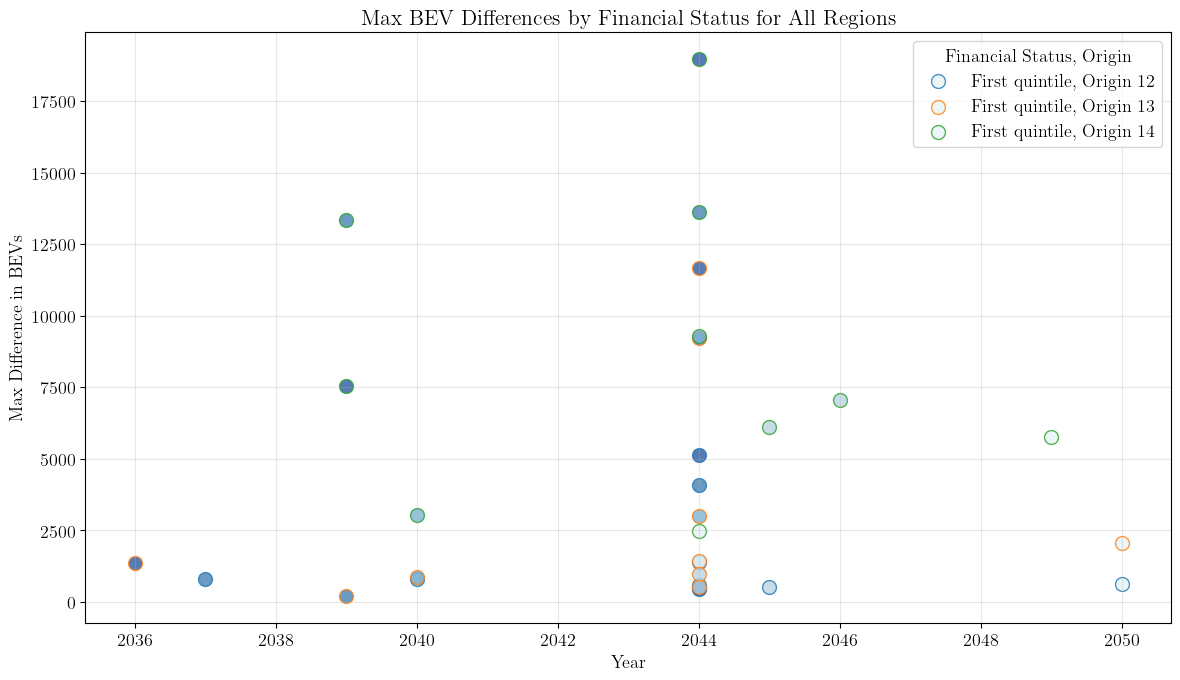

In [163]:
import matplotlib.pyplot as plt

region_colors = {12: '#1f77b4', 13: '#ff7f0e', 14: '#2ca02c'}  # Colors for regions
# Plot max_differences_by_fs values: x-axis is year, color is financial status (fs)
fs_labels = list(max_differences_by_fs.keys())
colors = quintile_colors[:len(fs_labels)]  # Use quintile_colors for fs

plt.figure(figsize=(12, 7))
for origin in relevant_origins:
    for idx, fs in enumerate(fs_labels):
        for pair_label in max_differences_by_fs[fs][origin]:
            year = max_differences_by_fs[fs][origin][pair_label]['max_diff_year']
            diff = max_differences_by_fs[fs][origin][pair_label]['max_diff']
            # Use marker and color per region for distinction
            plt.scatter(
                year, diff,
                color=colors[idx],
                label=f"{fs}, Origin {origin}" if (idx == 0 and pair_label == list(max_differences_by_fs[fs][origin].keys())[0]) else "",
                s=100, alpha=0.8, edgecolor=region_colors.get(origin, 'black')
            )
plt.xlabel("Year")
plt.ylabel("Max Difference in BEVs")
plt.title("Max BEV Differences by Financial Status for All Regions")
handles, labels = plt.gca().get_legend_handles_labels()
# Remove duplicate labels
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Financial Status, Origin")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [164]:
print(amount_battery_electric_vehs.keys())
case_study_labels = list(amount_battery_electric_vehs.keys())
for case_study_label in case_study_labels:
    for origin in relevant_origins:
        print(f"{case_study_label}, origin {origin}, 2044:", amount_battery_electric_vehs[case_study_label][origin][2044])
        print(f"{case_study_label}, origin {origin}, 2045:", amount_battery_electric_vehs[case_study_label][origin][2045])
        print(f"{case_study_label}, origin {origin}, 2046:", amount_battery_electric_vehs[case_study_label][origin][2046])


dict_keys(['Baseline', 'Baseline-Overshoot', 'Undershoot-Baseline', 'Undershoot-Overshoot'])
Baseline, origin 12, 2044: 124749.094747
Baseline, origin 12, 2045: 124755.514496
Baseline, origin 12, 2046: 124826.293874
Baseline, origin 13, 2044: 321375.865368
Baseline, origin 13, 2045: 321392.373315
Baseline, origin 13, 2046: 321404.595201
Baseline, origin 14, 2044: 506378.513158
Baseline, origin 14, 2045: 506404.511286
Baseline, origin 14, 2046: 506423.759346
Baseline-Overshoot, origin 12, 2044: 124557.278496
Baseline-Overshoot, origin 12, 2045: 124563.698239
Baseline-Overshoot, origin 12, 2046: 124747.86398
Baseline-Overshoot, origin 13, 2044: 321116.86649
Baseline-Overshoot, origin 13, 2045: 321133.374434
Baseline-Overshoot, origin 13, 2046: 321215.762597
Baseline-Overshoot, origin 14, 2044: 505371.899483
Baseline-Overshoot, origin 14, 2045: 505397.897612
Baseline-Overshoot, origin 14, 2046: 505569.239173
Undershoot-Baseline, origin 12, 2044: 126861.58429299999
Undershoot-Baseline, ori

## determining the variations between the adoption rates
* path length
* purpose 
* fs status 
* origin + destination



In [165]:
# Collect BEVs by route purpose for each case study
amount_battery_electric_vehs_by_purpose = {}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]
    
    h = output_data["h"]
    odpair_list_dict = {item["id"]: item for item in input_data["Odpair"]}
    techvehicle_list_dict = {item["id"]: item for item in input_data["TechVehicle"]}
    
    # Get all unique purposes from odpairs
    purposes = list(set(odpair_list_dict[r]["purpose"] for r in odpair_list_dict.keys()))
    
    amounts_vehs_by_purpose = {purpose: {} for purpose in purposes}
    
    for y in range(y_init, Y_end + 1):
        for purpose in purposes:
            amounts_vehs_by_purpose[purpose][y] = sum([
                h.get((y, r, tv, g), 0)
                for r in odpair_list_dict.keys()
                for tv in techvehicle_list_dict.keys()
                for g in range(g_init, y + 1)
                if (y, r, tv, g) in h 
                and odpair_list_dict[r]["purpose"] == purpose
                and odpair_list_dict[r]["from"] in relevant_origins
            ])
    
    print(f"Case study: {case_study_name}, BEVs by purpose in {year}:")
    for purpose in purposes:
        print(f"  Purpose {purpose}: {amounts_vehs_by_purpose[purpose][year]}")
    
    amount_battery_electric_vehs_by_purpose[case_study_name] = amounts_vehs_by_purpose

Case study: Baseline, BEVs by purpose in 2044:
  Purpose 1: 60500.061868
  Purpose 2: 547270.344525
  Purpose 3: 6257.994415
  Purpose 4: 338475.072465
Case study: Baseline-Overshoot, BEVs by purpose in 2044:
  Purpose 1: 60489.893149999996
  Purpose 2: 546282.861418
  Purpose 3: 6257.850278
  Purpose 4: 338015.439623
Case study: Undershoot-Baseline, BEVs by purpose in 2044:
  Purpose 1: 61639.242078999996
  Purpose 2: 555198.872713
  Purpose 3: 6257.994412
  Purpose 4: 342104.60307
Case study: Undershoot-Overshoot, BEVs by purpose in 2044:
  Purpose 1: 60500.06186
  Purpose 2: 547620.104045
  Purpose 3: 6257.994413
  Purpose 4: 338648.386389


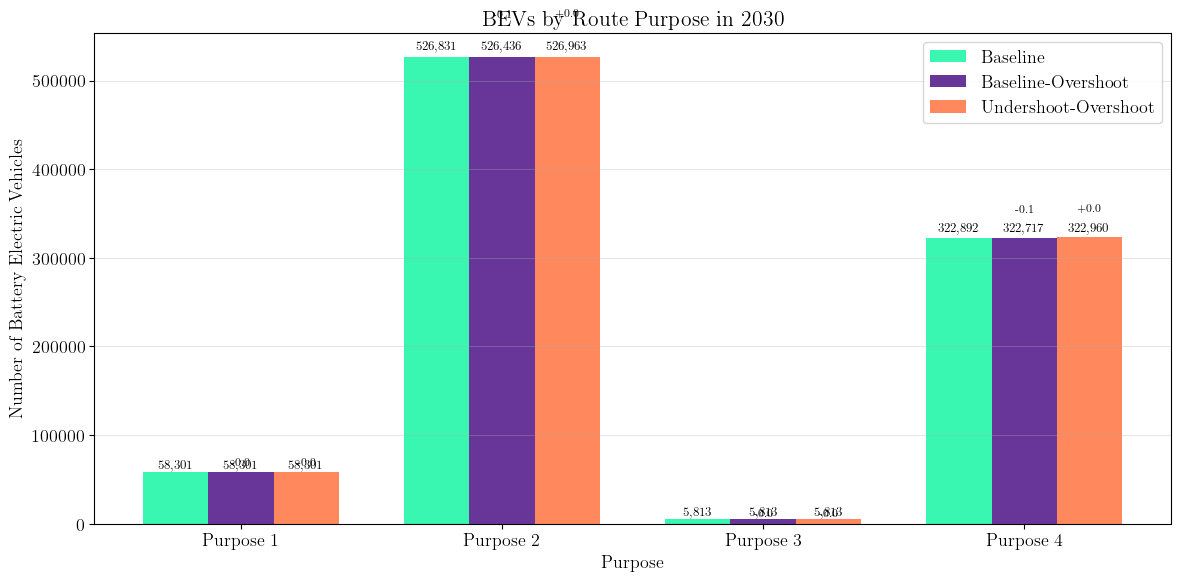

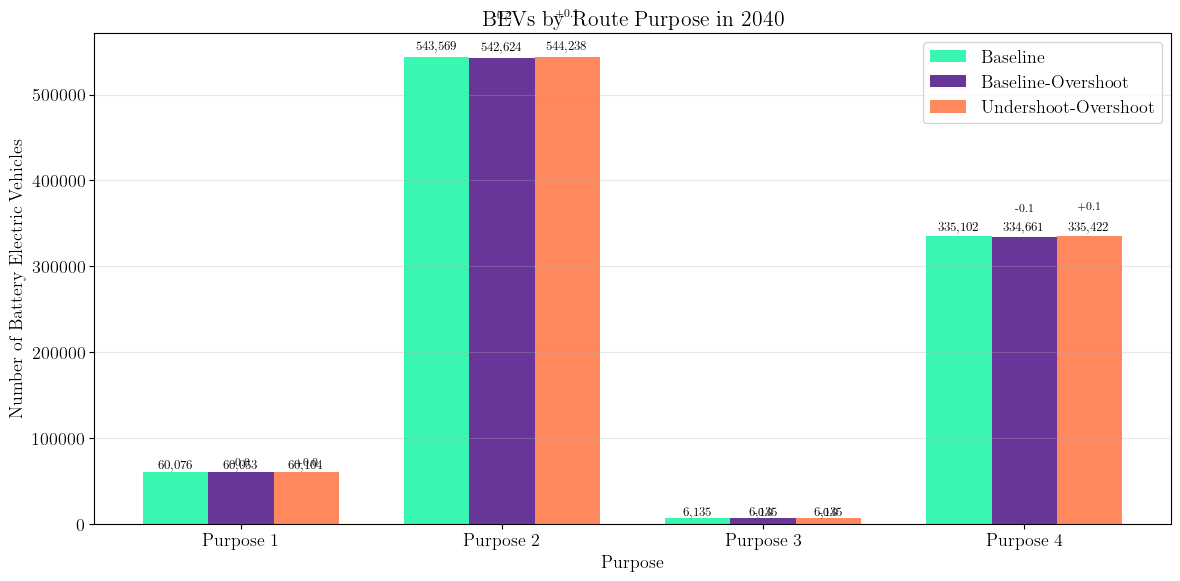

In [166]:
# Plot BEVs by purpose with relative percentages to baseline
purposes = list(set(purpose for case_data in amount_battery_electric_vehs_by_purpose.values() 
                   for purpose in case_data.keys()))
years_to_plot = [2030, 2040]
case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Overshoot"]
case_colors = {"Baseline": "#07f49e", "Baseline-Overshoot": "#42047e", "Undershoot-Overshoot": "#ff6b35"}

for year in years_to_plot:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(purposes))
    width = 0.25
    
    for i, case in enumerate(case_study_order):
        if case in amount_battery_electric_vehs_by_purpose:
            values = [amount_battery_electric_vehs_by_purpose[case][purpose][year] 
                     for purpose in purposes]
            
            bars = ax.bar(x + i * width, values, width, 
                         label=case, color=case_colors[case], alpha=0.8)
            
            # Add value labels and relative differences on bars
            for j, bar in enumerate(bars):
                height = bar.get_height()
                # Value label
                ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01,
                       f'{int(height):,}', ha='center', va='bottom', fontsize=9)
                
                # Relative difference label (for non-baseline cases)
                if case != "Baseline":
                    baseline_val = amount_battery_electric_vehs_by_purpose["Baseline"][purposes[j]][year]
                    if baseline_val > 0:
                        rel_diff = (height - baseline_val) / baseline_val * 100
                        ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.08,
                               f'{rel_diff:+.1f}%', ha='center', va='bottom', 
                               fontsize=8, color='black', fontweight='bold')
    
    ax.set_xlabel('Purpose')
    ax.set_ylabel('Number of Battery Electric Vehicles')
    ax.set_title(f'BEVs by Route Purpose in {year}')
    ax.set_xticks(x + width)
    ax.set_xticklabels([f'Purpose {p}' for p in purposes])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


Case study: Baseline
  Origin 12:
    Year 2030: 120234 BEVs
    Year 2040: 123988 BEVs
    Year 2050: 125038 BEVs
  Origin 13:
    Year 2030: 307784 BEVs
    Year 2040: 318510 BEVs
    Year 2050: 321846 BEVs
  Origin 14:
    Year 2030: 485821 BEVs
    Year 2040: 502386 BEVs
    Year 2050: 506864 BEVs

Case study: Baseline-Overshoot
  Origin 12:
    Year 2030: 120162 BEVs
    Year 2040: 123795 BEVs
    Year 2050: 124945 BEVs
  Origin 13:
    Year 2030: 307717 BEVs
    Year 2040: 318288 BEVs
    Year 2050: 321687 BEVs
  Origin 14:
    Year 2030: 485391 BEVs
    Year 2040: 501391 BEVs
    Year 2050: 506303 BEVs

Case study: Undershoot-Baseline
  Origin 12:
    Year 2030: 120507 BEVs
    Year 2040: 124483 BEVs
    Year 2050: 125375 BEVs
  Origin 13:
    Year 2030: 308316 BEVs
    Year 2040: 319958 BEVs
    Year 2050: 322595 BEVs
  Origin 14:
    Year 2030: 486199 BEVs
    Year 2040: 503367 BEVs
    Year 2050: 506774 BEVs

Case study: Undershoot-Overshoot
  Origin 12:
    Year 2030: 12039

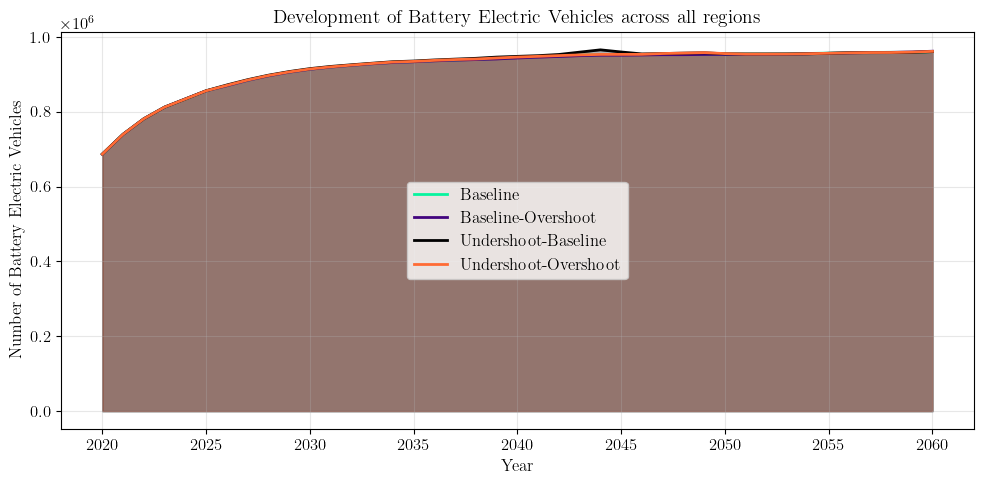

In [167]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Garamond",
    "font.size": 12,
}) 
colors = {
    "Baseline-Overshoot": "#42047e",
    "Baseline": "#07f49e",
    "Undershoot-Overshoot": "#ff6b35",
}

# Print results for each region
for case_study_name, origins_data in amount_battery_electric_vehs.items():
    print(f"\nCase study: {case_study_name}")
    for origin in relevant_origins:
        print(f"  Origin {origin}:")
        for year in [2030, 2040, 2050]:
            if year in origins_data[origin]:
                print(f"    Year {year}: {origins_data[origin][year]:.0f} BEVs")

# Sum across all relevant origins for each case study
total_bevs_by_case_study = {}
for case_study_name, origins_data in amount_battery_electric_vehs.items():
    total_bevs_by_case_study[case_study_name] = {}
    # Get all years from first origin
    years = sorted(origins_data[relevant_origins[0]].keys())
    
    for year in years:
        total_bevs_by_case_study[case_study_name][year] = sum(
            origins_data[origin][year] for origin in relevant_origins
        )

# Plot the total BEV development across all regions
plt.figure(figsize=(10, 5))
for case_study, yearly_data in total_bevs_by_case_study.items():
    years = sorted(yearly_data.keys())
    values = [yearly_data[year] for year in years]
    plt.plot(years, values, label=case_study, color=colors.get(case_study, "#000000"), linewidth=2)
    plt.fill_between(years, values, alpha=0.3, color=colors.get(case_study, "#000000"))

plt.xlabel('Year')
plt.ylabel('Number of Battery Electric Vehicles')
plt.title('Development of Battery Electric Vehicles across all regions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.ylim(0.6 * 10 ** 6, 1.1 * 10 ** 6)
plt.savefig("bev_development_all_regions.png", dpi=300)
plt.show()

In [168]:
def find_matching_dict(target_dict, list_of_dicts):
    """
    Finds and returns the first dictionary in the list that matches
    the target dictionary in terms of all key-value pairs.

    Parameters:
        target_dict (dict): The dictionary to match.
        list_of_dicts (list): List of dictionaries to search.

    Returns:
        dict or None: The matching dictionary, or None if not found.
    """
    for d in list_of_dicts:
        if all(d.get(k) == v for k, v in target_dict.items()):
            return d
    return None


In [169]:
q_fuel_by_type_by_year_by_case_study = {}
y_init = 2020
Y = 41
Y_end = y_init + Y
for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    q_fuel_infr_plus = output_data["q_fuel_infr_plus"]
    q_fuel_infr_plus_by_route = output_data["q_fuel_infr_plus_by_route"]
    odpair_list = input_data["Odpair"]
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    fuel_list = input_data["Fuel"]
    investment_period = input_data["Model"]["investment_period"]
    geographic_elements = input_data["GeographicElement"]
    InitialFuelingInfr_list = input_data["InitialFuelingInfr"]
    
    InitialFuelingInfr_dict = {item["id"]: item for item in InitialFuelingInfr_list}
    geographic_elements_dict = {item["id"]: item for item in geographic_elements}
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    fuel_list_dict = {item["id"]: item for item in fuel_list}
    l_list = input_data["FuelingInfrTypes"]
    l_dict = {item["id"]: item for item in l_list}
    q_fuel_by_type_by_year = {}
    q_fuel_by_type_by_geo = {}

    for geo in geographic_elements_dict.keys():
        q_fuel_by_type_by_geo[geo] = {}
        for fs in financial_status_dict.keys():
            for l in l_dict.keys():
                q_fuel_by_type_by_geo[geo][l] = {}
                for year in range(y_init, Y_end):
                    for f in fuel_list_dict.keys():
                        if l < 4:
                            match_to_find = {
                                "fuel": fuel_list_dict[f]["name"],
                                "type": l_dict[l]["fueling_type"],
                                "allocation": geo,
                            }
                            if not find_matching_dict(match_to_find, InitialFuelingInfr_list) == None:
                                matching_init = find_matching_dict(match_to_find, InitialFuelingInfr_list)
                                init_fuel_infr = matching_init["installed_kW"]
                            else:
                                init_fuel_infr = 0

                            if l_dict[l]["fueling_type"] not in ["home"]:
                                cap_total = init_fuel_infr + sum([q_fuel_infr_plus.get((y, (f, l), geo), 0) for y in range(y_init, year+1) for f in fuel_list_dict.keys()])
                                q_fuel_by_type_by_geo[geo][l][year] = cap_total
                            else: 
                                cap_total = init_fuel_infr + sum([q_fuel_infr_plus_by_route.get((y, r, (f, l), geo), 0) for y in range(y_init, year+1) for r in odpair_list_dict.keys() for f in fuel_list_dict.keys()])
                                q_fuel_by_type_by_geo[geo][l][year] = cap_total

    q_fuel_by_type_by_year_by_case_study[case_study_name] = q_fuel_by_type_by_geo




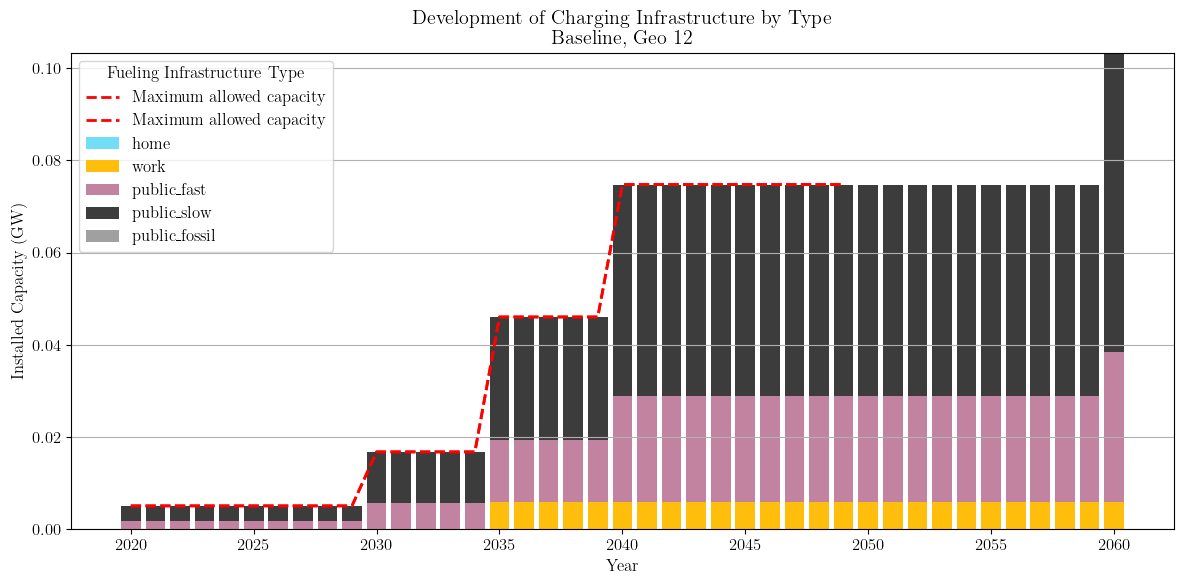

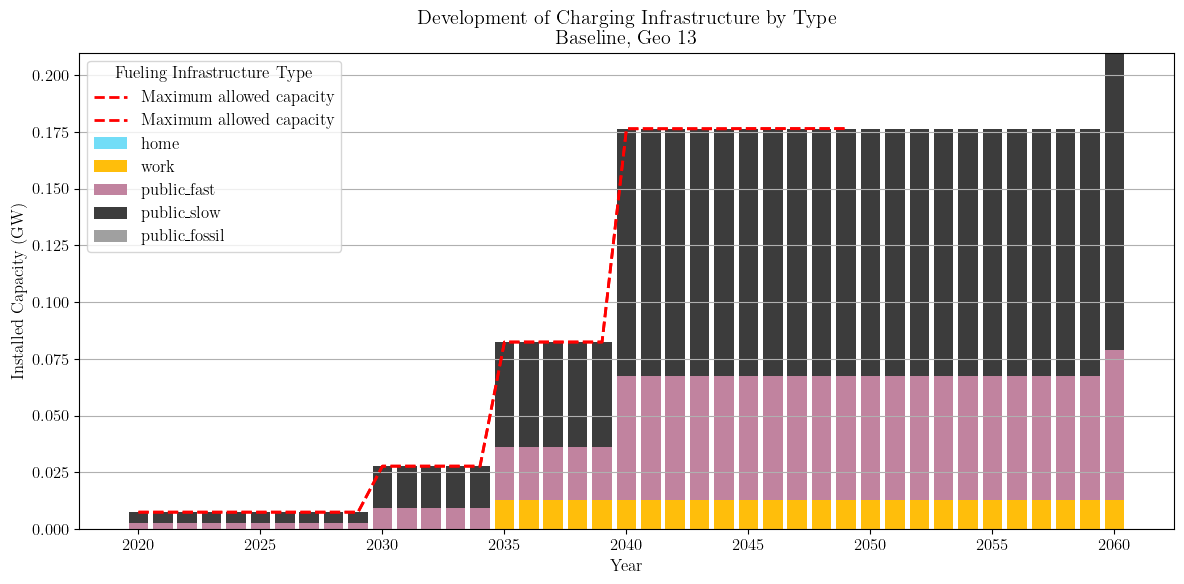

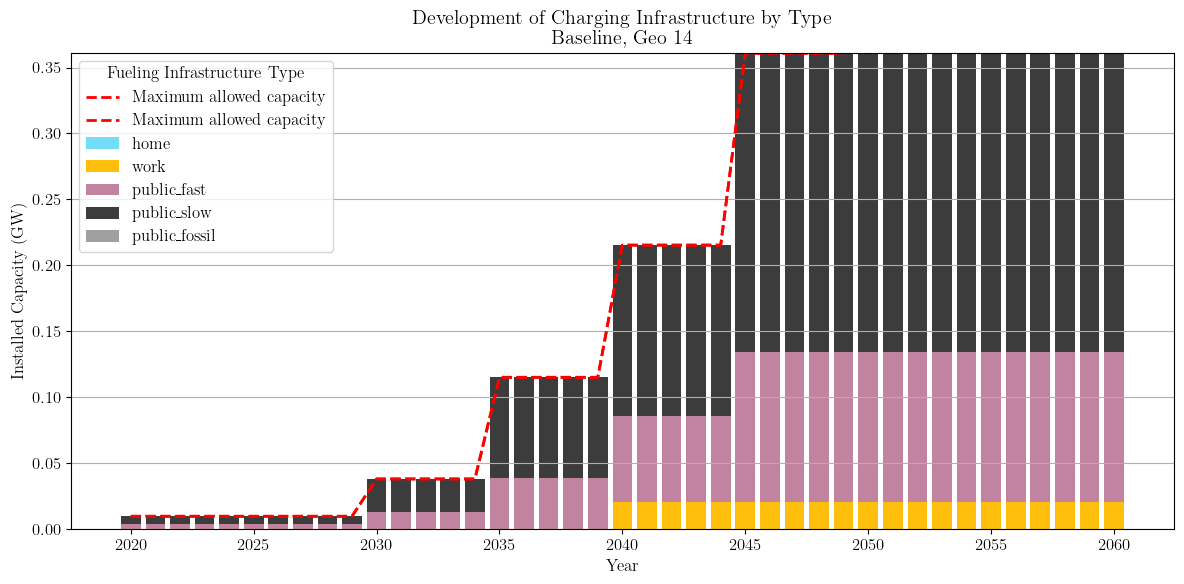

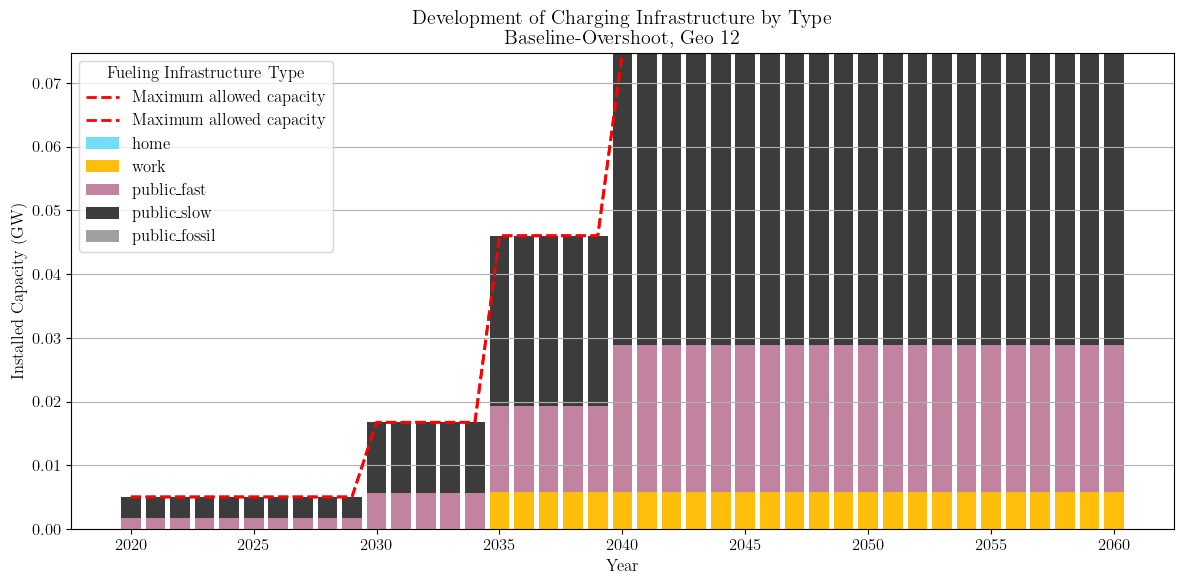

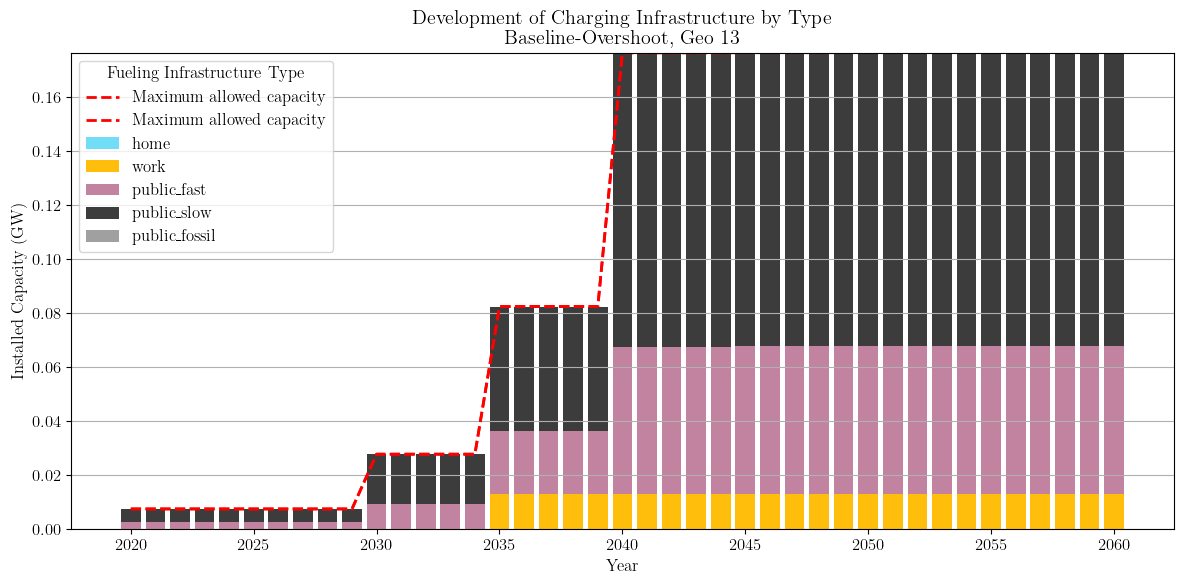

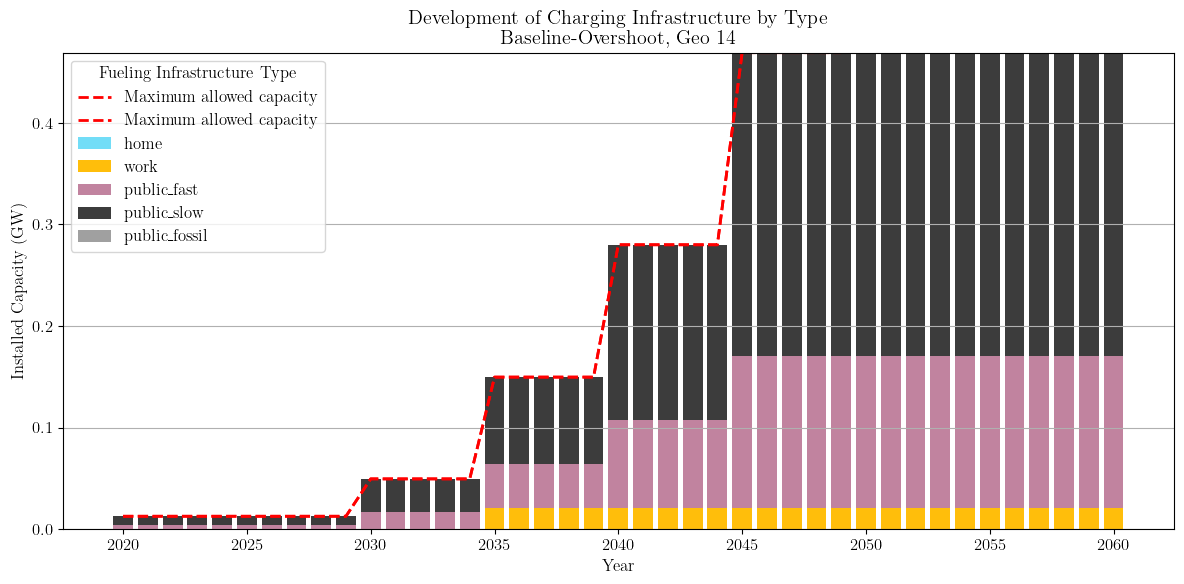

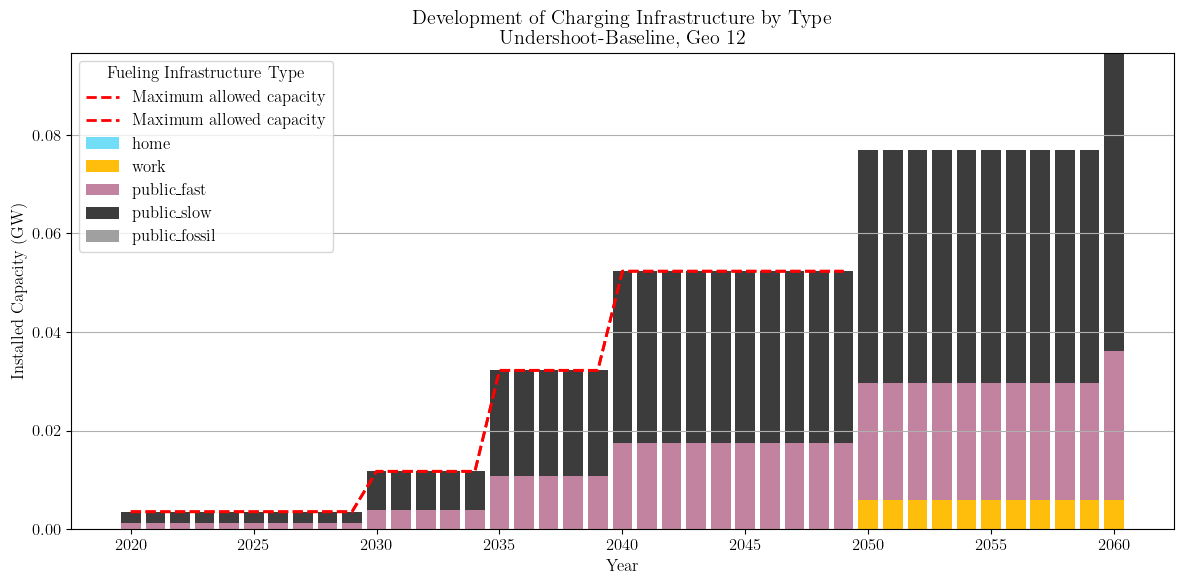

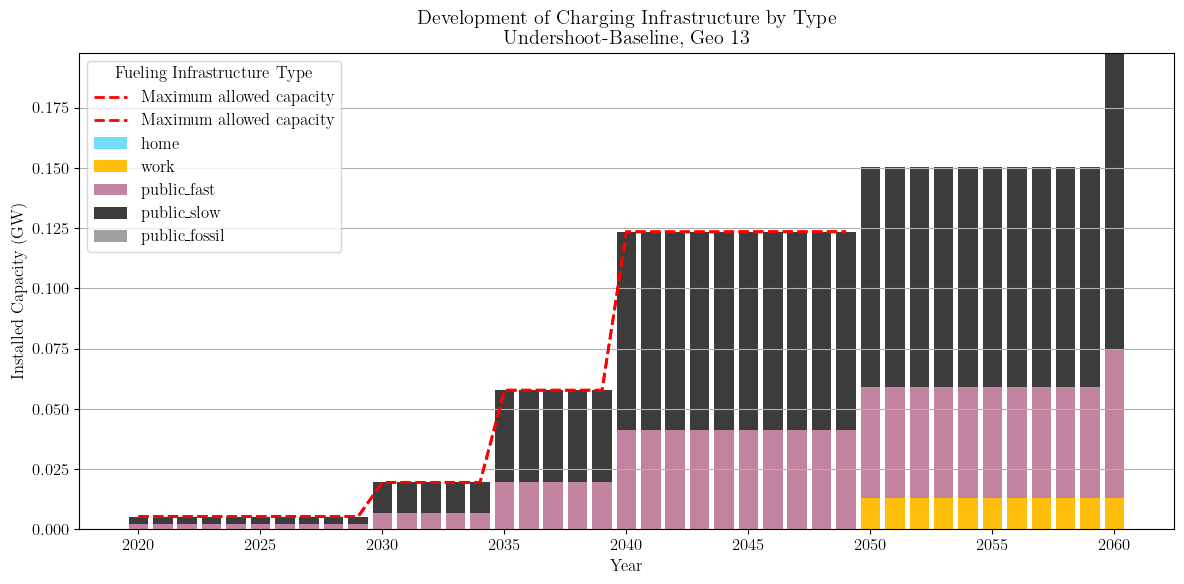

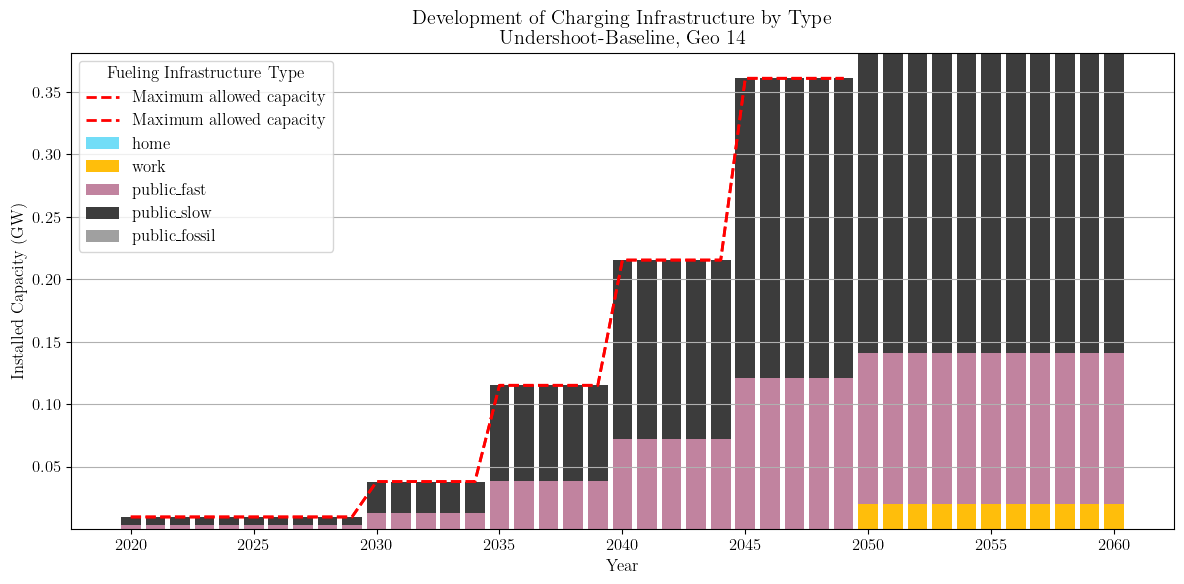

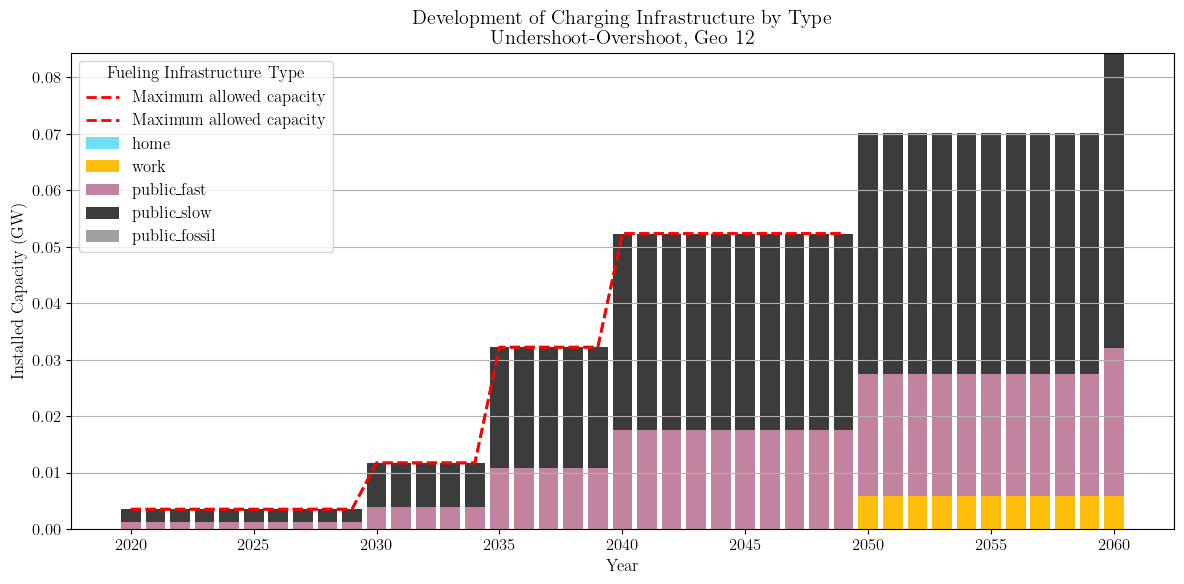

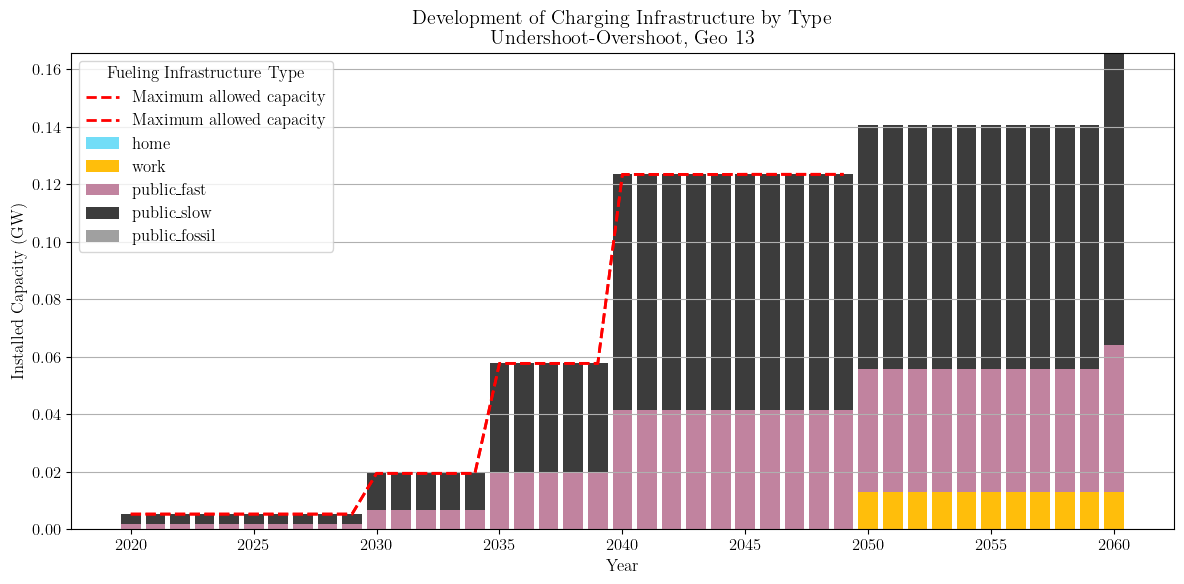

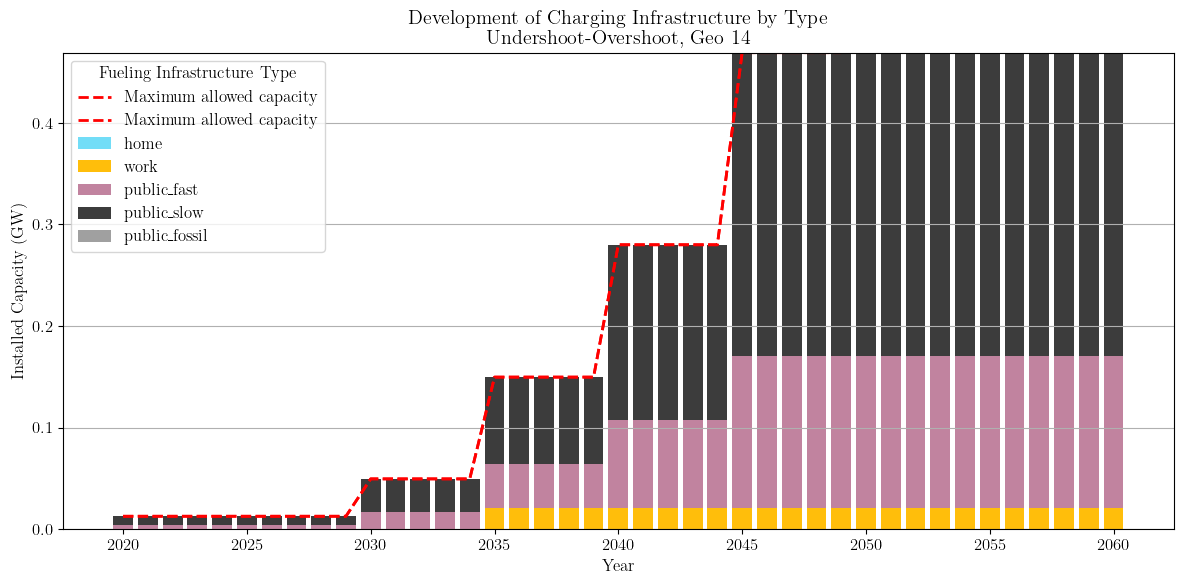

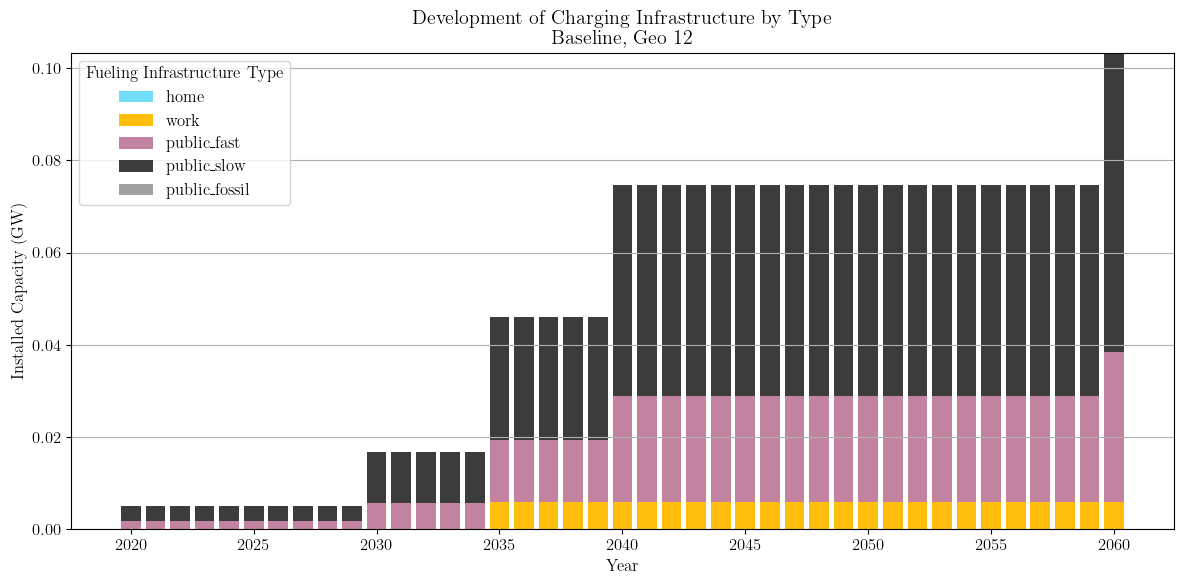

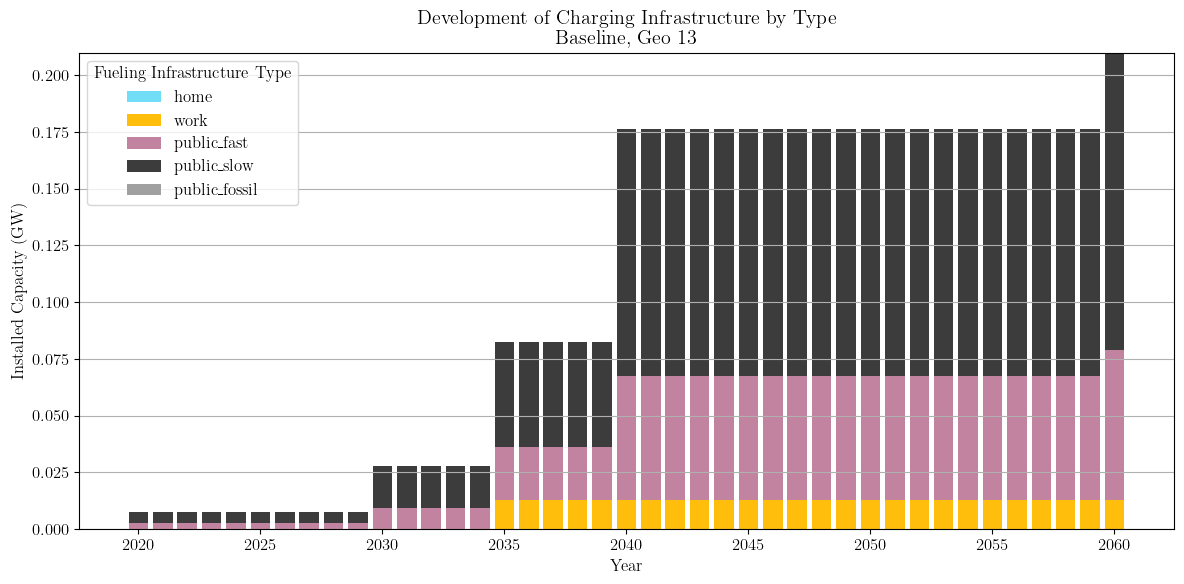

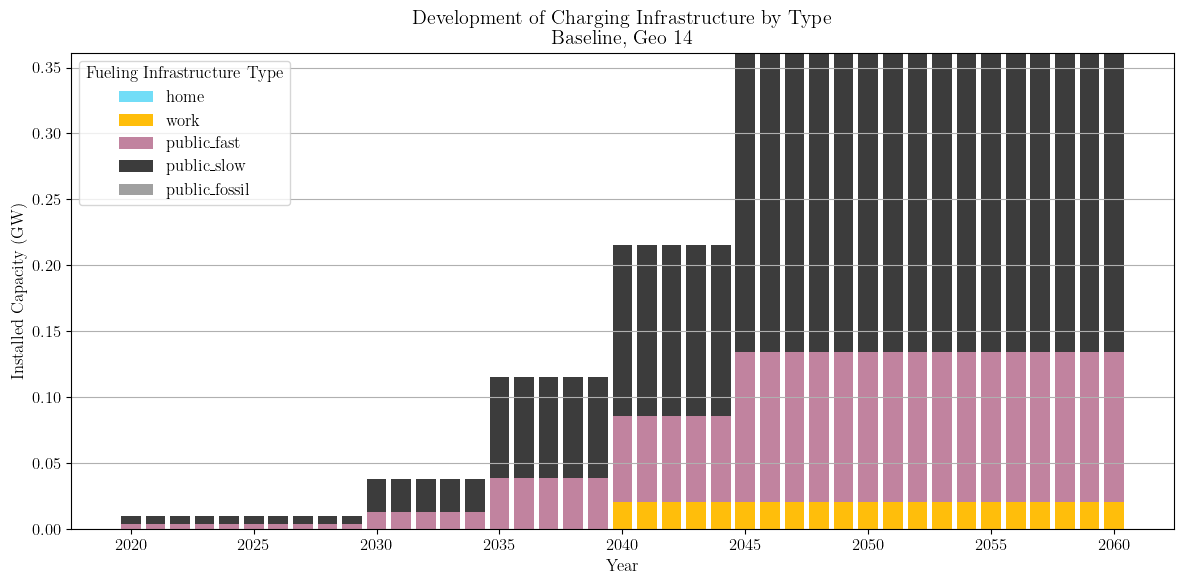

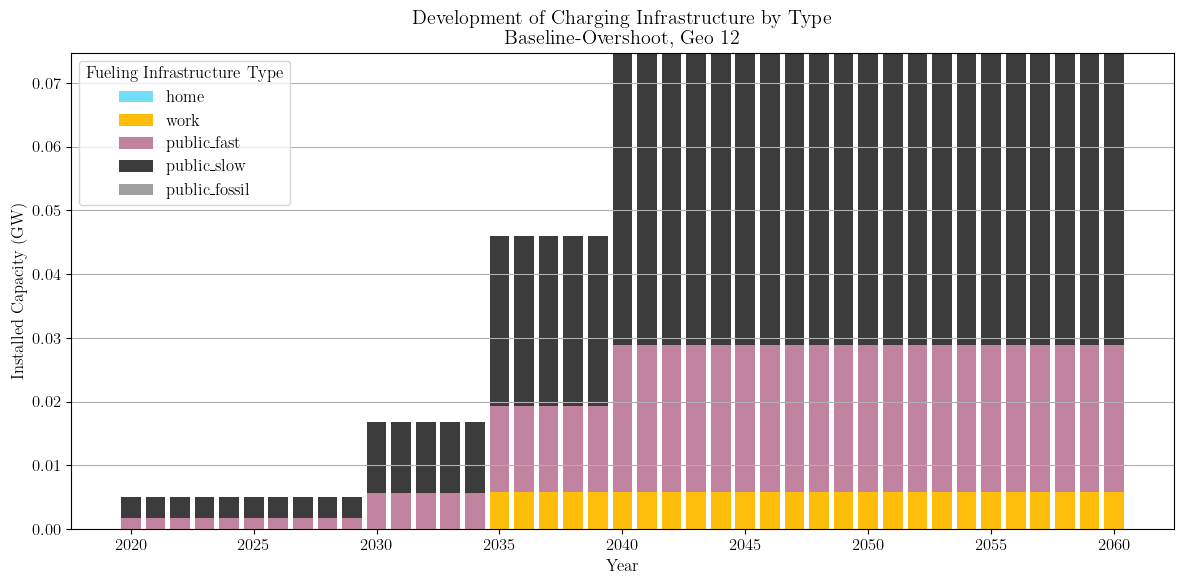

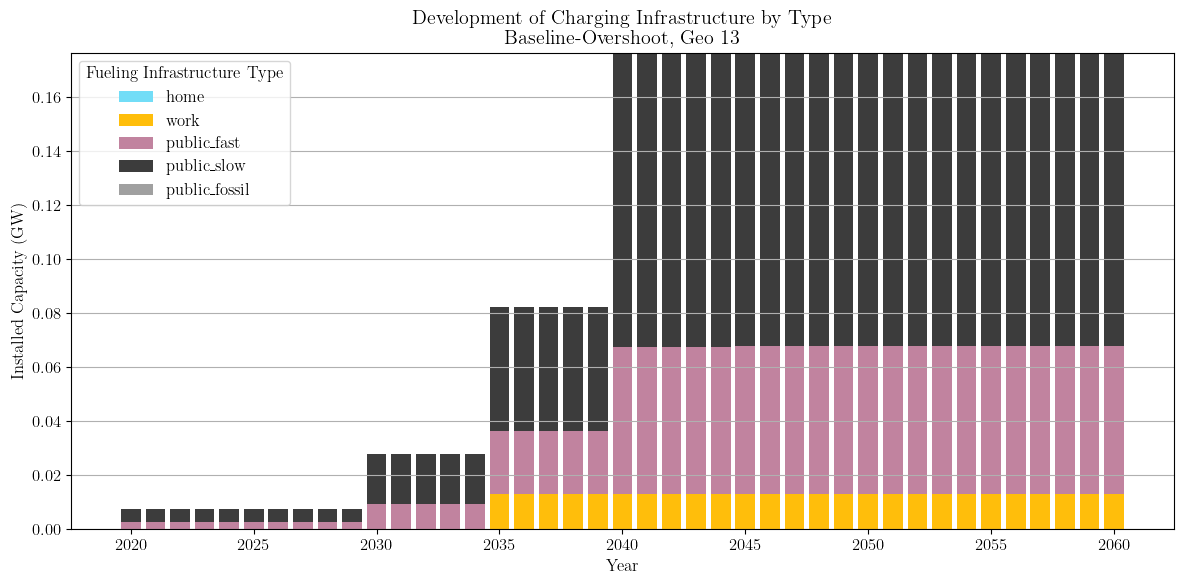

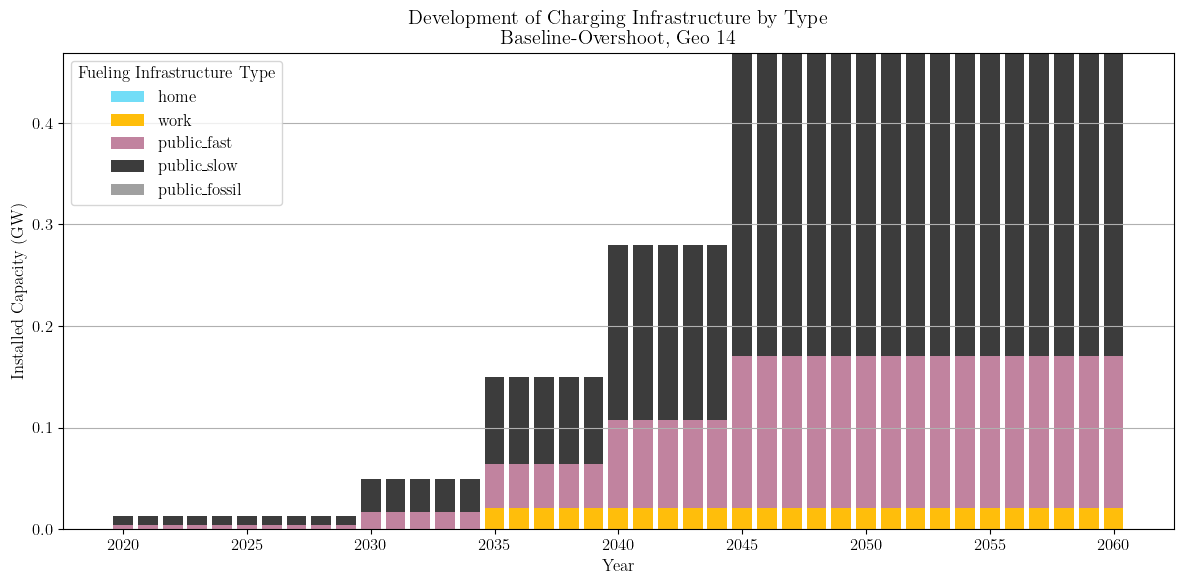

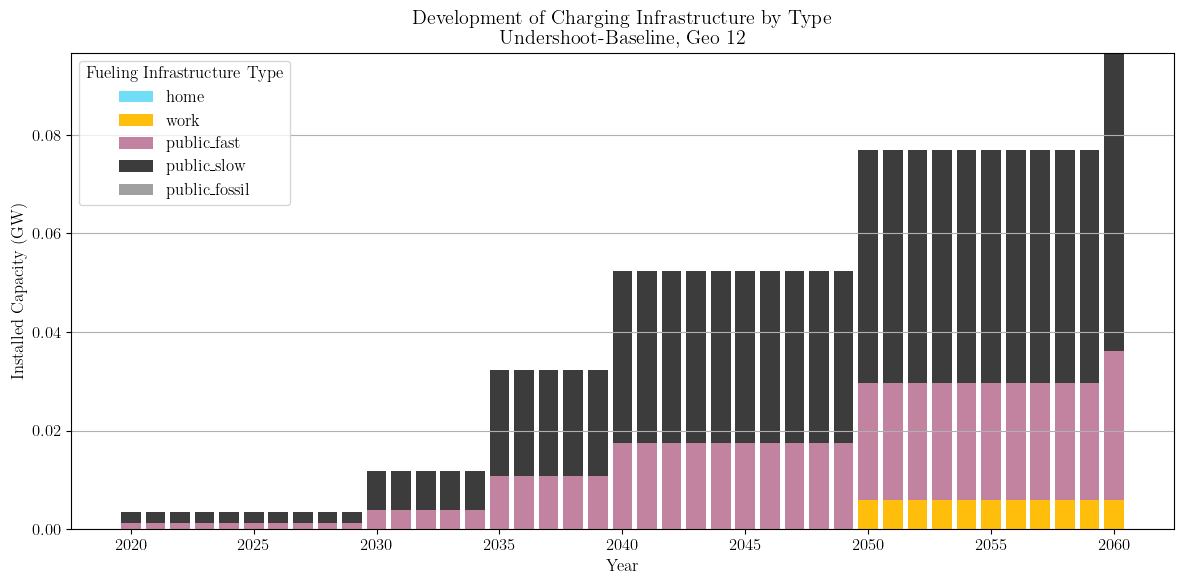

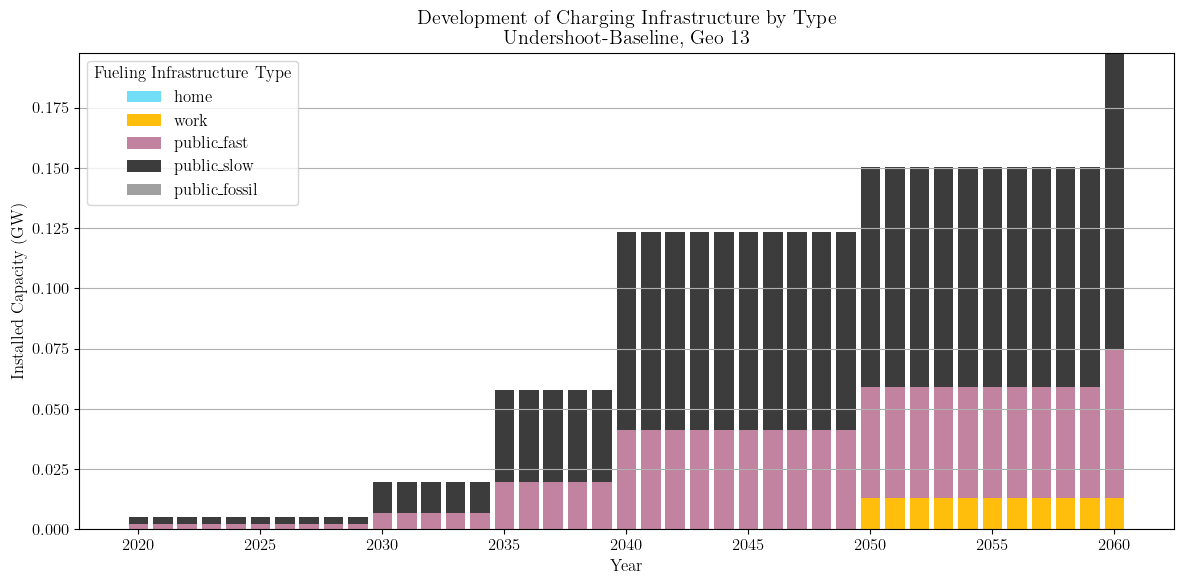

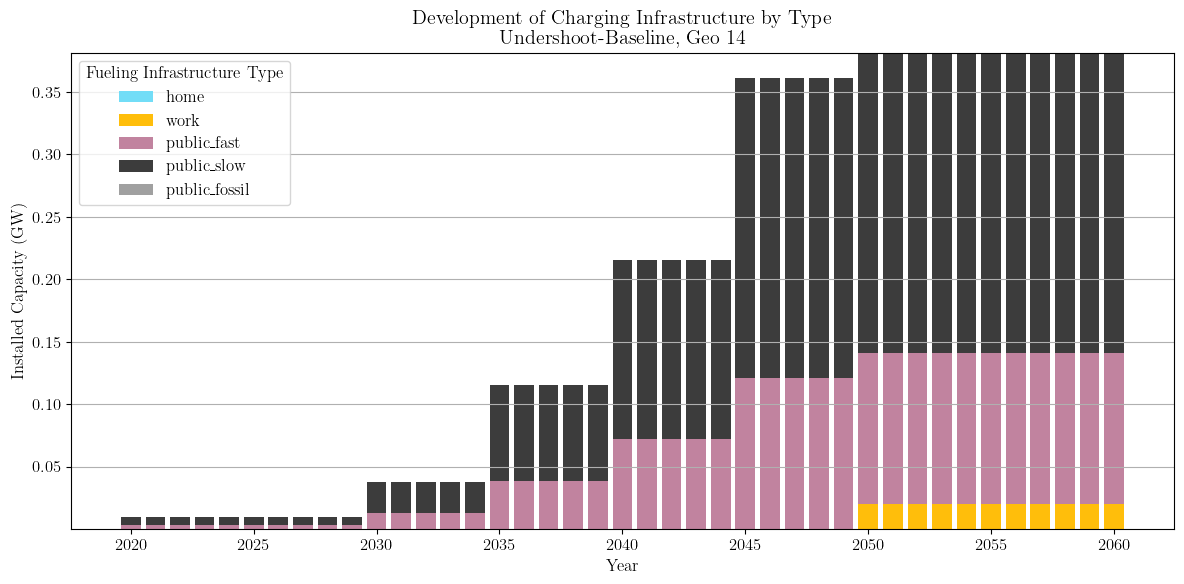

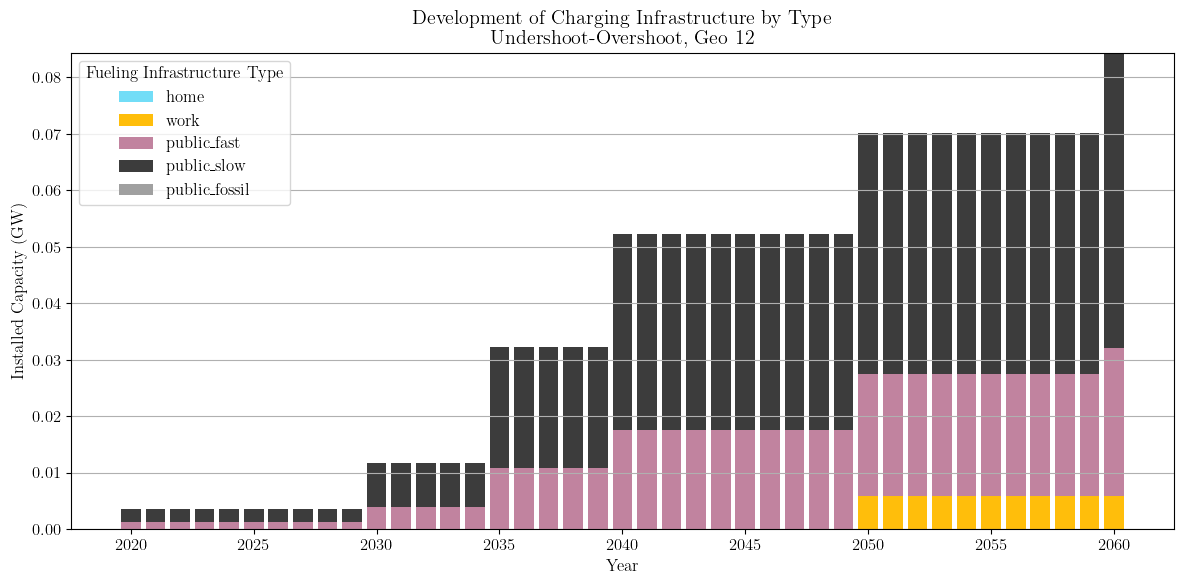

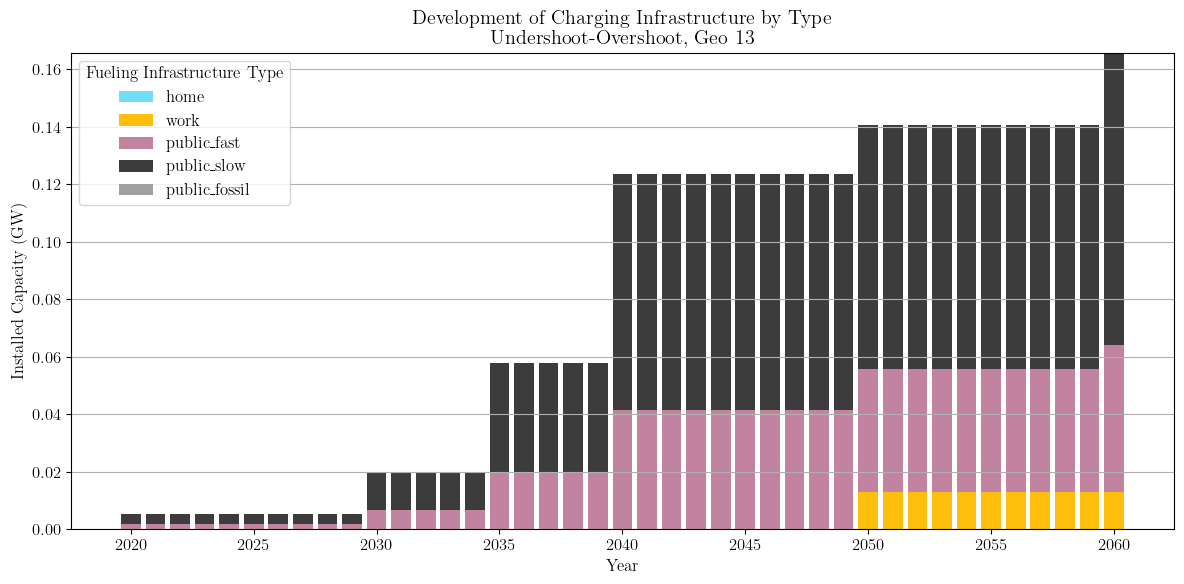

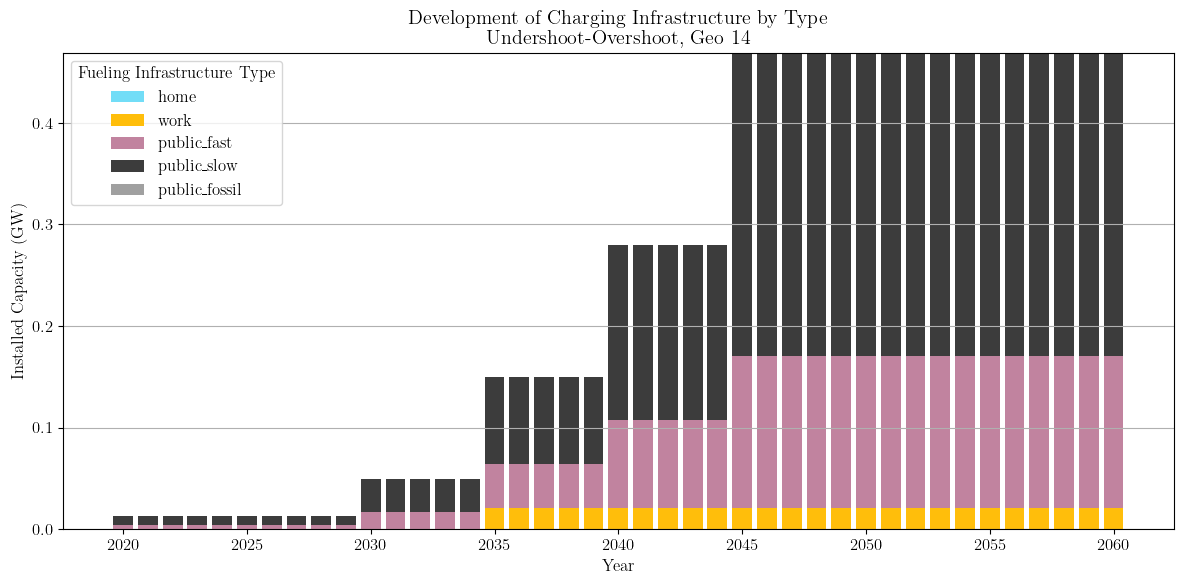

In [170]:
# Plot stacked bars for each case study: fueling infrastructure by year and type

# Plot stacked bars for each case study: fueling infrastructure by year and type
# Plot stacked bars for each case study: fueling infrastructure by year and type, plus max capacity
places_ids = {
    12: "ES211",
    13: "ES212",
    14: "ES213"
}
for case_study, geo_data in q_fuel_by_type_by_year_by_case_study.items():
    # Get input_data for this case study
    input_data = case_study_input[case_study]
    # Get input_data for this case study
    input_data = case_study_input[case_study]
    max_capacity_data = input_data.get("MaximumFuelingCapacityByTypeByYear", [])
    
    for geo, type_data in geo_data.items():
        if geo not in [12, 13, 14]:
            continue
        
        # Filter max_capacity_data for this specific geo using places_ids
        geo_location = places_ids.get(geo)
        geo_max_capacity_data = [item for item in max_capacity_data if item.get("location") == geo_location]
        
        # Build a dict: {year: maximum_capacity} for this geo
        max_capacity_by_year = {item["year"]: item["maximum_capacity"] for item in geo_max_capacity_data}
        
        fuel_type_ids = list(type_data.keys())
        if not fuel_type_ids:
            continue
        years = sorted({year for l_id in fuel_type_ids for year in type_data[l_id].keys()})
        if not years:
            continue
        data_by_type = []
        fueling_type_names = []
        fueling_type_colors = {
            'home': '#72DDF7',
            'work': '#FFBE0B',
            'public_fast': '#C1839F',
            'public_slow': '#3C3C3C',
            'public_fossil': '#A0A0A0'
        }
        for l_id in fuel_type_ids:
            values = [type_data[l_id].get(year, 0) for year in years]
            data_by_type.append(np.array(values) * 1e-6)  # Convert to GW if needed
            fueling_type_names.append(l_dict[l_id]['fueling_type'])
        colors = [fueling_type_colors.get(l_dict[l_id]['fueling_type'], None) for l_id in fuel_type_ids]

        fig, ax = plt.subplots(figsize=(12, 6))
        bottom = np.zeros(len(years))
        for idx, values in enumerate(data_by_type):
            ax.bar(years, values, bottom=bottom, label=fueling_type_names[idx], color=colors[idx], width=0.8)
            bottom += values

        # Plot maximum capacity as a line
        # Only keep max capacity values for years where they are defined (every 5 years from 2025 to 2050)
        # Create step-wise max capacity values (investment periods are 5 years)
        max_cap_values = []
        for year in years:
            # Find the investment period this year belongs to
            investment_year = ((year - 2025) // 5) * 5 + 2025
            if investment_year < 2025:
                investment_year = 2025
            elif investment_year > 2050:
                investment_year = 2050
            
            # Get the capacity for this investment period, convert to GW
            capacity = max_capacity_by_year.get(investment_year, np.nan)
            if not np.isnan(capacity):
                max_cap_values.append(capacity * 1e-6)
            else:
                max_cap_values.append(np.nan)
        # Filter out NaN values for plotting
        valid_indices = [i for i, val in enumerate(max_cap_values) if not np.isnan(val)]
        valid_years = [years[i] for i in valid_indices]
        valid_max_cap = [max_cap_values[i] for i in valid_indices]
        if valid_years:  # Only plot if there are valid data points
            ax.plot(valid_years, valid_max_cap, color='red', linestyle='--', linewidth=2, label='Maximum allowed capacity')
        ax.plot(years, max_cap_values, color='red', linestyle='--', linewidth=2, label='Maximum allowed capacity')

        ax.set_title(f"Development of Charging Infrastructure by Type\n{case_study}, Geo {geo}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Installed Capacity (GW)")
        ax.legend(title="Fueling Infrastructure Type")
        plt.tight_layout()
        plt.grid(axis='y', zorder=-1)
        plt.show()
for case_study, geo_data in q_fuel_by_type_by_year_by_case_study.items():
    for geo, type_data in geo_data.items():
        if geo not in [12, 13, 14]:
            continue
        # type_data: dict[fuel_type_id][year] = value
        fuel_type_ids = list(type_data.keys())
        # Only plot if there is at least one fuel type with data
        if not fuel_type_ids:
            continue
        # Get all years present for this geo
        years = sorted({year for l_id in fuel_type_ids for year in type_data[l_id].keys()})
        if not years:
            continue
        # Prepare data for each fueling type (list of values per year)
        data_by_type = []
        fueling_type_names = []
        fueling_type_colors = {
            'home': '#72DDF7',
            'work': '#FFBE0B',
            'public_fast': '#C1839F',
            'public_slow': '#3C3C3C',
            'public_fossil': '#A0A0A0'
        }
        # Get fueling type info from l_dict (already available in scope)
        for l_id in fuel_type_ids:
            # For each year, get value or 0 if missing
            values = [type_data[l_id].get(year, 0) for year in years]
            data_by_type.append(np.array(values) * 1e-6)  # Convert to GW if needed
            fueling_type_names.append(l_dict[l_id]['fueling_type'])
        colors = [fueling_type_colors.get(l_dict[l_id]['fueling_type'], None) for l_id in fuel_type_ids]

        fig, ax = plt.subplots(figsize=(12, 6))
        bottom = np.zeros(len(years))
        for idx, values in enumerate(data_by_type):
            ax.bar(years, values, bottom=bottom, label=fueling_type_names[idx], color=colors[idx], width=0.8)
            bottom += values

        ax.set_title(f"Development of Charging Infrastructure by Type\n{case_study}, Geo {geo}")
        ax.set_xlabel("Year")
        ax.set_ylabel("Installed Capacity (GW)")
        ax.legend(title="Fueling Infrastructure Type")
        plt.tight_layout()
        plt.grid(axis='y', zorder=-1)
        plt.show()

In [171]:
from collections import defaultdict

years_to_process = list(range(y_init + 5, Y_end))
fueling_types = [0, 1, 2, 3]
fueled_energy_by_fs = {}

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]
    s = output_data["s"]
    financial_status_dict = {item["name"]: item for item in input_data["FinancialStatus"]}
    odpair_list_dict = {item["id"]: item for item in input_data["Odpair"]}
    geographic_elements_dict = {item["id"]: item for item in input_data["GeographicElement"]}
    odpair_ids_set = set(odpair_list_dict.keys())
    geo_ids_set = set(geographic_elements_dict.keys())
    fs_names = list(financial_status_dict.keys())

    # Pre-filter all keys in s for relevant years and fueling types
    relevant_keys = defaultdict(list)
    for k in s.keys():
        year, route, _, fueling = k[0], k[1], k[3], k[3]
        if (
            year in years_to_process and
            isinstance(fueling, (tuple, list)) and len(fueling) > 1 and fueling[1] in fueling_types and
            isinstance(route, (tuple, list)) and len(route) > 3 and route[1] in odpair_ids_set
        ):
            relevant_keys[(year, fueling[1])].append(k)

    for l in fueling_types:
        for year in years_to_process:
            filtered_keys = relevant_keys.get((year, l), [])
            fueled_energy_by_fs_by_cs = {}
            for k in filtered_keys:
                fs = odpair_list_dict[k[1][1]]["financial_status"]
                geo = k[1][3]
                if fs in fs_names and geo in geo_ids_set:
                    fueled_energy_by_fs_by_cs[(fs, l, geo)] = fueled_energy_by_fs_by_cs.get((fs, l, geo), 0) + s[k]
            fueled_energy_by_fs[(year, case_study_name, l)] = fueled_energy_by_fs_by_cs

    print("finished", case_study_name)

finished Baseline
finished Baseline-Overshoot
finished Undershoot-Baseline
finished Undershoot-Overshoot


In [172]:
from collections import defaultdict

years_to_process = list(range(y_init + 5, Y_end))
energy_at_origin_fs = defaultdict(float)
energy_at_destination_fs = defaultdict(float)
energy_at_destination = defaultdict(float)  # (year, case_study_name, origin_id, fueling_type_id) -> energy

for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]
    odpair_list = input_data["Odpair"]
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list_dict = {item["id"]: item for item in input_data["TechVehicle"]}
    s = output_data["s"]

    relevant_odpairs = [r for r in odpair_list_dict if odpair_list_dict[r]["to"] == 14 and odpair_list_dict[r]["from"] in [12, 13, 14]]

    for k, v in s.items():
        year = k[0]
        route = k[1][1]  # odpairs id
        place = k[1][3]  # place of charging
        tv = k[2]  # tech vehicle
        fueling = k[3]  # fueling tuple (fuel_id, fueling_type_id)
        
        if (year in years_to_process and 
            route in relevant_odpairs and 
            tv in techvehicle_list_dict and
            techvehicle_list_dict[tv]["technology"] == 2):  # Only BEVs (technology==2)
            
            origin_id = odpair_list_dict[route]["from"]
            destination_id = odpair_list_dict[route]["to"]
            fs = odpair_list_dict[route]["financial_status"]
            
            # Extract fueling type correctly
            fueling_type_id = fueling[1] if isinstance(fueling, (tuple, list)) and len(fueling) >= 2 else None
            
            if place == origin_id:
                energy_at_origin_fs[(year, case_study_name, origin_id, fs)] += v
            elif place == destination_id:
                energy_at_destination_fs[(year, case_study_name, origin_id, fs)] += v
                if fueling_type_id in [0, 1, 2, 3]:
                    energy_at_destination[(year, case_study_name, origin_id, fueling_type_id)] += v
    
    print(case_study_name, " finished")

# Print results
for key in energy_at_origin_fs:
    print(f"Year {key[0]}, Case {key[1]}, Origin {key[2]}, FS {key[3]}: Energy at origin = {energy_at_origin_fs[key]:.2f}")
for key in energy_at_destination_fs:
    print(f"Year {key[0]}, Case {key[1]}, Origin {key[2]}, FS {key[3]}: Energy at destination = {energy_at_destination_fs[key]:.2f}")
for key in energy_at_destination:
    print(f"Year {key[0]}, Case {key[1]}, Origin {key[2]}, FuelingType {key[3]}: Energy at destination (type) = {energy_at_destination[key]:.2f}")


Baseline  finished
Baseline-Overshoot  finished
Undershoot-Baseline  finished
Undershoot-Overshoot  finished
Year 2060, Case Baseline, Origin 14, FS Third quintile: Energy at origin = 86951.78
Year 2053, Case Baseline, Origin 14, FS Fifth quintile: Energy at origin = 119246.78
Year 2028, Case Baseline, Origin 12, FS Second quintile: Energy at origin = 11.26
Year 2044, Case Baseline, Origin 14, FS Fourth quintile: Energy at origin = 96622.18
Year 2052, Case Baseline, Origin 12, FS Fifth quintile: Energy at origin = 1489.67
Year 2052, Case Baseline, Origin 13, FS Fifth quintile: Energy at origin = 6150.74
Year 2052, Case Baseline, Origin 12, FS Second quintile: Energy at origin = 23.01
Year 2042, Case Baseline, Origin 13, FS Fifth quintile: Energy at origin = 10929.66
Year 2059, Case Baseline, Origin 12, FS Fifth quintile: Energy at origin = 1580.54
Year 2030, Case Baseline, Origin 13, FS Second quintile: Energy at origin = 100.36
Year 2032, Case Baseline, Origin 12, FS First quintile: E

In [173]:
from collections import defaultdict

# Calculate energy_at_origin by summing over financial statuses
energy_at_origin = defaultdict(float)
for key, value in energy_at_origin_fs.items():
    year, case_study_name, origin_id, fs = key
    new_key = (year, case_study_name, origin_id)
    energy_at_origin[new_key] += value

# Calculate energy_at_dest by summing over financial statuses  
energy_at_dest = defaultdict(float)
for key, value in energy_at_destination_fs.items():
    year, case_study_name, origin_id, fs = key
    new_key = (year, case_study_name, origin_id)
    energy_at_dest[new_key] += value

# Convert back to regular dictionaries
energy_at_origin = dict(energy_at_origin)
energy_at_dest = dict(energy_at_dest)

print("Sample energy_at_origin entries:")
for i, (key, value) in enumerate(energy_at_origin.items()):
    if i < 5:  # Show first 5 entries
        print(f"  {key}: {value:.2f}")
    else:
        break

print(f"\nTotal entries in energy_at_origin: {len(energy_at_origin)}")

print("\nSample energy_at_dest entries:")
for i, (key, value) in enumerate(energy_at_dest.items()):
    if i < 5:  # Show first 5 entries
        print(f"  {key}: {value:.2f}")
    else:
        break

print(f"\nTotal entries in energy_at_dest: {len(energy_at_dest)}")

Sample energy_at_origin entries:
  (2060, 'Baseline', 14): 451760.85
  (2053, 'Baseline', 14): 455778.09
  (2028, 'Baseline', 12): 82.71
  (2044, 'Baseline', 14): 396236.80
  (2052, 'Baseline', 12): 4640.64

Total entries in energy_at_origin: 432

Sample energy_at_dest entries:
  (2036, 'Baseline', 12): 0.00
  (2045, 'Baseline', 12): 16921.95
  (2041, 'Baseline', 13): 3108.69
  (2058, 'Baseline', 12): 18698.43
  (2037, 'Baseline', 13): 0.00

Total entries in energy_at_dest: 288


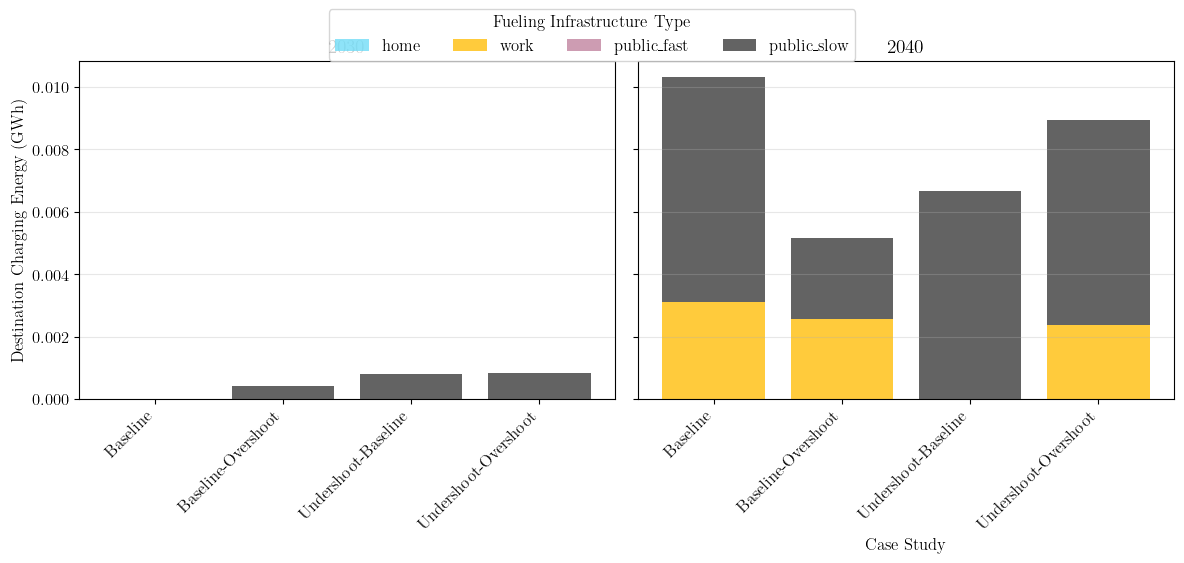

In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Plot energy_at_destination as a stacked bar plot with colors showing the fueling infrastructure type
# Sum across origins 12 and 13 (exclude 
# 
# origin differentiation)

# Get all unique case studies and years
case_studies = sorted(list(set(key[1] for key in energy_at_destination.keys())))
origins = [12, 13]  # Only ES211 and ES212
years_to_plot = [2030, 2040]  # Reduced to only 2030 and 2040

# Define colors for fueling infrastructure types
fueling_type_colors = {
    0: '#72DDF7',   # home
    1: '#FFBE0B',   # work
    2: '#C1839F',   # public_fast
    3: '#3C3C3C'    # public_slow
}

# Get fueling type names from l_dict
fueling_type_names = {
    0: l_dict[0]['fueling_type'] if 0 in l_dict else 'home',
    1: l_dict[1]['fueling_type'] if 1 in l_dict else 'work', 
    2: l_dict[2]['fueling_type'] if 2 in l_dict else 'public_fast',
    3: l_dict[3]['fueling_type'] if 3 in l_dict else 'public_slow'
}

# Create subplots: one for each year
fig, axes = plt.subplots(1, len(years_to_plot), figsize=(12, 6), sharey=True)

for year_idx, year in enumerate(years_to_plot):
    ax = axes[year_idx] if len(years_to_plot) > 1 else axes
    
    # Prepare data for this year (sum across origins)
    x_pos = np.arange(len(case_studies))
    bottom = np.zeros(len(case_studies))
    
    # Plot each fueling type as a layer in the stacked bar
    for fueling_type_id in [0, 1, 2, 3]:
        values = []
        for case_study in case_studies:
            # Sum energy across both origins for this case study, year, and fueling type
            total_energy = sum([
                energy_at_destination.get((year, case_study, origin, fueling_type_id), 0) 
                for origin in origins
            ]) * 1e-6  # Convert to GWh
            values.append(total_energy)
        
        ax.bar(x_pos, values, bottom=bottom, 
               label=fueling_type_names[fueling_type_id] if year_idx == 0 else "",
               color=fueling_type_colors[fueling_type_id], alpha=0.8)
        bottom += values
    
    # Customize subplot
    ax.set_title(f'{year}', fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(case_studies, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set labels
    if year_idx == len(years_to_plot) - 1:  # Last subplot
        ax.set_xlabel('Case Study')
    if year_idx == 0:  # First subplot
        ax.set_ylabel('Destination Charging Energy (GWh)')

# Add legend
handles, labels = axes[0].get_legend_handles_labels() if len(years_to_plot) > 1 else axes.get_legend_handles_labels()
fig.legend(handles, labels, title="Fueling Infrastructure Type", 
           loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


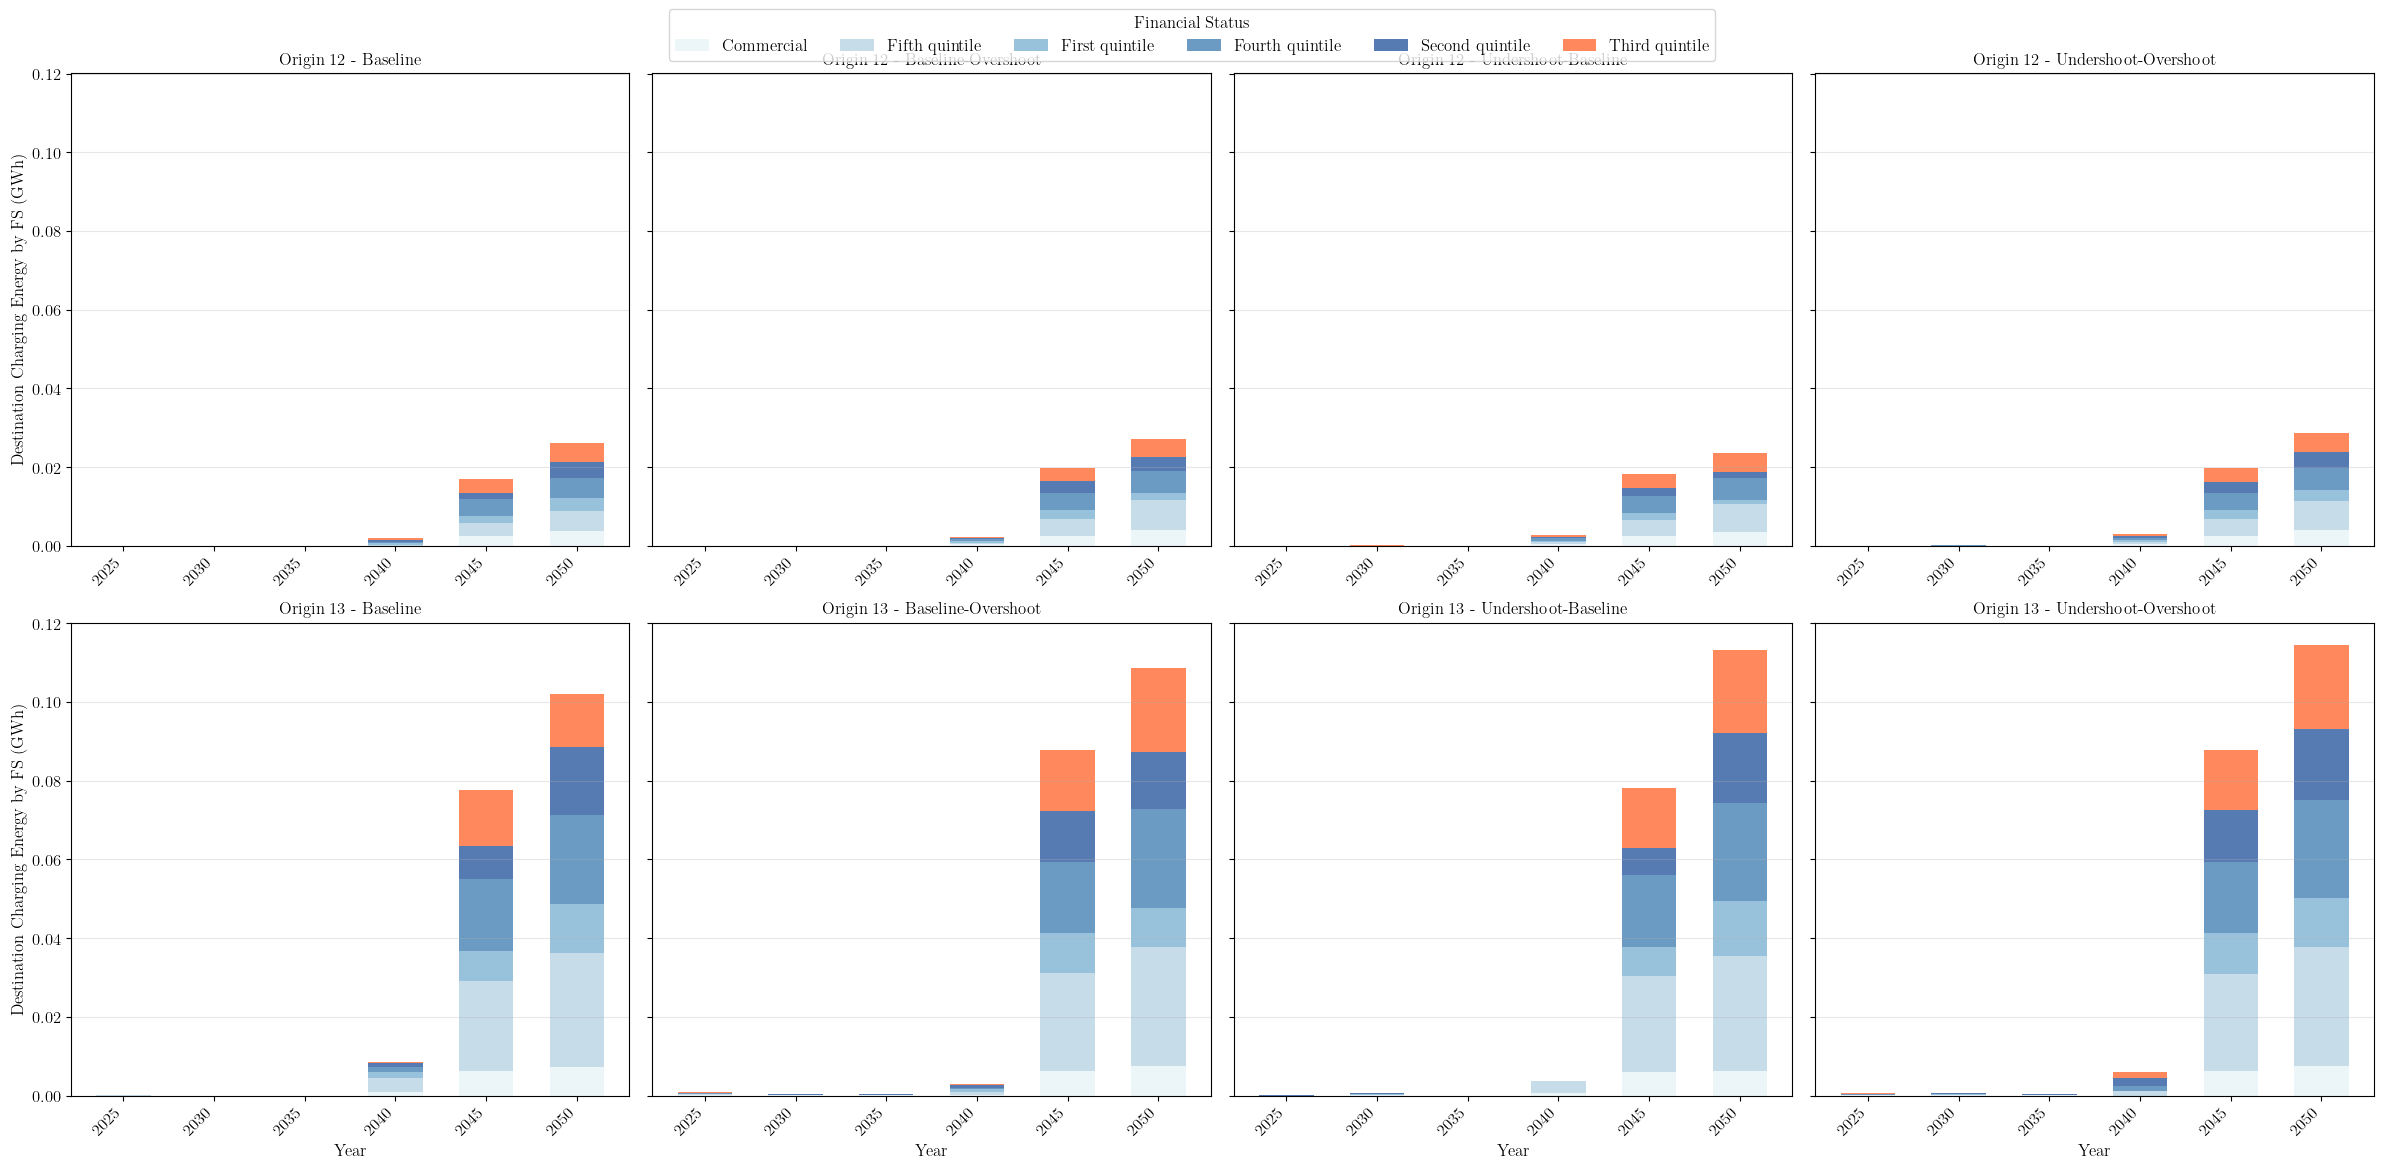

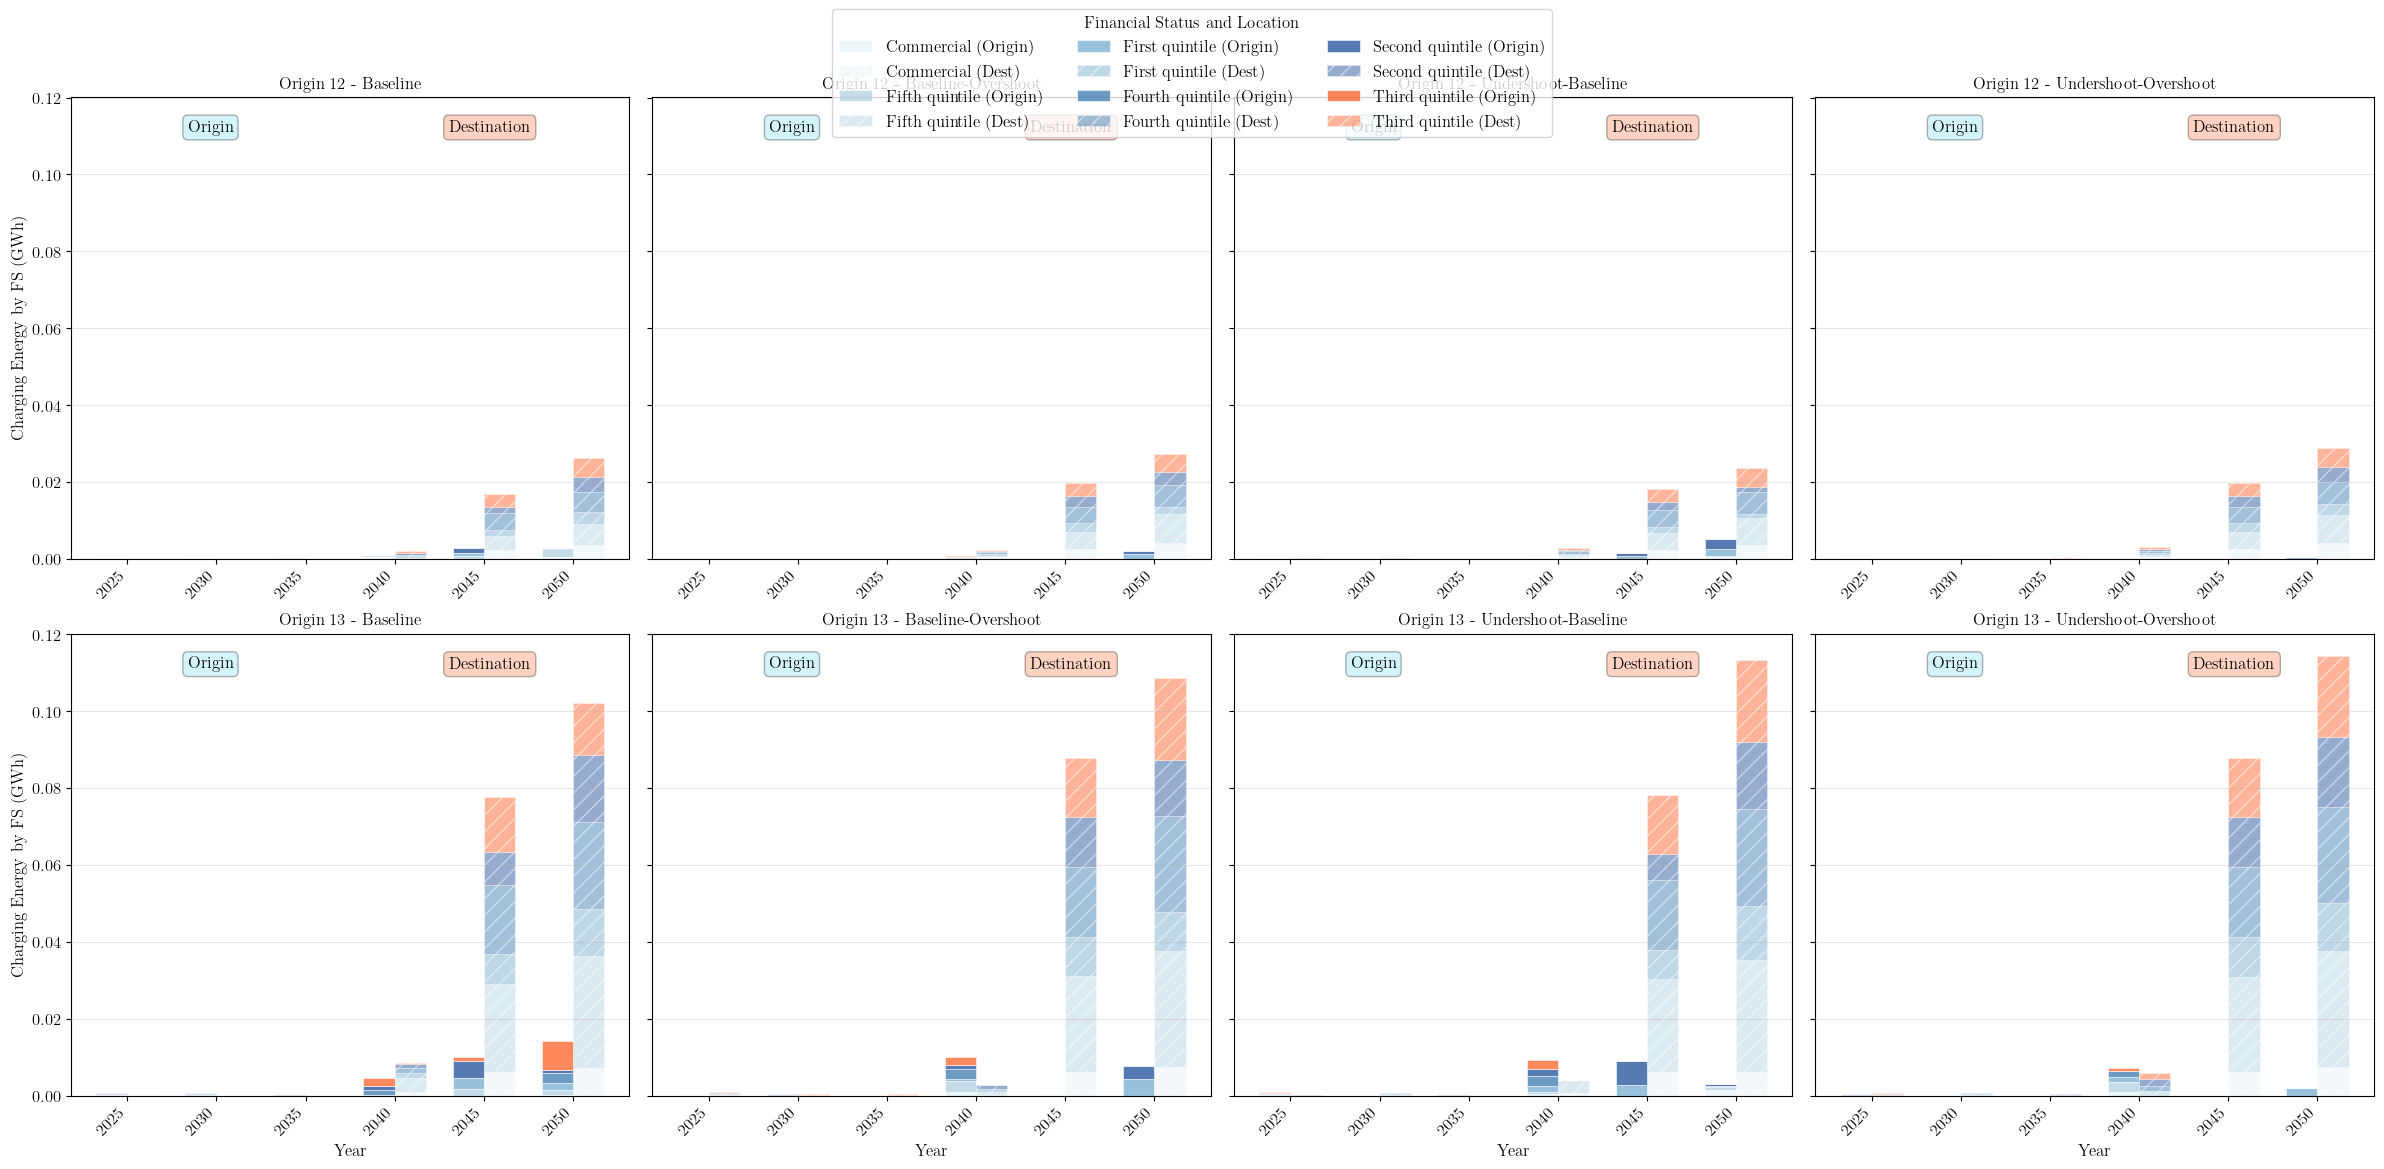

In [175]:
# Get all origins, case studies, and financial statuses
all_origins = [12, 13]  # Only display origins 12 and 13
case_studies = sorted(list(set(key[1] for key in energy_at_destination_fs.keys())))
fs_names = sorted(list(set(key[3] for key in energy_at_destination_fs.keys())))
years = sorted(list(set(key[0] for key in energy_at_destination_fs.keys())))

# Filter years to 5-year steps and limit to 2050
year_steps = [year for year in years if year % 5 == 0 and year <= 2050]

# Create subplots: rows = origins, columns = case studies
fig, axes = plt.subplots(len(all_origins), len(case_studies), figsize=(6 * len(case_studies), 6 * len(all_origins)), sharey=True)

# Colors for different financial statuses
fs_colors = ['#e8f4f8', '#b8d4e3', '#7fb3d3', '#4682b4', '#2c5aa0', '#FF6B35']  # Added extra color for Commercial

for row_idx, origin in enumerate(all_origins):
    for col_idx, case in enumerate(case_studies):
        if len(all_origins) == 1:
            ax = axes[col_idx]
        elif len(case_studies) == 1:
            ax = axes[row_idx]
        else:
            ax = axes[row_idx, col_idx]
        
        # Prepare data for this origin and case study
        bottom = np.zeros(len(year_steps))
        
        for fs_idx, fs in enumerate(fs_names):
            fs_data = []
            for year in year_steps:
                energy = energy_at_destination_fs.get((year, case, origin, fs), 0) * 1e-6  # Convert to GWh
                fs_data.append(energy)
            
            # Create stacked bar plot
            x_pos = np.arange(len(year_steps))
            width = 0.6
            
            bars = ax.bar(x_pos, fs_data, width, bottom=bottom, 
                         label=fs if row_idx == 0 and col_idx == 0 else "", 
                         color=fs_colors[fs_idx % len(fs_colors)], alpha=0.8)
            bottom += fs_data
        
        # Customize subplot
        ax.set_title(f'Origin {origin} - {case}', fontsize=12, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(year_steps, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Set labels only for edge subplots
        if row_idx == len(all_origins) - 1:  # Bottom row
            ax.set_xlabel('Year')
        if col_idx == 0:  # Left column
            ax.set_ylabel('Destination Charging Energy by FS (GWh)')

# Add legend to the figure
if len(all_origins) > 1 and len(case_studies) > 1:
    handles, labels = axes[0, 0].get_legend_handles_labels()
elif len(all_origins) == 1:
    handles, labels = axes[0].get_legend_handles_labels()
else:
    handles, labels = axes[0, 0].get_legend_handles_labels()

fig.legend(handles, labels, title="Financial Status", loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=len(fs_names))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Create a combined plot showing both origin and destination charging by financial status
fig, axes = plt.subplots(len(all_origins), len(case_studies), figsize=(6 * len(case_studies), 6 * len(all_origins)), sharey=True)

# Colors for origin and destination charging
charge_colors = ['#72DDF7', '#FF6B35']  # Blue for origin, Orange for destination

for row_idx, origin in enumerate(all_origins):
    for col_idx, case in enumerate(case_studies):
        if len(all_origins) == 1:
            ax = axes[col_idx]
        elif len(case_studies) == 1:
            ax = axes[row_idx]
        else:
            ax = axes[row_idx, col_idx]
        
        # Prepare data for origin and destination charging
        origin_bottom = np.zeros(len(year_steps))
        dest_bottom = np.zeros(len(year_steps))
        
        for fs_idx, fs in enumerate(fs_names):
            origin_data = []
            dest_data = []
            for year in year_steps:
                origin_energy = energy_at_origin_fs.get((year, case, origin, fs), 0) * 1e-6  # Convert to GWh
                dest_energy = energy_at_destination_fs.get((year, case, origin, fs), 0) * 1e-6  # Convert to GWh
                origin_data.append(origin_energy)
                dest_data.append(dest_energy)
            
            x_pos = np.arange(len(year_steps))
            width = 0.35
            
            # Origin charging bars (left side)
            bars_origin = ax.bar(x_pos - width/2, origin_data, width, bottom=origin_bottom, 
                               label=f'{fs} (Origin)' if row_idx == 0 and col_idx == 0 else "", 
                               color=fs_colors[fs_idx % len(fs_colors)], alpha=0.8, 
                               edgecolor='white', linewidth=0.5)
            origin_bottom += origin_data
            
            # Destination charging bars (right side)
            bars_dest = ax.bar(x_pos + width/2, dest_data, width, bottom=dest_bottom,
                             label=f'{fs} (Dest)' if row_idx == 0 and col_idx == 0 else "", 
                             color=fs_colors[fs_idx % len(fs_colors)], alpha=0.5, 
                             edgecolor='white', linewidth=0.5, hatch='//')
            dest_bottom += dest_data
        
        # Add text labels for origin vs destination
        ax.text(0.25, 0.95, 'Origin', transform=ax.transAxes, ha='center', va='top', 
                bbox=dict(boxstyle='round', facecolor='#72DDF7', alpha=0.3))
        ax.text(0.75, 0.95, 'Destination', transform=ax.transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='#FF6B35', alpha=0.3))
        
        # Customize subplot
        ax.set_title(f'Origin {origin} - {case}', fontsize=12, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(year_steps, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Set labels only for edge subplots
        if row_idx == len(all_origins) - 1:  # Bottom row
            ax.set_xlabel('Year')
        if col_idx == 0:  # Left column
            ax.set_ylabel('Charging Energy by FS (GWh)')

# Add legend to the figure
if len(all_origins) > 1 and len(case_studies) > 1:
    handles, labels = axes[0, 0].get_legend_handles_labels()
elif len(all_origins) == 1:
    handles, labels = axes[0].get_legend_handles_labels()
else:
    handles, labels = axes[0, 0].get_legend_handles_labels()

fig.legend(handles, labels, title="Financial Status and Location", loc='upper center', 
           bbox_to_anchor=(0.5, 0.98), ncol=min(len(fs_names), 3))

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [176]:
total_fueled_energy = 0
for v in fueled_energy_by_fs.values():
    if isinstance(v, dict):
        total_fueled_energy += sum(vv for vv in v.values() if isinstance(vv, (int, float)))
    elif isinstance(v, (int, float)):
        total_fueled_energy += v
print("Total fueled energy:", total_fueled_energy)

Total fueled energy: 104606375.62871596


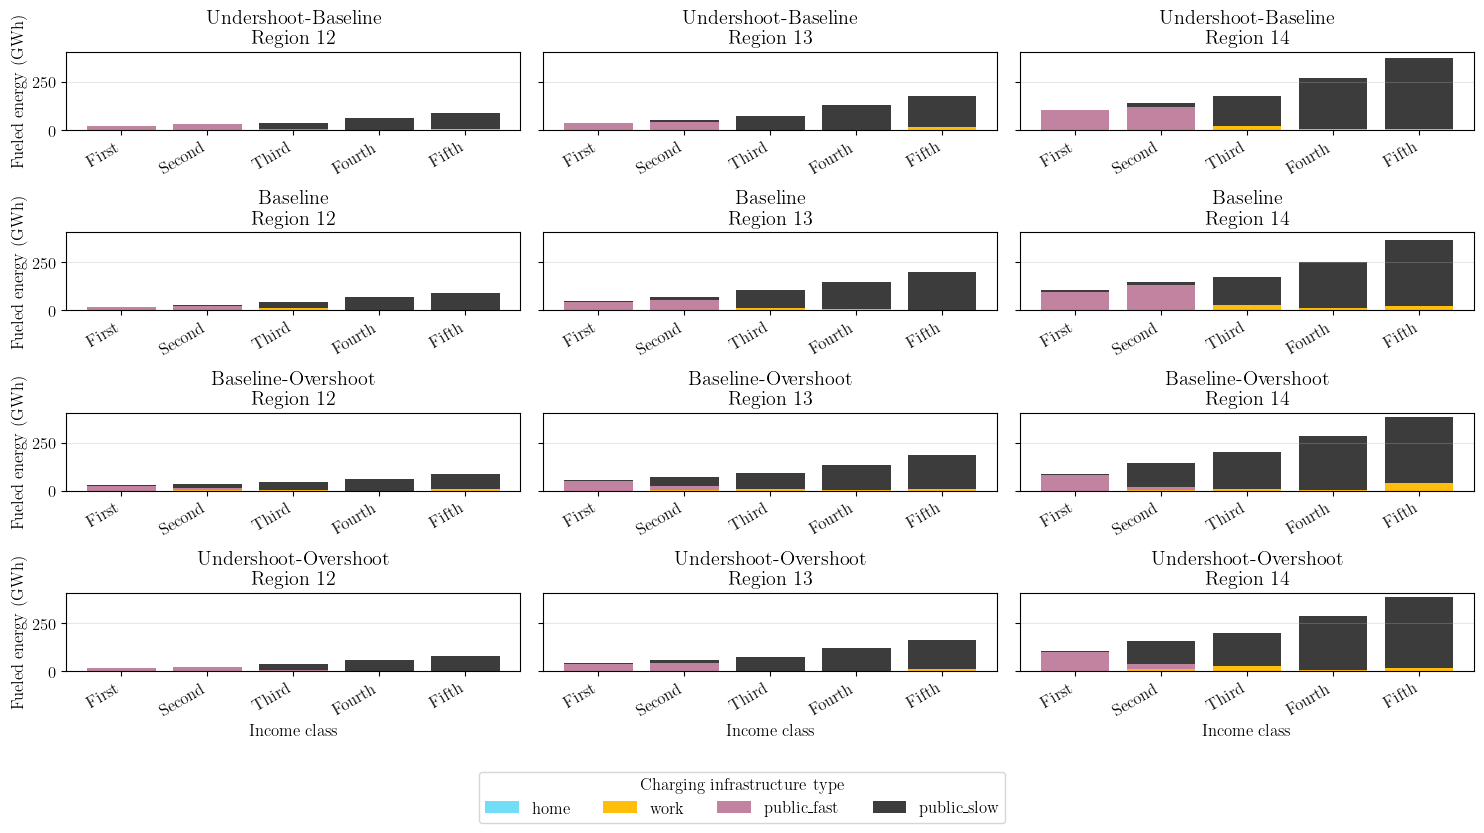

In [177]:
income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
years_to_plot = [2030, 2040, 2050]

# Get case studies and regions from the data structure
case_studies = set()
regions = [12, 13, 14]  # Using relevant_origins

# Extract case studies from the fueled_energy_by_fs keys
for key in fueled_energy_by_fs.keys():
    if len(key) >= 2:
        case_studies.add(key[1])  # case_study_name is the second element
        
case_studies = list(case_studies)

fig, axes = plt.subplots(
    len(case_studies),  # rows: case studies
    len(regions),       # columns: regions
    figsize=(15, 8),
    sharey=True
)

fueling_type_colors = {
    'home': '#72DDF7',
    'work': '#FFBE0B', 
    'public_fast': '#C1839F',
    'public_slow': '#3C3C3C'
}

# Get all fueling types from l_dict
fueling_type_ids = [0, 1, 2, 3]  # Based on your data structure

for row_idx, case in enumerate(case_studies):
    for col_idx, region in enumerate(regions):
        ax = axes[row_idx, col_idx] if len(case_studies) > 1 else axes[col_idx]
        
        # Aggregate data across all years for this case and region
        aggregated_values = {fs: {l_id: 0 for l_id in fueling_type_ids} for fs in income_classes}
        
        for year in years_to_plot:
            # The key structure is (year, case_study_name, fueling_type_id)
            for l_id in fueling_type_ids:
                key = (year, case, l_id)
                if key in fueled_energy_by_fs:
                    data_dict = fueled_energy_by_fs[key]
                    # Sum over all financial statuses and this specific region
                    for (fs, l, geo), value in data_dict.items():
                        if fs in income_classes and l == l_id and geo == region:
                            aggregated_values[fs][l_id] += value
        
        # Create stacked bar chart
        bottom = np.zeros(len(income_classes))
        for l_id in fueling_type_ids:
            if l_id in l_dict:  # Check if the fueling type exists
                values = [aggregated_values[fs][l_id] * 1e-3 for fs in income_classes]  # Convert to GWh
                fueling_type = l_dict[l_id]['fueling_type']
                ax.bar(
                    np.arange(len(income_classes)), values, bottom=bottom,
                    label=fueling_type if row_idx == 0 and col_idx == 0 else "",
                    color=fueling_type_colors.get(fueling_type, '#808080')
                )
                bottom += values
        
        ax.set_title(f"{case}\nRegion {region}")
        ax.set_xticks(np.arange(len(income_classes)))
        ax.set_xticklabels([cls.replace(' quintile', '') for cls in income_classes], rotation=30, ha='right')
        
        if col_idx == 0:
            ax.set_ylabel("Fueled energy (GWh)")
        if row_idx == len(case_studies) - 1:
            ax.set_xlabel("Income class")
        
        ax.grid(axis='y', alpha=0.3, zorder=-1)

# Add legend
if len(case_studies) > 1:
    handles, labels = axes[0, 0].get_legend_handles_labels()
else:
    handles, labels = axes[0].get_legend_handles_labels()

fig.legend(handles, labels, title="Charging infrastructure type", 
          bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=len(fueling_type_ids))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

3844.7674669999997 1.77
3876.3000089999996 1.77
3876.3000180000004 1.77
3093.4247130000003 1.77
3876.300004 1.77
0.0 5.673333333
1964.4074979999998 5.673333333
9464.574416 5.673333333
12424.600005 5.673333333
12424.600007000001 5.673333333
0.0 13.458824801999999
0.0 13.458824801999999
436.17706499999997 13.458824801999999
10122.146166999999 13.458824801999999
15859.07033 13.458824801999999
0.0 23.032518428
3058.6807609999996 23.032518428
13126.672841999996 23.032518428
26348.00457 23.032518428
50441.215356 23.032518428
28207.997827000007 23.032518428
42573.108885 23.032518428
50441.21535900001 23.032518428
44982.881491999986 23.032518428
41006.46158299999 23.032518428
39382.242870999995 23.032518428
39410.975612 23.032518428
39326.67667399999 23.032518428
39330.077458 23.032518428
37770.693192000006 23.032518428
50441.215354 23.032518428
50441.215354 23.032518428
50441.215354 23.032518428
47098.856396 23.032518428
40247.768101999995 23.032518428
27304.986695 32.565292262999996
7205.100

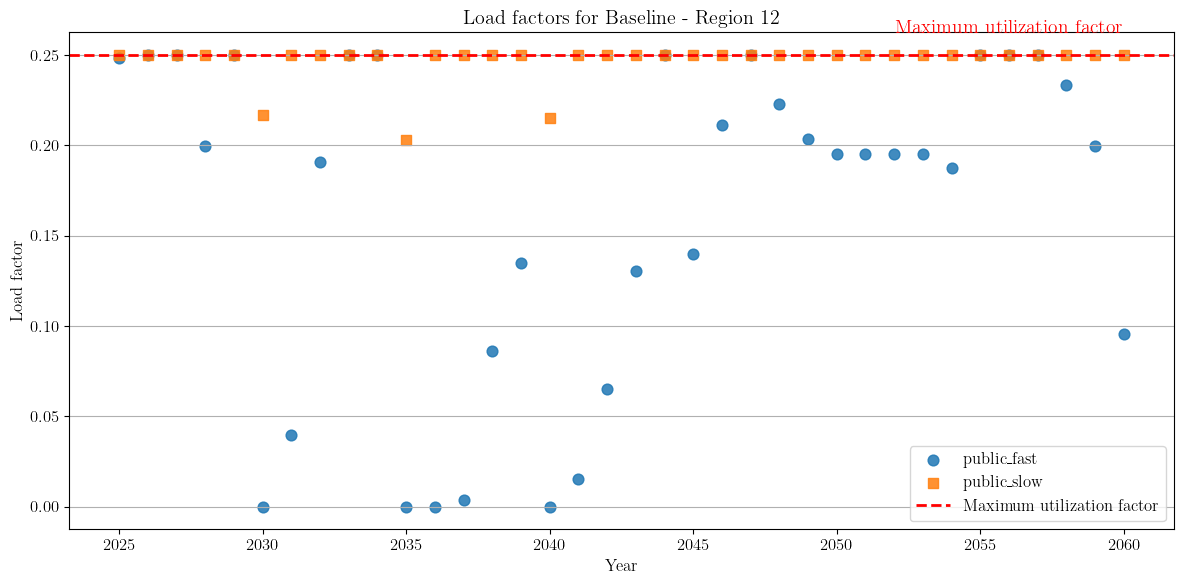

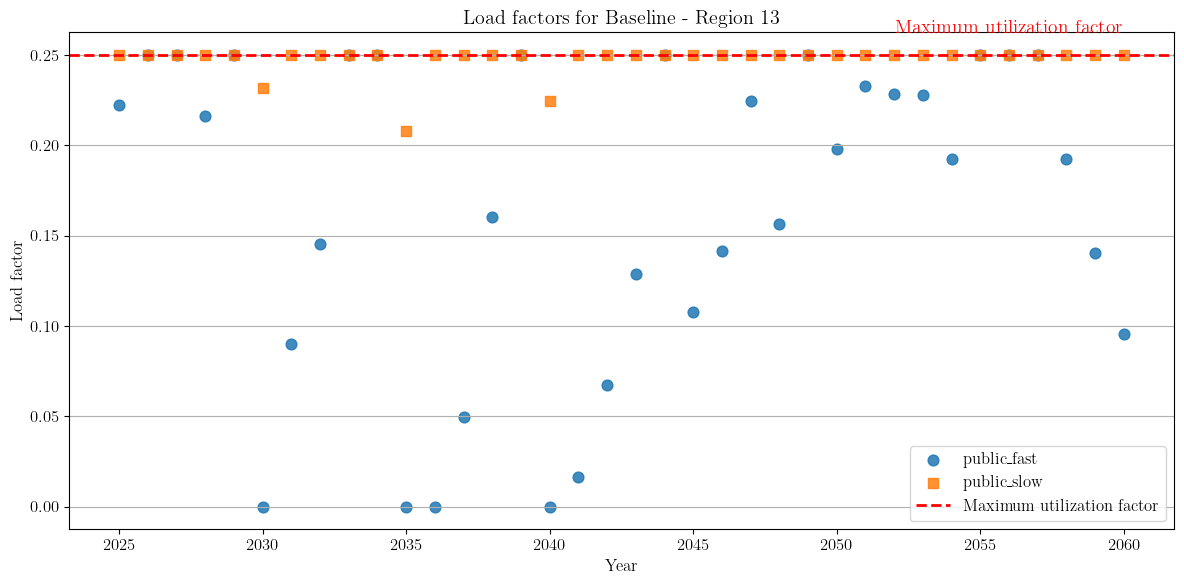

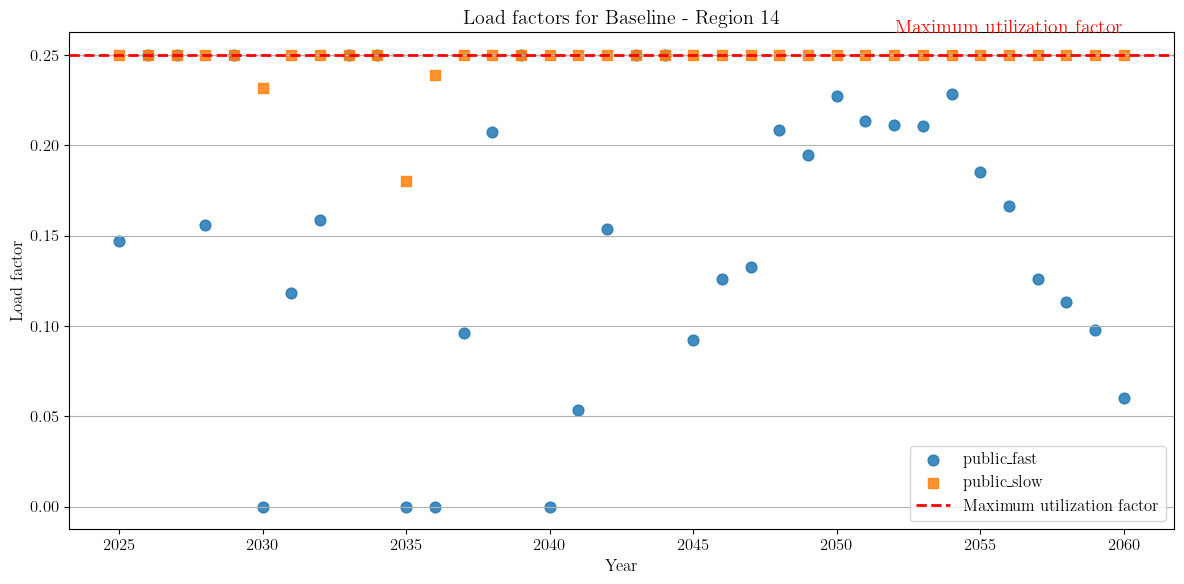

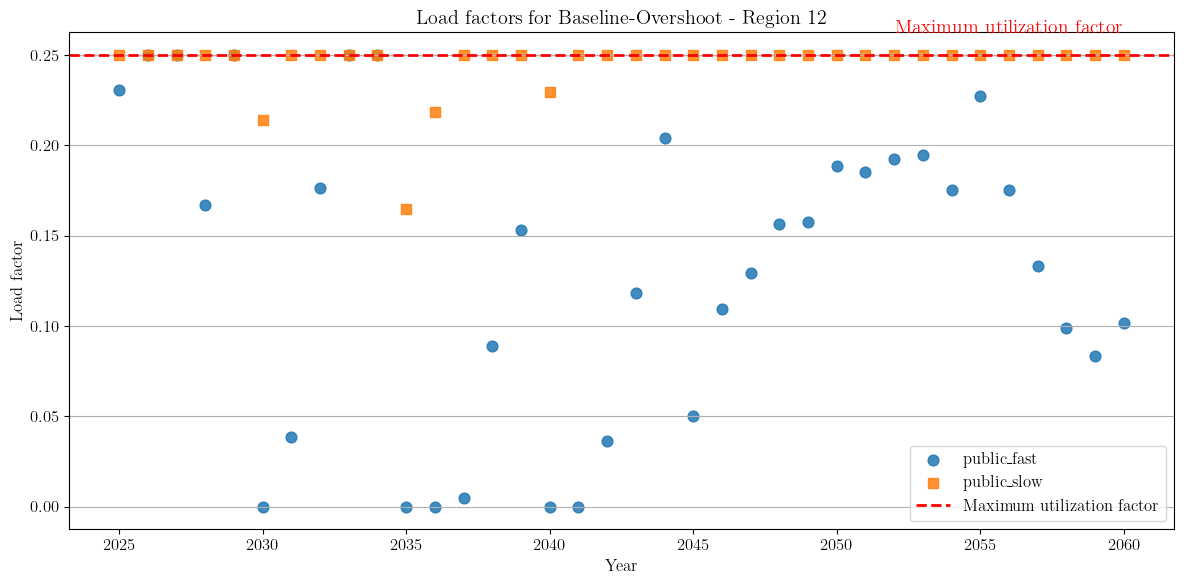

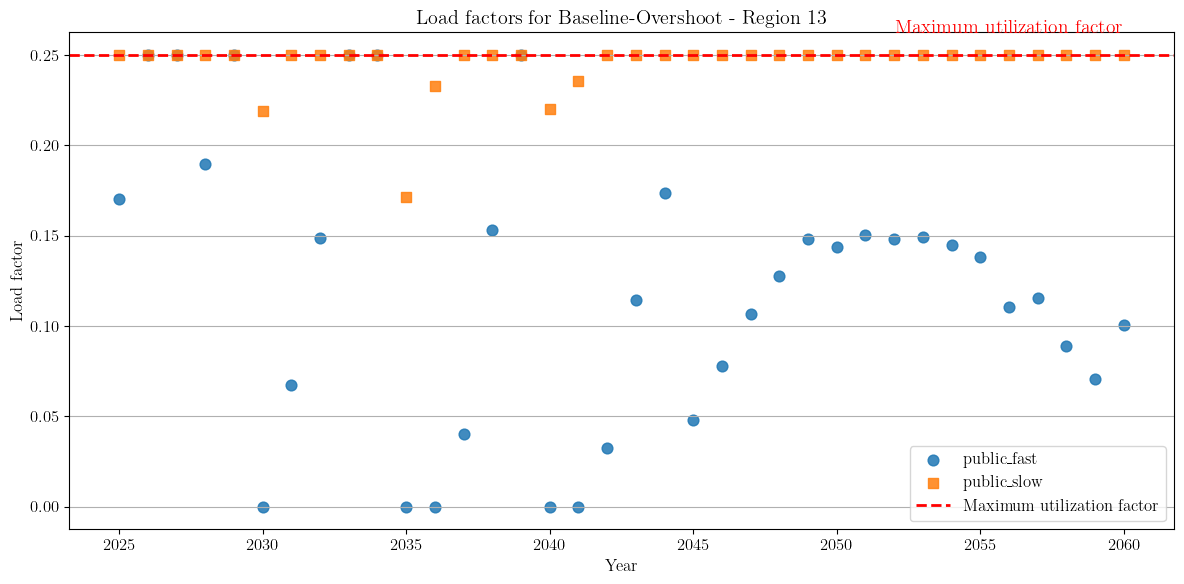

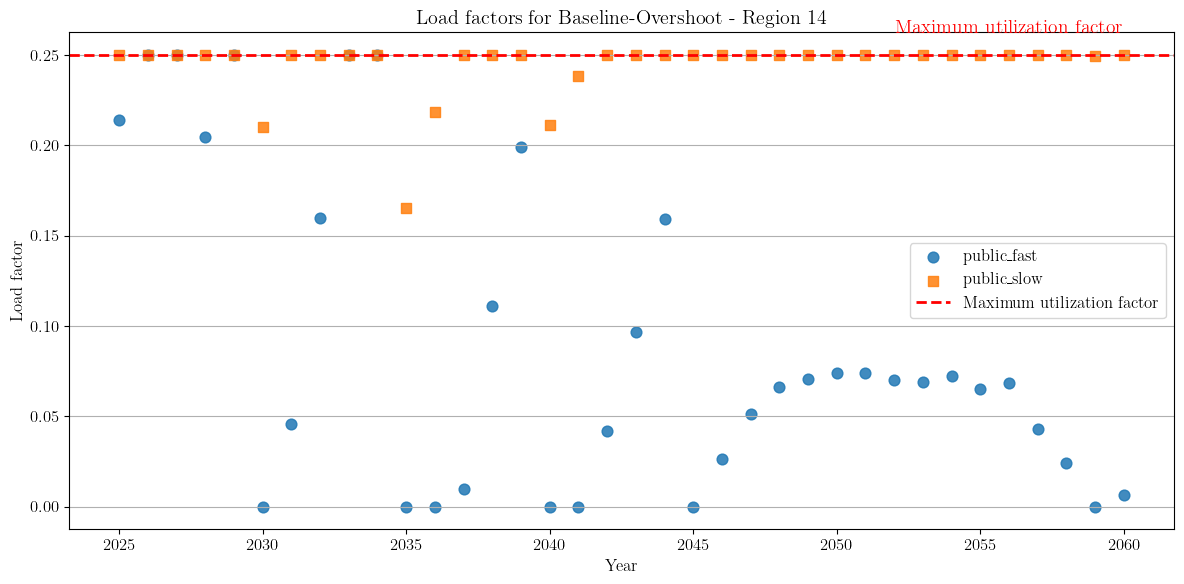

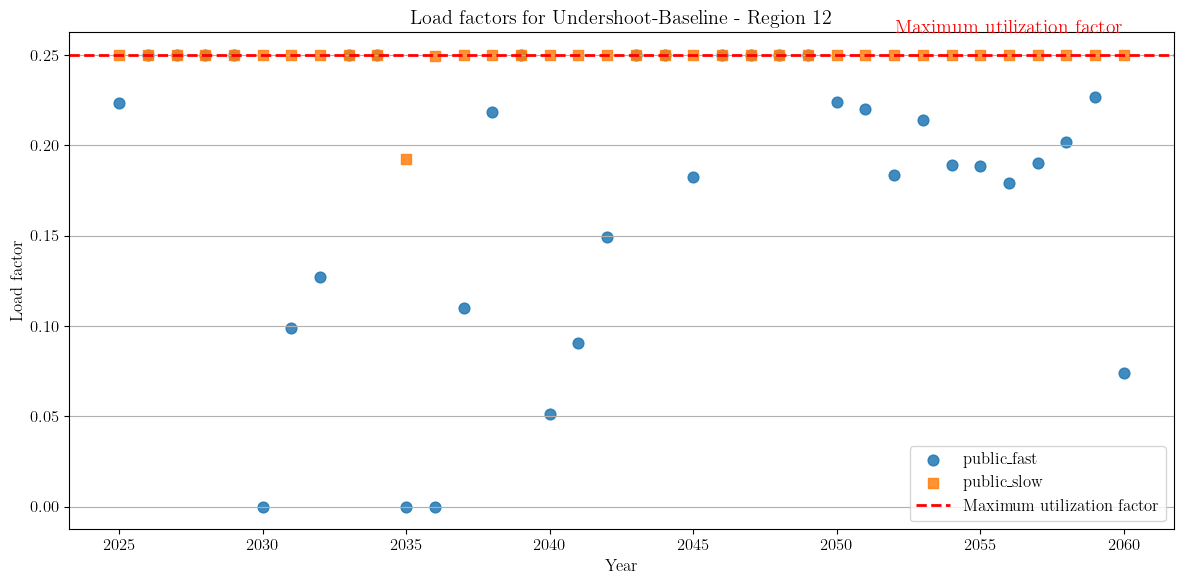

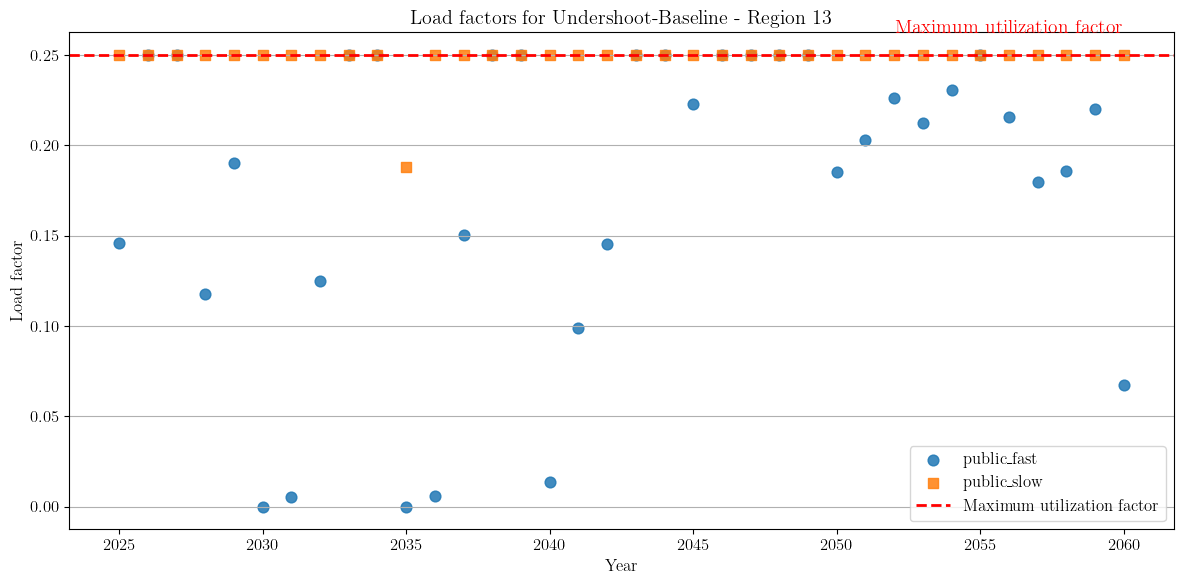

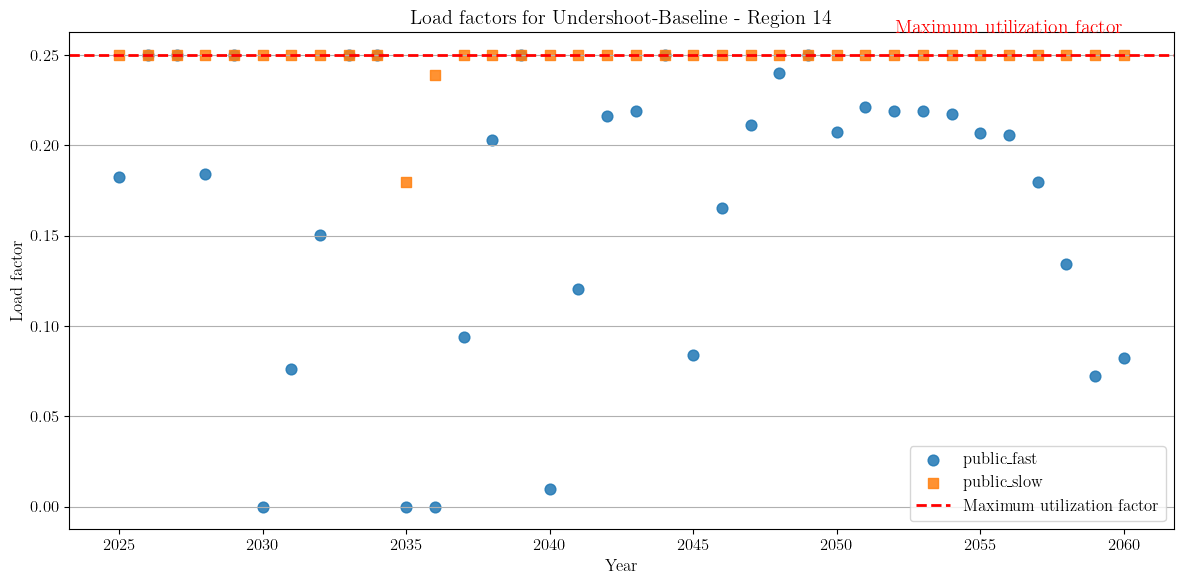

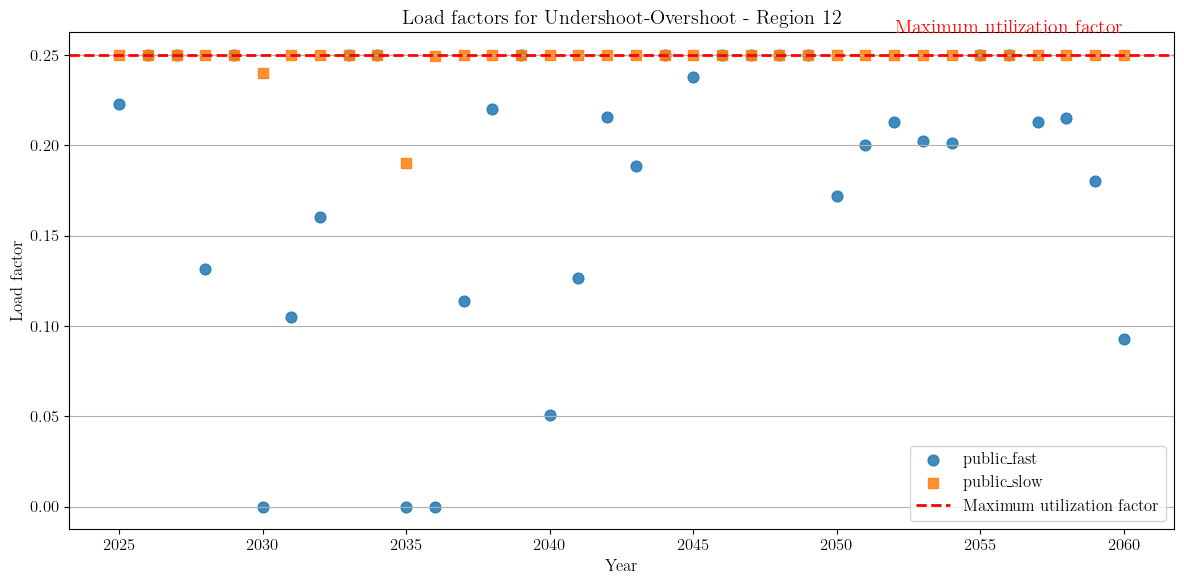

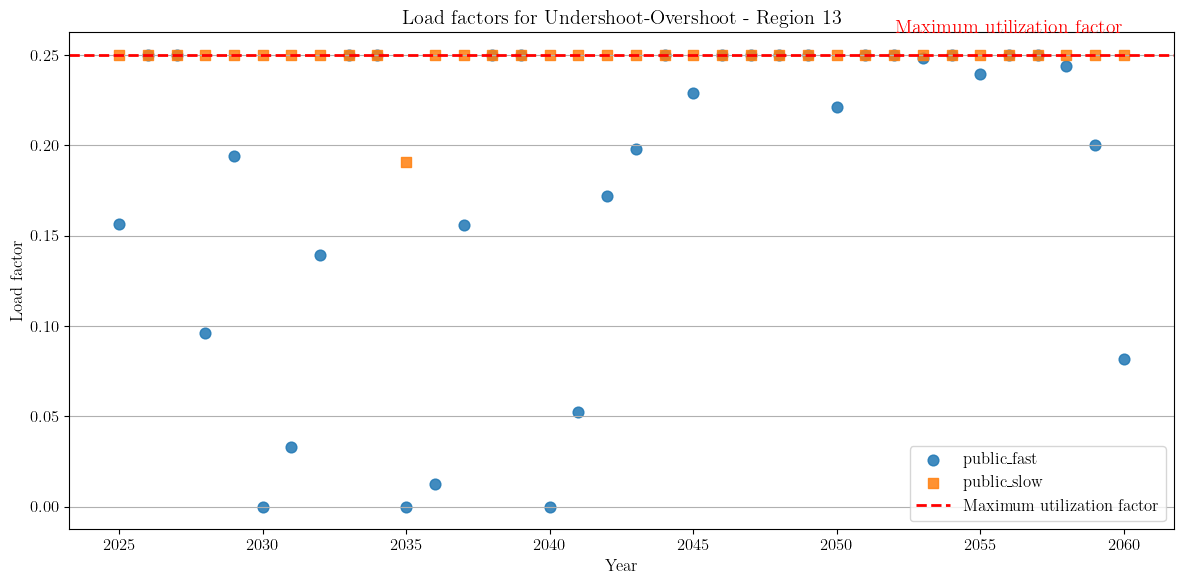

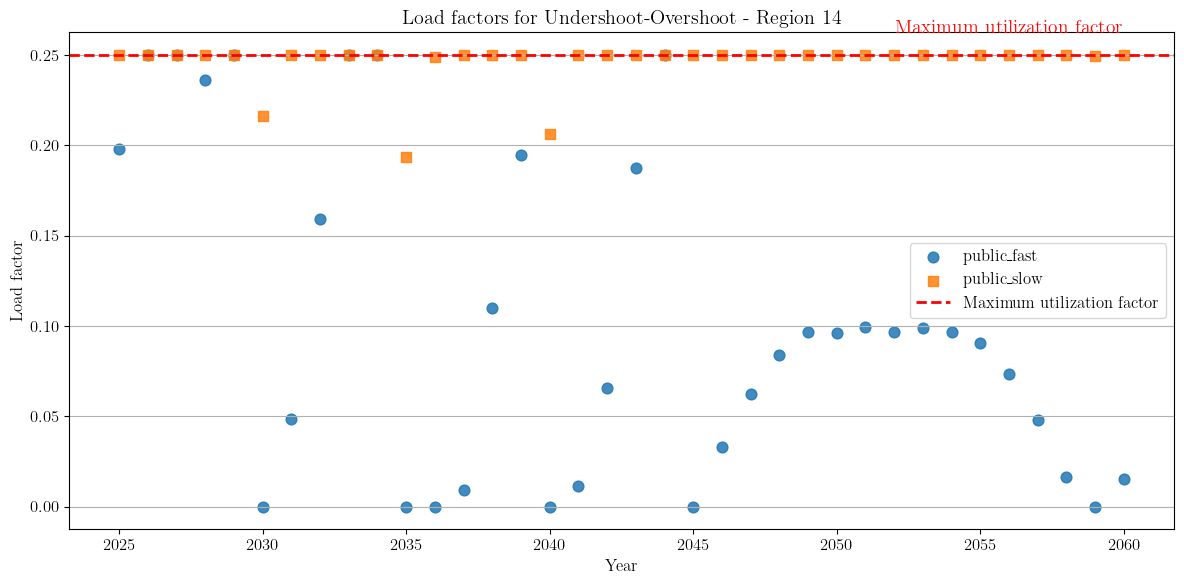

In [178]:
# Calculate load factors for public fast (id=2) and public slow (id=3) per year, case study, and region
region_ids = [12, 13, 14]
load_factors_by_region = {}

# Get fueled energy data from the existing fueled_energy_by_fs structure
for case_study in q_fuel_by_type_by_year_by_case_study.keys():
    load_factors_by_region[case_study] = {}
    for region in region_ids:
        load_factors_by_region[case_study][region] = {}
        for l_id in [2, 3]:  # 2: public_fast, 3: public_slow
            lf_per_year = {}
            for year in years:
                # Get fueled energy for this case study, year, region, and fueling type
                # Sum across all financial statuses for this region and fueling type
                energy = 0
                # fueled_energy_by_fs is keyed by (year, case_study, l_id)
                # Each value is a dict: (fs, l, geo) -> energy
                data_dict = fueled_energy_by_fs.get((year, case_study, l_id), {})
                for (fs, l, geo), value in data_dict.items():
                    if geo == region and l == l_id:
                        energy += value

                energy = energy  # Convert to MWh (assuming original is in Wh)
                
                # installed capacity in kW, convert to MW
                capacity = q_fuel_by_type_by_year_by_case_study[case_study][region].get(l_id, {}).get(year, 0) / 1e3  # MW
                print(energy, capacity )
                # hours per year
                hours = 8760
                # load factor: actual energy delivered / (installed capacity * hours)
                lf = energy / (capacity * hours) if capacity > 0 else 0
                lf_per_year[year] = lf
            load_factors_by_region[case_study][region][l_id] = lf_per_year
print(load_factors_by_region)
# Plot: one plot per case study + region combination
for case_study in load_factors_by_region:
    for region in region_ids:
        fig, ax = plt.subplots(figsize=(12, 6))
        for l_id, label, marker in zip([2, 3], ["public_fast", "public_slow"], ["o", "s"]):
            lf_values = [load_factors_by_region[case_study][region][l_id][year] for year in years]
            ax.scatter(
                years, lf_values,
                label=f"{label}",
                marker=marker,
                s=60,
                alpha=0.85
            )
        ax.set_xlabel("Year")
        ax.set_ylabel("Load factor")
        ax.set_title(f"Load factors for {case_study} - Region {region}")
        ax.axhline(0.25, color='red', linestyle='--', linewidth=2, label="Maximum utilization factor")
        ax.text(years[-1], 0.26, "Maximum utilization factor", color='red', fontsize=14, ha='right', va='bottom')
        ax.legend()
        ax.grid(True, axis='y', zorder=-1)
        plt.tight_layout()
        plt.show()


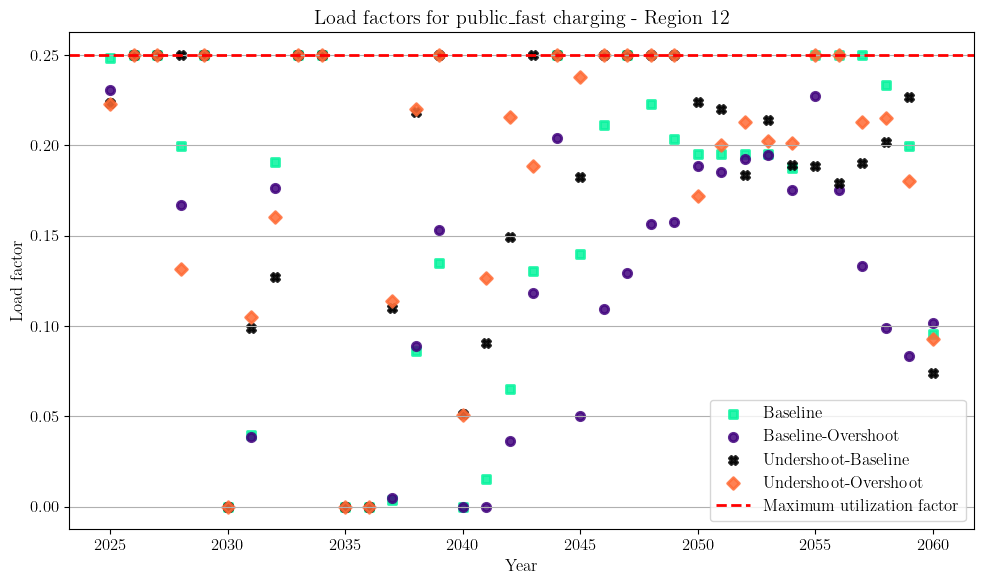

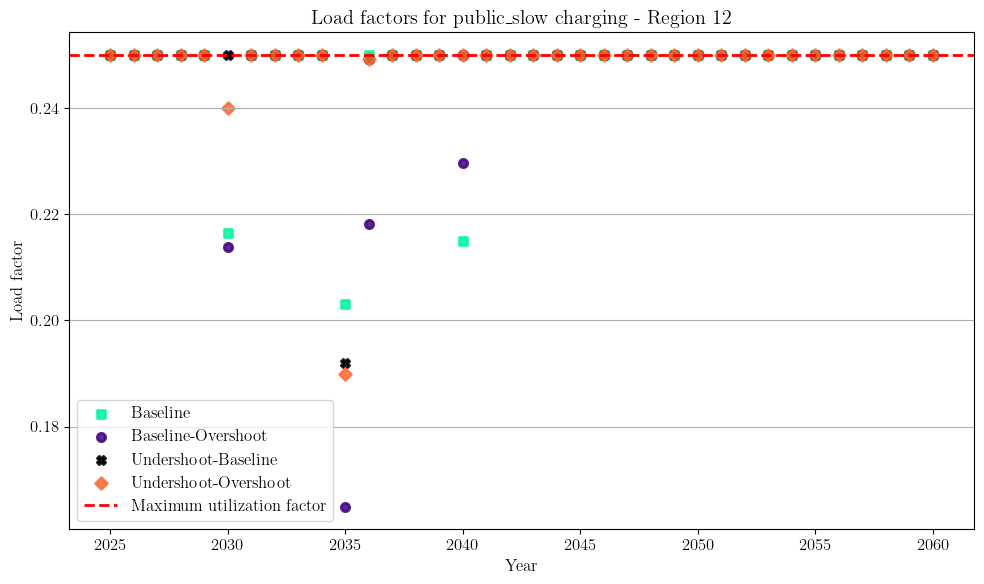

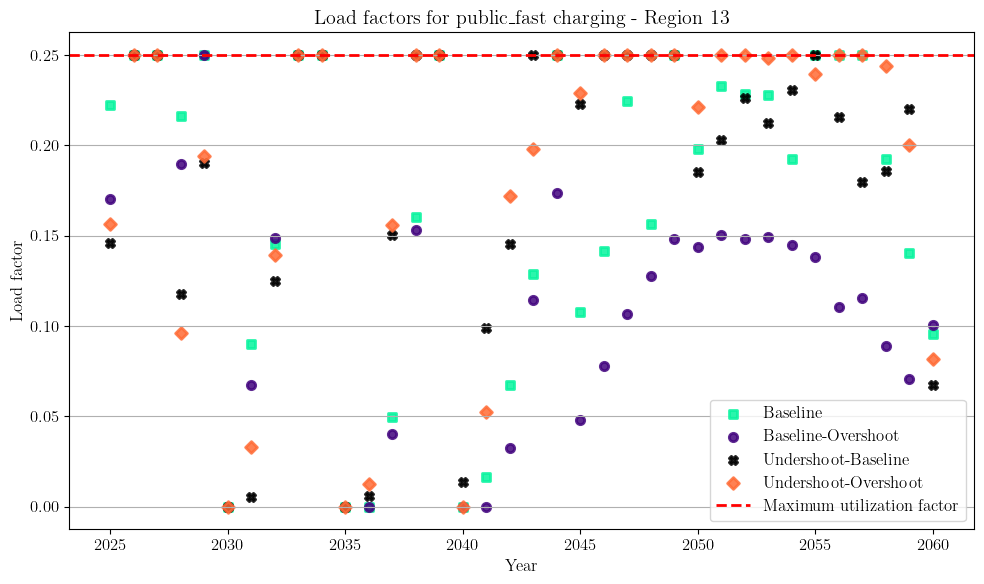

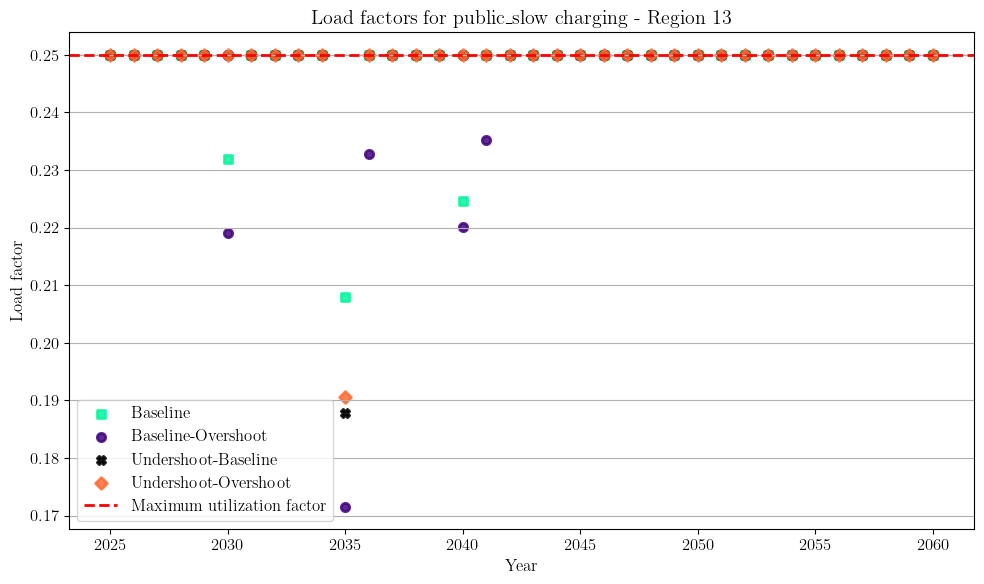

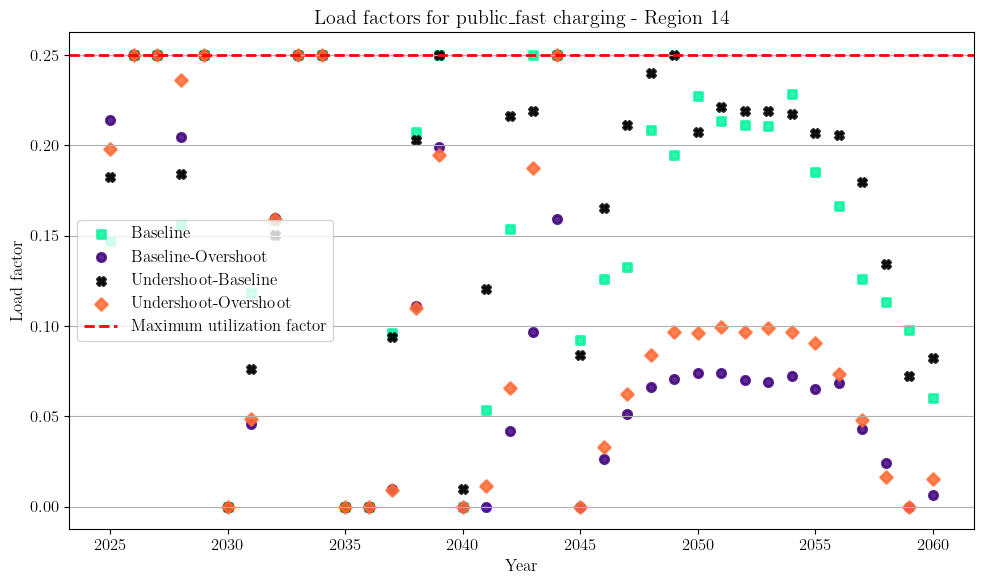

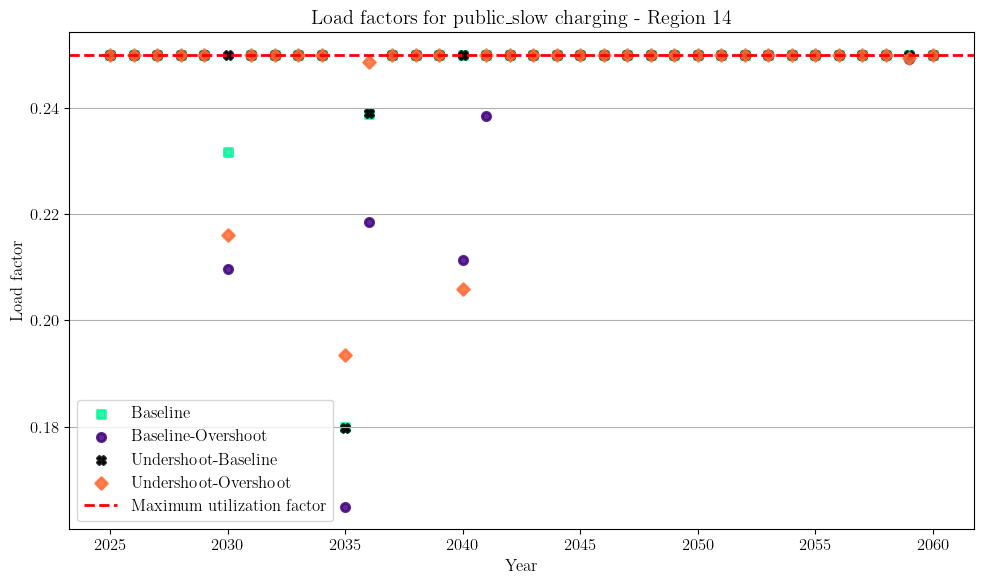

In [179]:
region_ids = [12, 13, 14]
fueling_type_labels = {2: "public_fast", 3: "public_slow"}
markers = {"Baseline-Overshoot": "o", "Baseline": "s", "Undershoot-Overshoot": "D", "Undershoot-Baseline": "X"}
case_colors = {
    "Baseline-Overshoot": "#42047e",
    "Baseline": "#07f49e",
    "Undershoot-Overshoot": "#ff6b35",
}

for region in region_ids:
    for l_id in [2, 3]:  # 2: public_fast, 3: public_slow
        plt.figure(figsize=(10, 6))
        for case_study in load_factors_by_region:
            lf_values = [load_factors_by_region[case_study][region][l_id][year] for year in years]
            plt.scatter(
                years, lf_values,
                label=case_study,
                marker=markers[case_study],
                color=case_colors.get(case_study, "#000000"),
                linewidth=2,
                alpha=0.85
            )
        plt.axhline(0.25, color='red', linestyle='--', linewidth=2, label="Maximum utilization factor")
        plt.xlabel("Year")
        plt.ylabel("Load factor")
        plt.title(f"Load factors for {fueling_type_labels[l_id]} charging - Region {region}")
        plt.legend()
        plt.grid(True, axis='y', zorder=-1)
        plt.tight_layout()
        plt.show()


<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\157313455.py:39: SyntaxWarning: invalid escape sequence '\d'
  '$\downarrow$', xy=(inv_year, 0.29), xytext=(inv_year, 0.26),
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\157313455.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


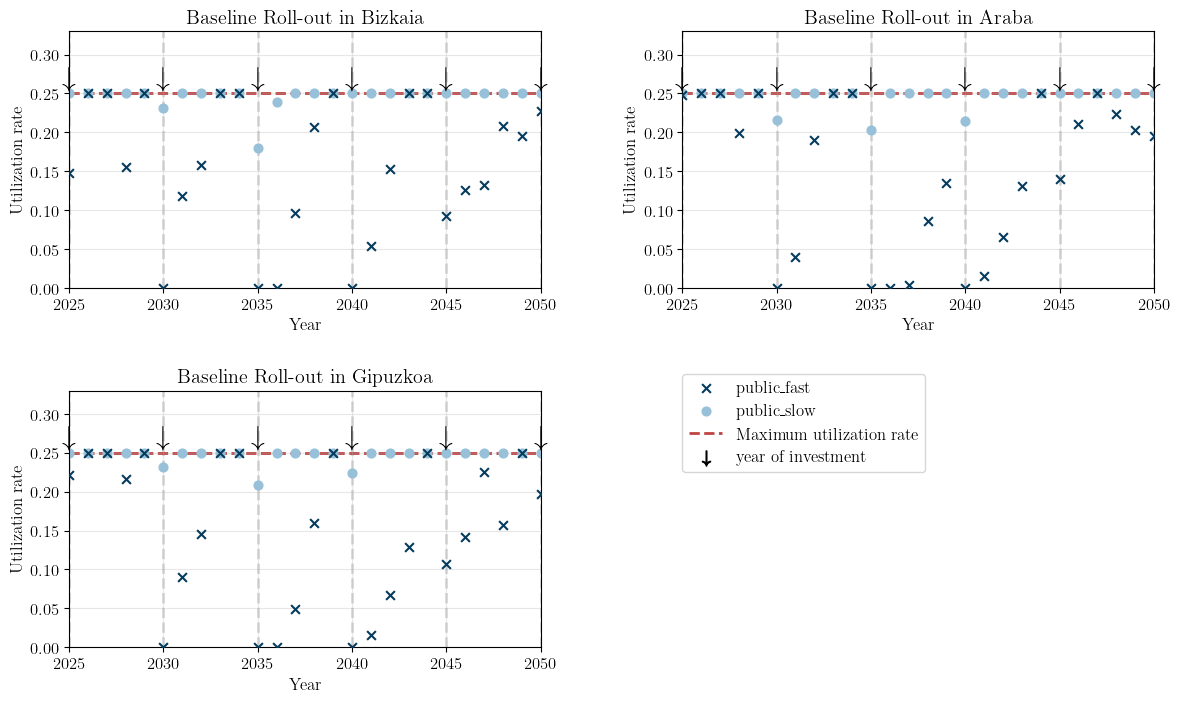

In [180]:
import matplotlib.pyplot as plt

# Define regions and labels for charging types
regions = [14, 12, 13]
charging_types = {2: "public_fast", 3: "public_slow"}
colors = {2: "#1f77b4", 3: "#ff7f0e"}  # Colors for charging types
region_labels = {12: "Araba", 13: "Gipuzkoa", 14: "Bizkaia"}
# Extract load factors for "Baseline"
baseline_load_factors = load_factors_by_region.get("Baseline", {})
colors_for_utilization_factors = {
    3: '#98c1d9',
    2: '#053c5e',
}
markers = {2: 'x', 3: 'o'}
zorders = {2: 3, 3: 2}

# Create a figure with 3 subplots in 2 rows
fig, axes = plt.subplots(2, 2, figsize=(14, 8), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot load factors for each region
for idx, region in enumerate(regions):
    ax = axes[idx]
    for charging_type, label in charging_types.items():
        if region in baseline_load_factors and charging_type in baseline_load_factors[region]:
            lf_values = [baseline_load_factors[region][charging_type][year] for year in years]
            ax.scatter(
                years, lf_values,
                label=f"{label}",
                color=colors_for_utilization_factors[charging_type],
                s=40,  # Marker size
                marker=markers[charging_type], alpha=1, zorder=zorders[charging_type]
            )
    for inv_year in range(2025, years[-1] + 1, 5):
        ax.axvline(inv_year, color='grey', linestyle='--', alpha=0.3, linewidth=2, zorder=1)
        ax.annotate(
            '$\downarrow$', xy=(inv_year, 0.29), xytext=(inv_year, 0.26),
            ha='center', fontsize=20, zorder=3
        )
    # Add plot details
    ax.axhline(0.25, color='#bf4342', linestyle='--', linewidth=2, label="Maximum utilization rate", zorder=1, alpha=1)
    ax.set_xlabel("Year")
    ax.set_ylim(0, 0.33)
    ax.set_xlim(2025, 2050)
    ax.set_ylabel("Utilization rate")
    ax.set_title(f"Baseline Roll-out in {region_labels[region]}")
    ax.grid(True, alpha=0.3)

    ax.scatter([], [], marker=r'$\downarrow$', color='black', s=120, label='year of investment')  # dummy for legend

# Hide the last subplot and use it for the legend
axes[-1].axis('off')
handles, labels = axes[0].get_legend_handles_labels()

fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.65, 0.39))

plt.tight_layout()
plt.savefig("rq_2_baseline_utilization_rate.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [181]:
for case_study, geo_data in q_fuel_by_type_by_year_by_case_study.items():
    # Find IDs for public_fast and public_slow
    public_fast_id = None
    public_slow_id = None
    for l_id, l_info in l_dict.items():
        if l_info['fueling_type'] == 'public_fast':
            public_fast_id = l_id
        if l_info['fueling_type'] == 'public_slow':
            public_slow_id = l_id

    target_years = [2030, 2040]
    if 14 in geo_data:
        # public_fast
        if public_fast_id is not None:
            values_fast = geo_data[14].get(public_fast_id, {})
            print(f"Case study: {case_study}")
            print(f"Values for geo == 14, public_fast (id={public_fast_id}) for years 2030 and 2040:")
            for year in target_years:
                print(f"Year: {year}, Value: {values_fast.get(year, 0)}")
        else:
            print(f"Case study: {case_study} - No data found for geo == 14 and public_fast.")

        # public_slow
        if public_slow_id is not None:
            values_slow = geo_data[14].get(public_slow_id, {})
            print(f"Values for geo == 14, public_slow (id={public_slow_id}) for years 2030 and 2040:")
            for year in target_years:
                print(f"Year: {year}, Value: {values_slow.get(year, 0)}")
        else:
            print(f"Case study: {case_study} - No data found for geo == 14 and public_slow.")
    else:
        print(f"Case study: {case_study} - No data found for geo == 14.")

Case study: Baseline
Values for geo == 14, public_fast (id=2) for years 2030 and 2040:
Year: 2030, Value: 13050.0
Year: 2040, Value: 65294.879576
Values for geo == 14, public_slow (id=3) for years 2030 and 2040:
Year: 2030, Value: 25050.0
Year: 2040, Value: 129539.759152
Case study: Baseline-Overshoot
Values for geo == 14, public_fast (id=2) for years 2030 and 2040:
Year: 2030, Value: 16860.0
Year: 2040, Value: 86831.425353
Values for geo == 14, public_slow (id=3) for years 2030 and 2040:
Year: 2030, Value: 32670.0
Year: 2040, Value: 172612.850705
Case study: Undershoot-Baseline
Values for geo == 14, public_fast (id=2) for years 2030 and 2040:
Year: 2030, Value: 13050.0
Year: 2040, Value: 72138.48592199999
Values for geo == 14, public_slow (id=3) for years 2030 and 2040:
Year: 2030, Value: 25050.0
Year: 2040, Value: 143226.97184399999
Case study: Undershoot-Overshoot
Values for geo == 14, public_fast (id=2) for years 2030 and 2040:
Year: 2030, Value: 16860.0
Year: 2040, Value: 86831.42

## Figure 2.1: Comparison of development of BEVs

for ES211 and ES212 ->  
-> I need h
number BEVs development 



In [182]:
# reading s for an isolated year 
years = [2030, 2040]
origin_versus_destination_charging = {}
for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]
    s = output_data["s"]
    odpair_list = input_data["Odpair"]
    odpair_list_dict = {item["id"]: item for item in odpair_list}

    techvehicle_list = input_data["TechVehicle"]
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    fueling_infrastructure_list = input_data["FuelingInfrTypes"]
    fueling_infrastructure_list_dict = {item["id"]: item for item in fueling_infrastructure_list}
    fuel_list = input_data["Fuel"]
    fuel_list_dict = {item["id"]: item for item in fuel_list}
    
    fueled_energy_origin = {}
    fueled_energy_destination = {}
    for year in years:
        fueled_energy_destination[year] = 0
        fueled_energy_origin[year] = 0

        for r in odpair_list_dict.keys():
            if odpair_list_dict[r]["from"] in relevant_origins:
                if odpair_list_dict[r]["from"] != odpair_list_dict[r]["to"]:
                    if odpair_list_dict[r]["to"] == 14:
                        s_origin = sum([
                            s.get((year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g), 0)
                            for f in fuel_list_dict.keys()
                            for l in fueling_infrastructure_list_dict.keys()
                            for g in range(g_init, year + 1)
                            for geo in [12, 13]
                            for tv in techvehicle_list_dict.keys()
                            if f == 2
                        ])

                        fueled_energy_origin[year] = s_origin + fueled_energy_origin[year]
                        s_destination = sum([
                            s.get((year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g), 0)
                            for f in fuel_list_dict.keys()
                            for l in fueling_infrastructure_list_dict.keys()
                            for g in range(g_init, year + 1)
                            for geo in [14]
                            for tv in techvehicle_list_dict.keys()
                            if f == 2
                        ])
                        fueled_energy_destination[year] = s_destination + fueled_energy_destination[year]

        origin_versus_destination_charging[case_study_name] = {
            "origin": fueled_energy_origin,
            "destination": fueled_energy_destination
        }

print(origin_versus_destination_charging)


    

{'Baseline': {'origin': {2030: 834.8513909999997, 2040: 5675.897502}, 'destination': {2030: 0.0, 2040: 10317.020602}}, 'Baseline-Overshoot': {'origin': {2030: 428.8836090000001, 2040: 10910.676679999999}, 'destination': {2030: 405.96778200000006, 2040: 5161.980303000002}}, 'Undershoot-Baseline': {'origin': {2030: 48.053421, 2040: 9340.785455}, 'destination': {2030: 786.7979699999999, 2040: 6652.132649}}, 'Undershoot-Overshoot': {'origin': {2030: 0.0, 2040: 7053.879224}, 'destination': {2030: 834.8513909999997, 2040: 8939.038878999996}}}


In [183]:
for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]
    s = output_data["s"]
    odpair_list = input_data["Odpair"]
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    for r in odpair_list_dict.keys():
        if odpair_list_dict[r]["from"] != odpair_list_dict[r]["to"]:
            print(r, odpair_list_dict[r]["from"], odpair_list_dict[r]["to"], odpair_list_dict[r]["F"][0])

22 13 12 76520.5987
23 13 12 96166.6222
24 13 12 113036.726
25 13 12 133449.4515
26 13 12 180858.7616
27 13 12 61227.2081
28 13 12 76946.7815
29 13 12 90445.23
30 13 12 106778.2724
31 13 12 144712.368
32 13 12 99827.52
33 13 12 5266.73
34 13 12 6618.9188
35 13 12 7780.0478
36 13 12 9185.0069
37 13 12 12448.0765
60 12 13 27941.5676
61 12 13 35115.3313
62 12 13 41275.4654
63 12 13 48729.191
64 12 13 66040.7446
65 12 13 25195.6048
66 12 13 31664.3655
67 12 13 37219.1112
68 12 13 43940.3206
69 12 13 59550.578
70 12 13 58306.44
71 12 13 845.3925
72 12 13 1062.44
73 12 13 1248.8193
74 12 13 1474.3372
75 12 13 1998.1109
76 14 13 353717.3196
77 14 13 444531.2816
78 14 13 522513.5245
79 14 13 616871.5751
80 14 13 836021.6392
81 14 12 323376.5237
82 14 12 406400.7401
83 14 12 477693.9034
84 14 12 563958.2074
85 14 12 764310.2454
86 14 12 296554.5378
87 14 12 372692.4338
88 14 12 438072.2914
89 14 12 517181.5307
90 14 12 700915.6663
91 14 13 291733.1108
92 14 13 366633.1458
93 14 13 430950.0482
9

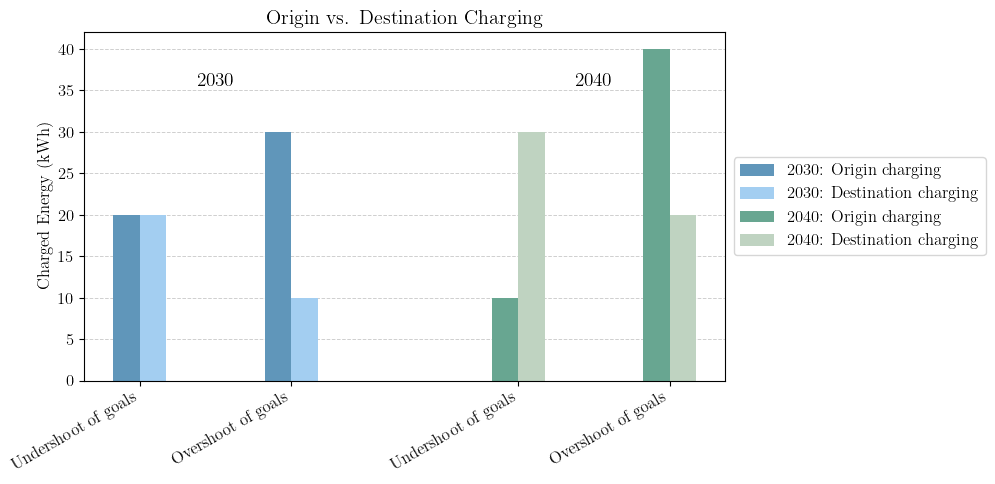

In [184]:
import matplotlib.pyplot as plt
origin_versus_destination_charging = {'Undershoot of goals': {'origin': {2030: 20, 2040: 10}, 'destination': {2030: 20, 2040: 30}}, 
                                      "Overshoot of goals": {'origin': {2030: 30, 2040: 40}, 'destination': {2030: 10, 2040: 20}}}

# Use the real origin_versus_destination_charging dict and years list
case_names = list(origin_versus_destination_charging.keys())
years = [2030, 2040]

# Prepare data for grouped bar plot with years grouped together
origin_data = []
destination_data = []
for case in case_names:
    origin_data.append([origin_versus_destination_charging[case]['origin'][y] for y in years])
    destination_data.append([origin_versus_destination_charging[case]['destination'][y] for y in years])

n_cases = len(case_names)
n_years = len(years)
bar_width = 0.35

# Arrange bars so that all 2030 bars are left, all 2040 bars are right
x = np.arange(n_cases)  # positions for 2030
x2 = np.arange(n_cases) + n_cases + 0.5  # positions for 2040, with a gap

# Flatten data for plotting
origin_2030 = [origin_data[i][0] for i in range(n_cases)]
destination_2030 = [destination_data[i][0] for i in range(n_cases)]
origin_2040 = [origin_data[i][1] for i in range(n_cases)]
destination_2040 = [destination_data[i][1] for i in range(n_cases)]
fig, ax = plt.subplots(figsize=(10, 5))
colors = [
    "#6096ba",  # Undershoot of goals
    "#a3cef1",  # Overshoot of goals
    "#68a691",  # Another case
    "#bfd3c1",  # Another case
    
]
# 2030 bars
rects1 = ax.bar(x - bar_width/4, origin_2030, bar_width/2, label='2030: Origin charging ' , color=colors[0])
rects2 = ax.bar(x + bar_width/4, destination_2030, bar_width/2, label='2030: Destination charging', color=colors[1])
# 2040 bars
rects3 = ax.bar(x2 - bar_width/4, origin_2040, bar_width/2, label='2040: Origin charging', color = colors[2])
rects4 = ax.bar(x2 + bar_width/4, destination_2040, bar_width/2, label='2040: Destination charging', color = colors[3])

# Annotate year above each bar
# Annotate year above all bars for each year, centered
for idx, xpos in enumerate([np.mean(x), np.mean(x2)]):
    ax.text(xpos, 
            max(origin_2030 + destination_2030 + origin_2040 + destination_2040) - 5, 
            str(years[idx]), 
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# X-tick labels
xticks = np.concatenate([x, x2])
xticklabels = [f"{case_names[i]}" for i in range(n_cases)] + [f"{case_names[i]}" for i in range(n_cases)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=30, ha='right')

ax.set_ylabel('Charged Energy (kWh)')
ax.set_title('Origin vs. Destination Charging')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig("origin_vs_destination_charging.png", dpi=300)

In [185]:
# plotting the fueling allocation
year = 2040
fueled_energy_by_fs = {}
for case_study_name, output_data in case_study_output.items():
    input_data = case_study_input[case_study_name]

    s = output_data["s"]
    financial_status = input_data["FinancialStatus"]
    odpair_list = input_data["Odpair"]
    financial_status_dict = {item["name"]: item for item in financial_status}
    odpair_list_dict = {item["id"]: item for item in odpair_list}
    techvehicle_list = input_data["TechVehicle"]
    fuel_list = input_data["Fuel"]
    geographic_elements = input_data["GeographicElement"]
    geographic_elements_dict = {item["id"]: item for item in geographic_elements}
    techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
    fuel_list_dict = {item["id"]: item for item in fuel_list}
    l = input_data["FuelingInfrTypes"]
    l_dict = {item["id"]: item for item in l}
    fueled_energy_by_fs_by_cs = {}
    for fs in financial_status_dict.keys():
        for l in l_dict.keys():
            energy_total = sum([s.get((year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g)) for geo in geographic_elements_dict.keys() for f in fuel_list_dict.keys() for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() for g in range(g_init, year) if (year, (1, r, odpair_list_dict[r]["path_id"], geo), tv, (f, l), g) in s and fs == odpair_list_dict[r]["financial_status"]])
            if case_study_name == "Centralized Densification":
                # print("Energy total for fs:", fs, "and l:", l, "is", energy_total)
                fueled_energy_by_fs_by_cs[(fs, l)] = energy_total
            else:
                # print("Energy total for fs:", fs, "and l:", l, "is", energy_total)
                fueled_energy_by_fs_by_cs[(fs, l)] = energy_total
    
    
    fueled_energy_by_fs[case_study_name] = fueled_energy_by_fs_by_cs



{'Baseline': {('First quintile', 0): 0.0, ('First quintile', 1): 198.667336, ('First quintile', 2): 0.0, ('First quintile', 3): 70.397939, ('First quintile', 4): 531212.15598, ('Second quintile', 0): 0.0, ('Second quintile', 1): 1981.412307, ('Second quintile', 2): 0.0, ('Second quintile', 3): 8679.64428, ('Second quintile', 4): 613251.275899, ('Third quintile', 0): 0.0, ('Third quintile', 1): 3313.858873, ('Third quintile', 2): 0.0, ('Third quintile', 3): 43310.81202, ('Third quintile', 4): 603401.506681, ('Fourth quintile', 0): 0.0, ('Fourth quintile', 1): 9847.137107, ('Fourth quintile', 2): 0.0, ('Fourth quintile', 3): 150286.417863, ('Fourth quintile', 4): 282678.029972, ('Fifth quintile', 0): 0.0, ('Fifth quintile', 1): 15763.479578999999, ('Fifth quintile', 2): 0.0, ('Fifth quintile', 3): 175963.855618, ('Fifth quintile', 4): 388557.723977, ('Commercial', 0): 0.0, ('Commercial', 1): 874.953393, ('Commercial', 2): 0.0, ('Commercial', 3): 36818.865888, ('Commercial', 4): 122074.47

KeyError: 'Baseline'

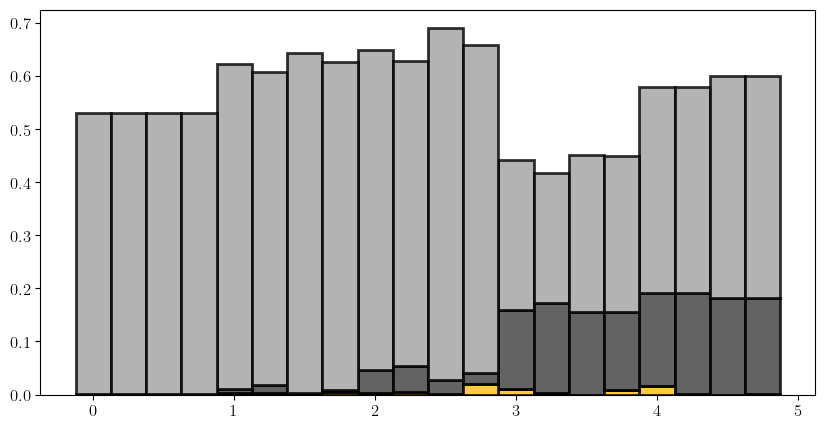

In [186]:
from matplotlib.patches import Patch

print(fueled_energy_by_fs)

# Prepare data for plotting
income_classes = ['First quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Fifth quintile']
case_studies = list(fueled_energy_by_fs.keys())
fueling_type_ids = list(l_dict.keys())  # All fueling types
case_study_colors = {
    "Undershoot of goals": "#42047e",
    "Overshoot of goals": "#07f49e"
}
# Get fueling type names for legend
fueling_type_names = [l_dict[lid]['fueling_type'] for lid in fueling_type_ids]
fueling_type_colors = {
    'home': '#72DDF7',
    'work': '#FFBE0B',
    'public_fast': '#C1839F',
    'public_slow': '#3C3C3C',
    'public_fossil': '#A0A0A0'
}
colors = {
    "Undershoot of goals": "#42047e",
    "Overshoot of goals": "#07f49e",
}
# Prepare data: dict[case][fueling_type][income_class]
data = {case: {ftype: [] for ftype in fueling_type_ids} for case in case_studies}
for case in case_studies:
    for lid in fueling_type_ids:
        for fs in income_classes:
            value = fueled_energy_by_fs[case].get((fs, lid), 0)
            data[case][lid].append(value)

x = np.arange(len(income_classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))
for i, case in enumerate(case_studies):
    bottom = np.zeros(len(income_classes))
    for lid in fueling_type_ids:
        # Scale values to 10^-6 (i.e., from Wh to GWh if original is Wh)
        values = np.array(data[case][lid]) * 1e-6
        color = fueling_type_colors.get(l_dict[lid]['fueling_type'], None)
        ax.bar(x + i * width, values, width=width, bottom=bottom, 
               label=l_dict[lid]['fueling_type'] if i == 0 else "", 
               color=color, alpha=0.8, edgecolor=case_study_colors.get(case, "black"), linewidth=2)
        bottom += values

# Custom legend for fueling types
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fueling_type_handles = [
    Patch(facecolor=fueling_type_colors[l_dict[lid]['fueling_type']],
          label=l_dict[lid]['fueling_type'],
          edgecolor='none')
    for lid in fueling_type_ids
]
fueling_type_labels = [l_dict[lid]['fueling_type'] for lid in fueling_type_ids]

case_patches = [Patch(facecolor='white', edgecolor=case_study_colors[cs], linewidth=2, label=cs) for cs in case_studies]
case_labels = case_studies

combined_handles = fueling_type_handles + case_patches
combined_labels = fueling_type_labels + case_labels

ax.legend(combined_handles, combined_labels, title="Fueling type / Roll-out strategy", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xticks(x + width)
ax.set_xticklabels(income_classes, rotation=30)
ax.set_ylabel("Fueled energy (GWh)")
ax.set_title("Fueled energy by income class, roll-out strategy, and fueling type")
ax.text(0.5, 50, "oasch", ha='center', va='bottom', fontsize=0.5, fontweight='bold')
plt.grid(True, axis='y', zorder=-1)
plt.xlabel("Consumer group by income level")
plt.show()

fig.savefig("rq_2_fueled_energy_by_income_fuelingtype_casestudy.pdf", bbox_inches="tight")


## Visualizing Sensitivity of Financial Status to Case Study Changes

The following visualizations show which financial status groups are most affected by changes in case study pairs:

- **Heatmap:** Maximum relative difference (%) for each financial status and case study pair.
- **Grouped Bar Chart:** Maximum relative difference (%) for each financial status, grouped by case study pair.

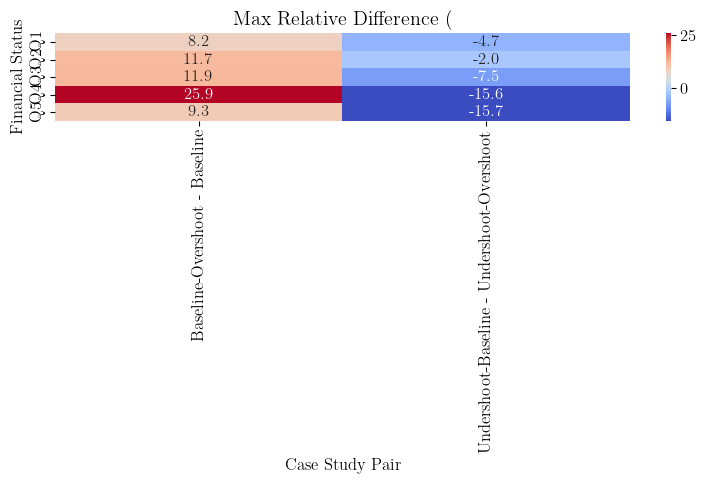

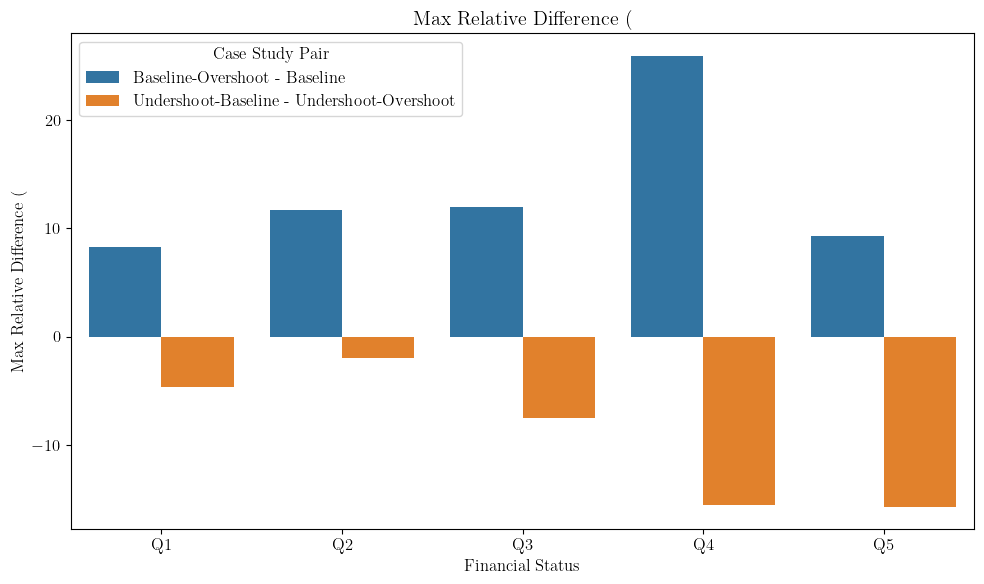

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate max relative differences for each financial status and case study pair (across all origins)
heatmap_data = []
bar_data = []
for fs in income_class_labels.keys():
    row = []
    for pair_name, (case1, case2) in enumerate(case_study_pairs):
        pair_label = f"{case1} - {case2}"
        # Get max relative difference across all origins for this fs and pair
        rel_diffs = [max_differences_by_fs[fs][origin][pair_label]['relative_diff_pct'] for origin in relevant_origins]
        max_rel_diff = max(rel_diffs) if rel_diffs else 0
        row.append(max_rel_diff)
        bar_data.append({'Financial Status': income_class_labels[fs], 'Case Study Pair': pair_label, 'Max Relative Difference (%)': max_rel_diff})
    heatmap_data.append(row)

# Prepare heatmap
heatmap_array = np.array(heatmap_data)
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_array, annot=True, fmt=".1f", cmap="coolwarm", xticklabels=[f"{a} - {b}" for a, b in case_study_pairs], yticklabels=[income_class_labels[fs] for fs in income_class_labels.keys()])
plt.title("Max Relative Difference (%) by Financial Status and Case Study Pair")
plt.xlabel("Case Study Pair")
plt.ylabel("Financial Status")
plt.tight_layout()
plt.show()

# Prepare grouped bar chart
bar_df = pd.DataFrame(bar_data)
plt.figure(figsize=(10, 6))
sns.barplot(data=bar_df, x='Financial Status', y='Max Relative Difference (%)', hue='Case Study Pair')
plt.title("Max Relative Difference (%) by Financial Status and Case Study Pair")
plt.ylabel("Max Relative Difference (%)")
plt.xlabel("Financial Status")
plt.legend(title="Case Study Pair")
plt.tight_layout()
plt.show()

## Sensitivity Development Throughout the Years

The following visualization shows how the relative differences between case study pairs evolve over time for each financial status. This helps identify periods of higher sensitivity and trends across years.

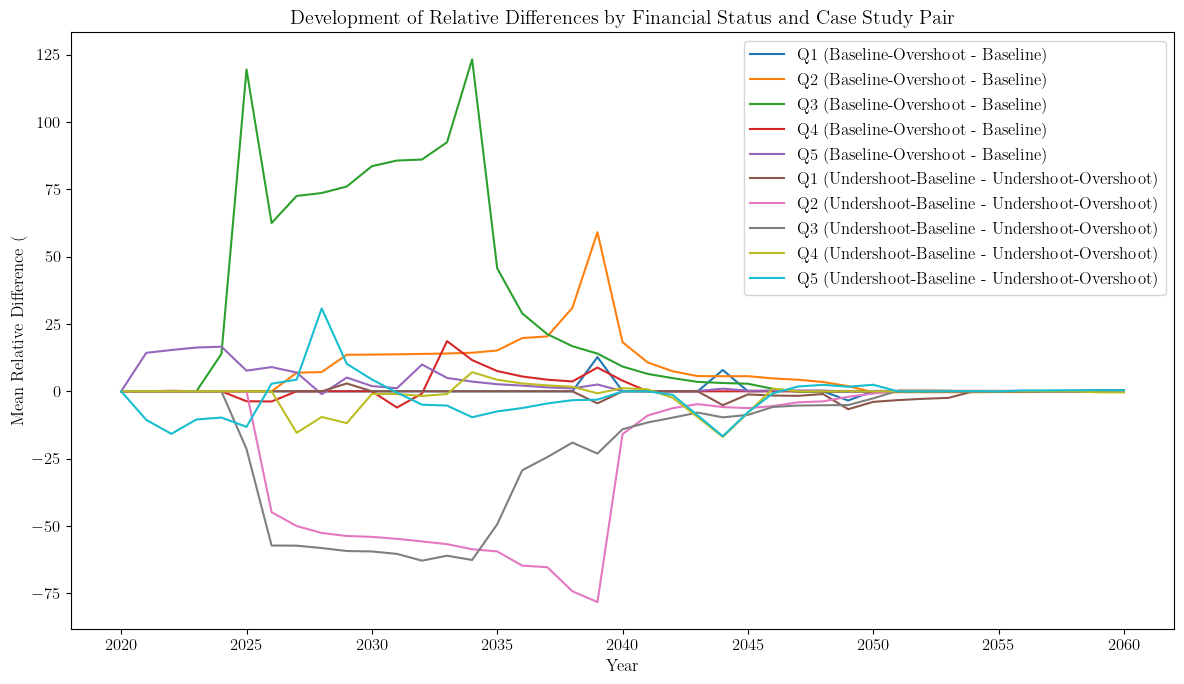

In [188]:
plt.figure(figsize=(12, 7))
for pair_name, (case1, case2) in enumerate(case_study_pairs):
    pair_label = f"{case1} - {case2}"
    for fs in income_class_labels.keys():
        rel_diffs_by_year = []
        for year in years_range:
            # Aggregate across origins (mean relative diff for this year, fs, pair)
            diffs = []
            for origin in relevant_origins:
                case1_val = amount_battery_electric_vehs_by_fs[case1][fs][origin].get(year, 0)
                case2_val = amount_battery_electric_vehs_by_fs[case2][fs][origin].get(year, 0)
                if case2_val > 0:
                    rel_diff = ((case1_val - case2_val) / case2_val) * 100
                else:
                    rel_diff = 0
                diffs.append(rel_diff)
            # Use mean for smoother trend
            rel_diffs_by_year.append(np.mean(diffs))
        plt.plot(list(years_range), rel_diffs_by_year, label=f"{income_class_labels[fs]} ({pair_label})")

plt.title("Development of Relative Differences by Financial Status and Case Study Pair")
plt.xlabel("Year")
plt.ylabel("Mean Relative Difference (%)")
plt.legend()
plt.tight_layout()
plt.show()

## Sensitivity Development Throughout the Years for Regions ES211 and ES212

The following visualization shows how the relative differences between case study pairs evolve over time for each financial status, specifically for regions ES211 and ES212.

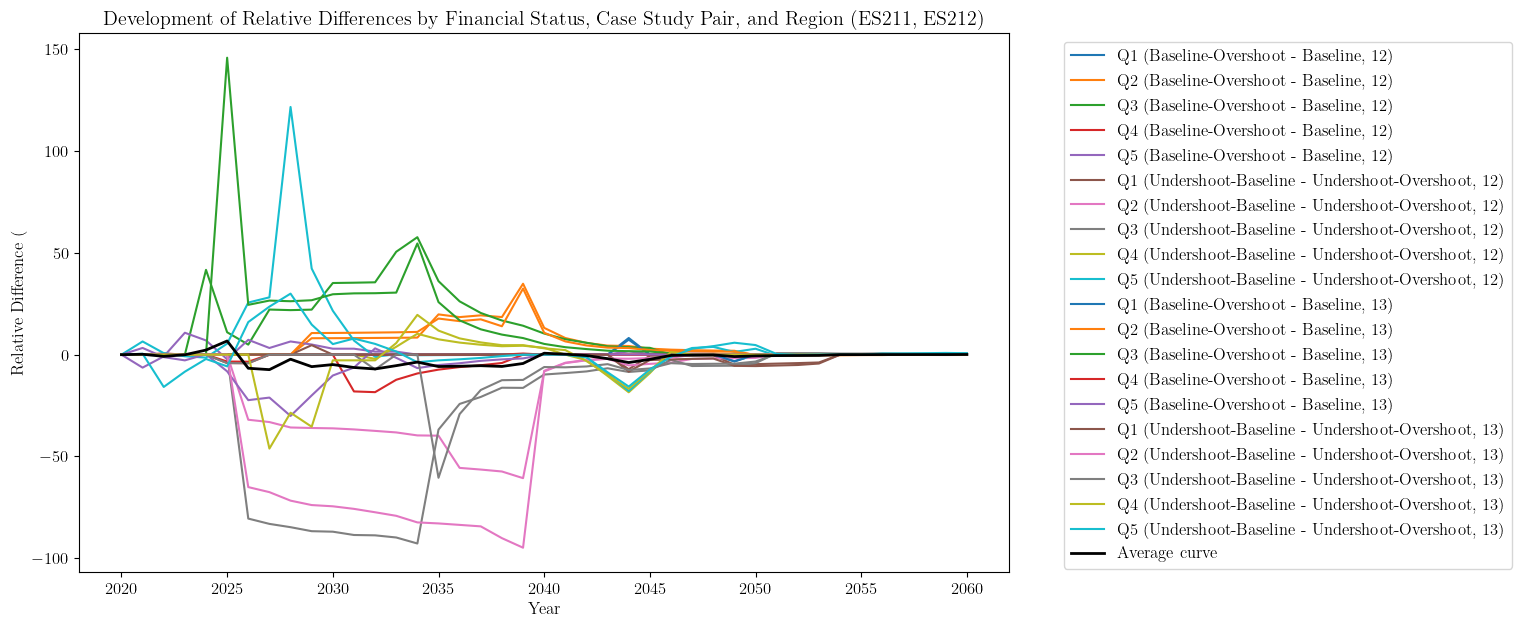

In [189]:
regions_to_plot = [12, 13]

plt.figure(figsize=(12, 7))
for region in regions_to_plot:
    for pair_name, (case1, case2) in enumerate(case_study_pairs):
        pair_label = f"{case1} - {case2}"
        for fs in income_class_labels.keys():
            rel_diffs_by_year = []
            for year in years_range:
                case1_val = amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0)
                case2_val = amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0)
                if case2_val > 0:
                    rel_diff = ((case1_val - case2_val) / case2_val) * 100
                else:
                    rel_diff = 0
                rel_diffs_by_year.append(rel_diff)
            plt.plot(list(years_range), rel_diffs_by_year, label=f"{income_class_labels[fs]} ({pair_label}, {region})")
            # Calculate and plot the average curve across all curves
            all_curves = []

for region in regions_to_plot:
    for pair_name, (case1, case2) in enumerate(case_study_pairs):
        for fs in income_class_labels.keys():
            rel_diffs_by_year = []
            for year in years_range:
                case1_val = amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0)
                case2_val = amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0)
                if case2_val > 0:
                    rel_diff = ((case1_val - case2_val) / case2_val) * 100
                else:
                    rel_diff = 0
                rel_diffs_by_year.append(rel_diff)
            all_curves.append(rel_diffs_by_year)

# Compute average curve
avg_curve = np.mean(np.array(all_curves), axis=0)
plt.plot(list(years_range), avg_curve, color='black', linewidth=2, label='Average curve')
plt.title("Development of Relative Differences by Financial Status, Case Study Pair, and Region (ES211, ES212)")
plt.xlabel("Year")
plt.ylabel("Relative Difference (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Average Sensitivity Curve for Regions ES211 and ES212

The following plot shows the average relative difference curve across all financial statuses and case study pairs for regions ES211 and ES212. This provides a summary view of overall sensitivity development throughout the years.

## Average Sensitivity Curve with 95% Quantile Range

The following plot shows the average relative difference curve for regions ES211 and ES212, with a shaded area representing the 2.5th to 97.5th percentile (95% quantile range) of all individual curves. This visualizes both the mean trend and the spread of the data.

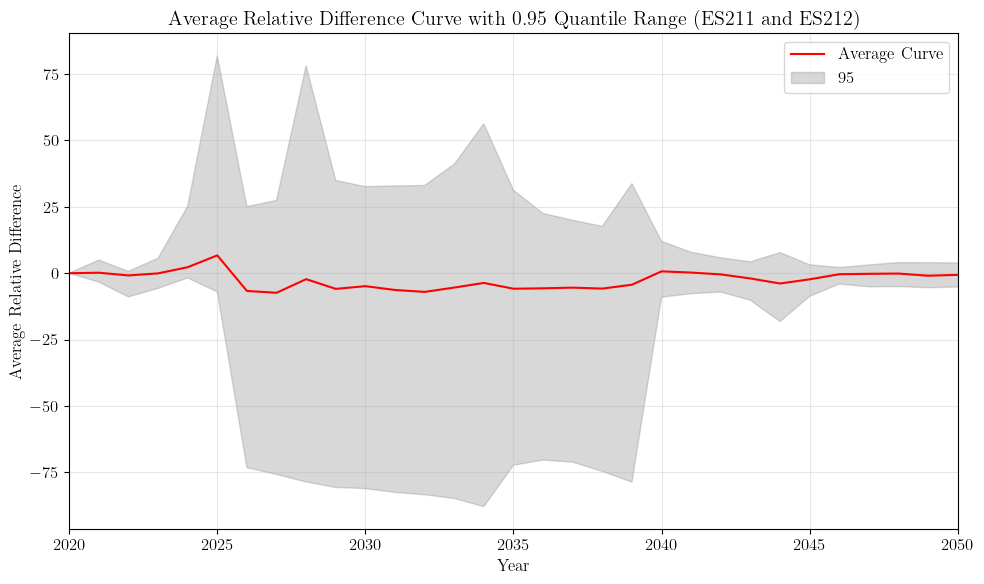

In [190]:
regions_to_plot = [12, 13]
all_curves = []

for year in years_range:
    year_diffs = []
    for region in regions_to_plot:
        for pair_name, (case1, case2) in enumerate(case_study_pairs):
            for fs in income_class_labels.keys():
                case1_val = amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0)
                case2_val = amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0)
                if case2_val > 0:
                    rel_diff = ((case1_val - case2_val) / case2_val) * 100
                else:
                    rel_diff = 0
                year_diffs.append(rel_diff)
    all_curves.append(year_diffs)

# Convert to array: shape (years, curves)
all_curves_array = np.array(all_curves).T  # shape: (num_curves, num_years)

# Calculate mean and quantiles for each year
mean_curve = np.mean(all_curves_array, axis=0)
lower_quantile = np.percentile(all_curves_array, 2.5, axis=0)
upper_quantile = np.percentile(all_curves_array, 97.5, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(list(years_range), mean_curve, color='red', label='Average Curve')
plt.fill_between(list(years_range), lower_quantile, upper_quantile, color='grey', alpha=0.3, label='95% Quantile Range')
plt.title("Average Relative Difference Curve with 0.95 Quantile Range (ES211 and ES212)")
plt.xlabel("Year")
plt.ylabel("Average Relative Difference")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([2020, 2050])
plt.tight_layout()
plt.show()

## Average Sensitivity Curve with 95% Quantile Range (Financial Status Accumulated)

This plot shows the average relative difference curve for regions ES211 and ES212, accumulating all financial statuses (not separated), with a shaded area for the 95% quantile range.

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:29: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:29: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\845110816.py:28: SyntaxWarning: invalid escape sequence '\%'
  plt.fill_between(list(years_range), lower_quantile_accum_fs, upper_quantile_accum_fs, color='grey', alpha=0.3, label='95$\%$ Quantile Range')
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\845110816.py:29: SyntaxWarning: invalid escape sequence '\%'
  plt.title("Average Relative Difference in electrification of commuter traffic with 95$\%$ Quantile Range \n through increased charging infrastructure expansion in ES213")
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\845110816.py:31: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("Average Relative Differe

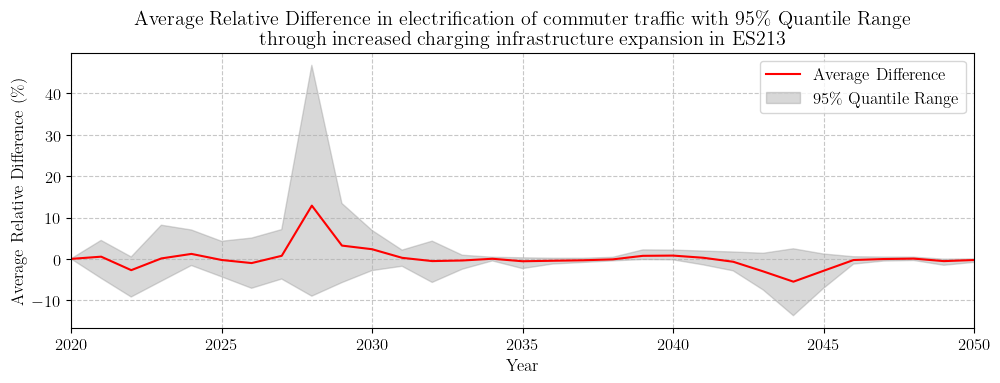

In [191]:
regions_to_plot = [12, 13]
all_curves_accum_fs = []

for year in years_range:
    year_diffs = []
    for region in regions_to_plot:
        for pair_name, (case1, case2) in enumerate(case_study_pairs):
            # Accumulate by financial status: sum over all fs for each region, pair, year
            case1_total = sum(amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0) for fs in income_class_labels.keys())
            case2_total = sum(amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0) for fs in income_class_labels.keys())
            if case2_total > 0:
                rel_diff = ((case1_total - case2_total) / case2_total) * 100
            else:
                rel_diff = 0
            year_diffs.append(rel_diff)
    all_curves_accum_fs.append(year_diffs)

# Convert to array: shape (years, curves)
all_curves_accum_fs_array = np.array(all_curves_accum_fs).T  # shape: (num_curves, num_years)

# Calculate mean and quantiles for each year
mean_curve_accum_fs = np.mean(all_curves_accum_fs_array, axis=0)
lower_quantile_accum_fs = np.percentile(all_curves_accum_fs_array, 2.5, axis=0)
upper_quantile_accum_fs = np.percentile(all_curves_accum_fs_array, 97.5, axis=0)

plt.figure(figsize=(10, 4))
plt.plot(list(years_range), mean_curve_accum_fs, color='red', label='Average Difference')
plt.fill_between(list(years_range), lower_quantile_accum_fs, upper_quantile_accum_fs, color='grey', alpha=0.3, label='95$\%$ Quantile Range')
plt.title("Average Relative Difference in electrification of commuter traffic with 95$\%$ Quantile Range \n through increased charging infrastructure expansion in ES213")
plt.xlabel("Year")
plt.ylabel("Average Relative Difference ($\%$)")
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim([2020, 2050])
plt.savefig("rq2_commmuter_traffic_adoption_es211_es212.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Average Sensitivity Curve with 95% Quantile Range and Maximum Difference Curve

This plot shows the average relative difference curve for ES211 and ES212 (financial status accumulated), the 95% quantile range, and the curve with the maximum difference at any year.

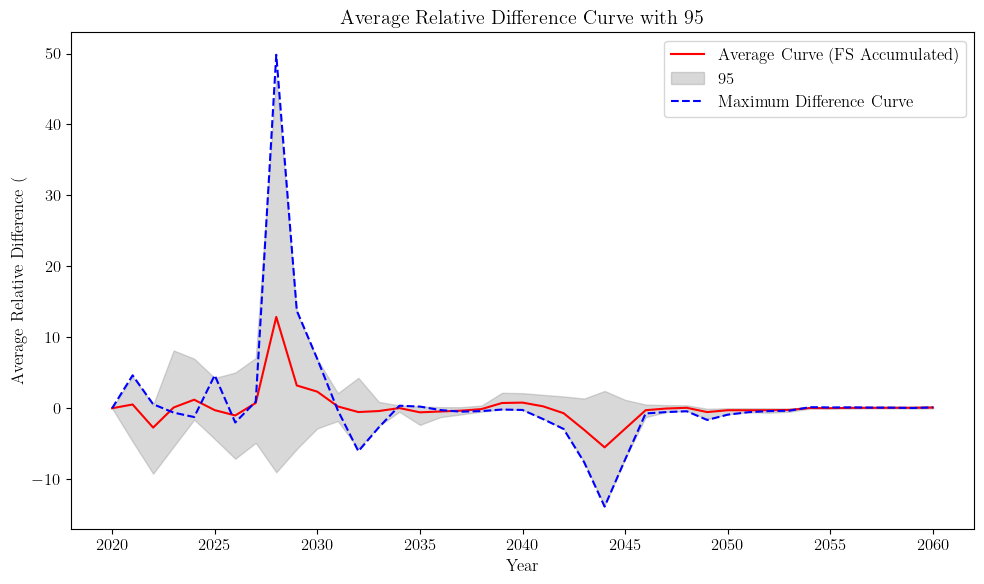

In [192]:
all_curves_accum_fs = []

for year in years_range:
    year_diffs = []
    for region in regions_to_plot:
        for pair_name, (case1, case2) in enumerate(case_study_pairs):
            # Accumulate by financial status: sum over all fs for each region, pair, year
            case1_total = sum(amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0) for fs in income_class_labels.keys())
            case2_total = sum(amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0) for fs in income_class_labels.keys())
            if case2_total > 0:
                rel_diff = ((case1_total - case2_total) / case2_total) * 100
            else:
                rel_diff = 0
            year_diffs.append(rel_diff)
    all_curves_accum_fs.append(year_diffs)

# Convert to array: shape (years, curves)
all_curves_accum_fs_array = np.array(all_curves_accum_fs).T  # shape: (num_curves, num_years)

# Calculate mean and quantiles for each year
mean_curve_accum_fs = np.mean(all_curves_accum_fs_array, axis=0)
lower_quantile_accum_fs = np.percentile(all_curves_accum_fs_array, 2.5, axis=0)
upper_quantile_accum_fs = np.percentile(all_curves_accum_fs_array, 97.5, axis=0)

# Find the curve with the maximum difference at any year
max_diff_curve_idx = np.argmax(np.max(np.abs(all_curves_accum_fs_array), axis=1))
max_diff_curve = all_curves_accum_fs_array[max_diff_curve_idx]

plt.figure(figsize=(10, 6))
plt.plot(list(years_range), mean_curve_accum_fs, color='red', label='Average Curve (FS Accumulated)')
plt.fill_between(list(years_range), lower_quantile_accum_fs, upper_quantile_accum_fs, color='grey', alpha=0.3, label='95% Quantile Range')
plt.plot(list(years_range), max_diff_curve, color='blue', linestyle='--', label='Maximum Difference Curve')
plt.title("Average Relative Difference Curve with 95% Quantile Range and Maximum Difference (ES211 and ES212, FS Accumulated)")
plt.xlabel("Year")
plt.ylabel("Average Relative Difference (%)")
plt.legend()
plt.tight_layout()
plt.show()

In [193]:
# Identify which curve gives the maximum difference
curve_info = []

for region in regions_to_plot:
    for pair_name, (case1, case2) in enumerate(case_study_pairs):
        curve = []
        for year in years_range:
            case1_total = sum(amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0) for fs in income_class_labels.keys())
            case2_total = sum(amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0) for fs in income_class_labels.keys())
            if case2_total > 0:
                rel_diff = ((case1_total - case2_total) / case2_total) * 100
            else:
                rel_diff = 0
            curve.append(rel_diff)
        curve_info.append({'region': region, 'case_study_pair': f'{case1} - {case2}', 'curve': curve})

# Find the curve with the maximum absolute difference at any year
max_diff = 0
max_curve_details = None
for info in curve_info:
    curve_max = np.max(np.abs(info['curve']))
    if curve_max > max_diff:
        max_diff = curve_max
        max_curve_details = info

print("Curve with maximum absolute difference:")
print(f"Region: {max_curve_details['region']}")
print(f"Case Study Pair: {max_curve_details['case_study_pair']}")
print(f"Maximum absolute difference: {max_diff:.2f}%")

Curve with maximum absolute difference:
Region: 12
Case Study Pair: Undershoot-Baseline - Undershoot-Overshoot
Maximum absolute difference: 49.83%


## Average Sensitivity Curve with 95% Quantile Range, Maximum Difference Curve, and Q1 Curve

This plot shows the average curve, 95% quantile range, maximum difference curve, and the Q1 curve (Undershoot-Baseline - Undershoot-Overshoot) for both ES211 and ES212.

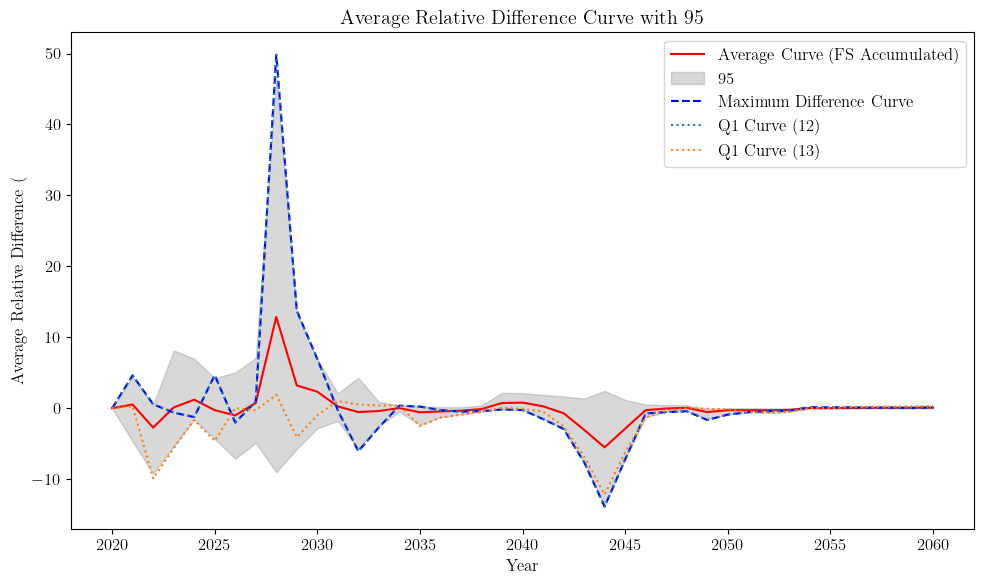

In [194]:
all_curves_accum_fs = []
q1_curves = []

for year in years_range:
    year_diffs = []
    q1_diffs = []
    for region in regions_to_plot:
        for pair_name, (case1, case2) in enumerate(case_study_pairs):
            # Accumulate by financial status: sum over all fs for each region, pair, year
            case1_total = sum(amount_battery_electric_vehs_by_fs[case1][fs][region].get(year, 0) for fs in income_class_labels.keys())
            case2_total = sum(amount_battery_electric_vehs_by_fs[case2][fs][region].get(year, 0) for fs in income_class_labels.keys())
            if case2_total > 0:
                rel_diff = ((case1_total - case2_total) / case2_total) * 100
            else:
                rel_diff = 0
            year_diffs.append(rel_diff)
            # Q1 curve: Undershoot-Baseline - Undershoot-Overshoot
            if (case1, case2) == ('Undershoot-Baseline', 'Undershoot-Overshoot'):
                q1_diffs.append(rel_diff)
    all_curves_accum_fs.append(year_diffs)
    q1_curves.append(q1_diffs)

# Convert to array: shape (years, curves)
all_curves_accum_fs_array = np.array(all_curves_accum_fs).T  # shape: (num_curves, num_years)
q1_curves_array = np.array(q1_curves).T  # shape: (num_regions, num_years)

# Calculate mean and quantiles for each year
mean_curve_accum_fs = np.mean(all_curves_accum_fs_array, axis=0)
lower_quantile_accum_fs = np.percentile(all_curves_accum_fs_array, 2.5, axis=0)
upper_quantile_accum_fs = np.percentile(all_curves_accum_fs_array, 97.5, axis=0)

# Find the curve with the maximum difference at any year
max_diff_curve_idx = np.argmax(np.max(np.abs(all_curves_accum_fs_array), axis=1))
max_diff_curve = all_curves_accum_fs_array[max_diff_curve_idx]

plt.figure(figsize=(10, 6))
plt.plot(list(years_range), mean_curve_accum_fs, color='red', label='Average Curve (FS Accumulated)')
plt.fill_between(list(years_range), lower_quantile_accum_fs, upper_quantile_accum_fs, color='grey', alpha=0.3, label='95% Quantile Range')
plt.plot(list(years_range), max_diff_curve, color='blue', linestyle='--', label='Maximum Difference Curve')
for i, region in enumerate(regions_to_plot):
    plt.plot(list(years_range), q1_curves_array[i], linestyle=':', label=f'Q1 Curve ({region})')
plt.title("Average Relative Difference Curve with 95% Quantile Range, Maximum Difference, and Q1 Curve (ES211 and ES212, FS Accumulated)")
plt.xlabel("Year")
plt.ylabel("Average Relative Difference (%)")
plt.legend()
plt.tight_layout()
plt.show()

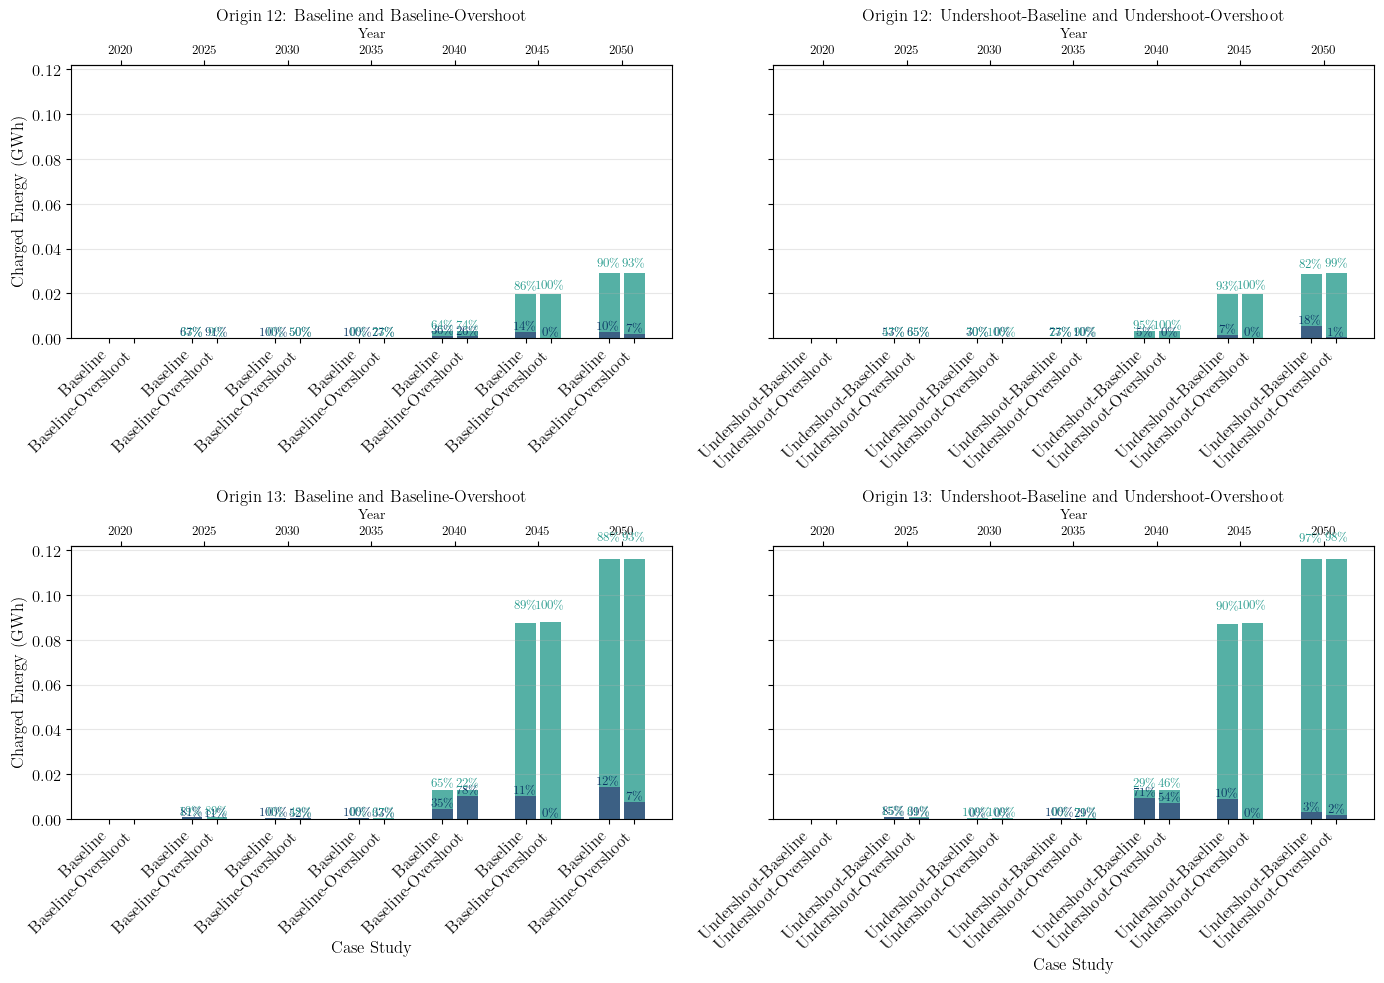

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# Define the case study groups for each subplot
case_study_groups = [
    ["Baseline", "Baseline-Overshoot"],
    ["Undershoot-Baseline", "Undershoot-Overshoot"]
]
all_origins = [12, 13]

case_study_order = ["Baseline", "Baseline-Overshoot",  "Undershoot-Baseline", "Undershoot-Overshoot"]

year_steps = [year for year in years_range if year % 5 == 0 and year <= 2050]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
colors = ['#0b3866', '#2a9d8f']

for row_idx, origin in enumerate(all_origins):
    for col_idx, case_group in enumerate(case_study_groups):
        ax = axes[row_idx, col_idx]
        x_tick_labels = []
        x_tick_positions = []
        group_centers = []

        for i, case in enumerate(case_group):
            origin_data = []
            destination_data = []
            for j, year in enumerate(year_steps):
                origin_energy = energy_at_origin.get((year, case, origin), 0) * 1e-6
                destination_energy = energy_at_dest.get((year, case, origin), 0) * 1e-6
                origin_data.append(origin_energy)
                destination_data.append(destination_energy)

            x_pos = np.arange(len(year_steps)) + i * 0.3  # Offset bars for each case
            width = 0.25

            bars_origin = ax.bar(x_pos, origin_data, width, label=f'{case} - Origin', color=colors[0], alpha=0.8)
            bars_dest = ax.bar(x_pos, destination_data, width, bottom=origin_data, label=f'{case} - Destination', color=colors[1], alpha=0.8)

            for j, (orig, dest) in enumerate(zip(origin_data, destination_data)):
                total = orig + dest
                if total > 0:
                    orig_pct = (orig / total) * 100
                    dest_pct = (dest / total) * 100
                    ax.text(x_pos[j], orig + orig * 0.02, f'{orig_pct:.0f}$\\%$', ha='center', va='bottom', fontsize=9, color=colors[0])
                    ax.text(x_pos[j], total + total * 0.06, f'{dest_pct:.0f}$\\%$', ha='center', va='bottom', fontsize=9, color=colors[1])

            # Add tick labels with case study name
            for j, year in enumerate(year_steps):
                x_tick_labels.append(f"{case}")
                x_tick_positions.append(x_pos[j])

        # Calculate group centers for each year (for the top axis)
        for j in range(len(year_steps)):
            group_center = np.mean([np.arange(len(year_steps))[j] + i * 0.3 for i in range(len(case_group))])
            group_centers.append(group_center)

        ax.set_title(f'Origin {origin}: {case_group[0]} and {case_group[1]}', fontsize=12, fontweight='bold')
        ax.set_xticks(x_tick_positions)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        if row_idx == 1:
            ax.set_xlabel('Case Study')
        if col_idx == 0:
            ax.set_ylabel('Charged Energy (GWh)')
        # Add a secondary x-axis for years above the bars (one tick per year group)
        secax = ax.secondary_xaxis('top')
        secax.set_xticks(group_centers)
        secax.set_xticklabels([str(year) for year in year_steps], rotation=0, ha='center', fontsize=9)
        secax.set_xlabel('Year', fontsize=10)
        # Set y-axis independently for each subplot (no sharey)
        ax.autoscale(enable=True, axis='y')

plt.tight_layout()
plt.show()

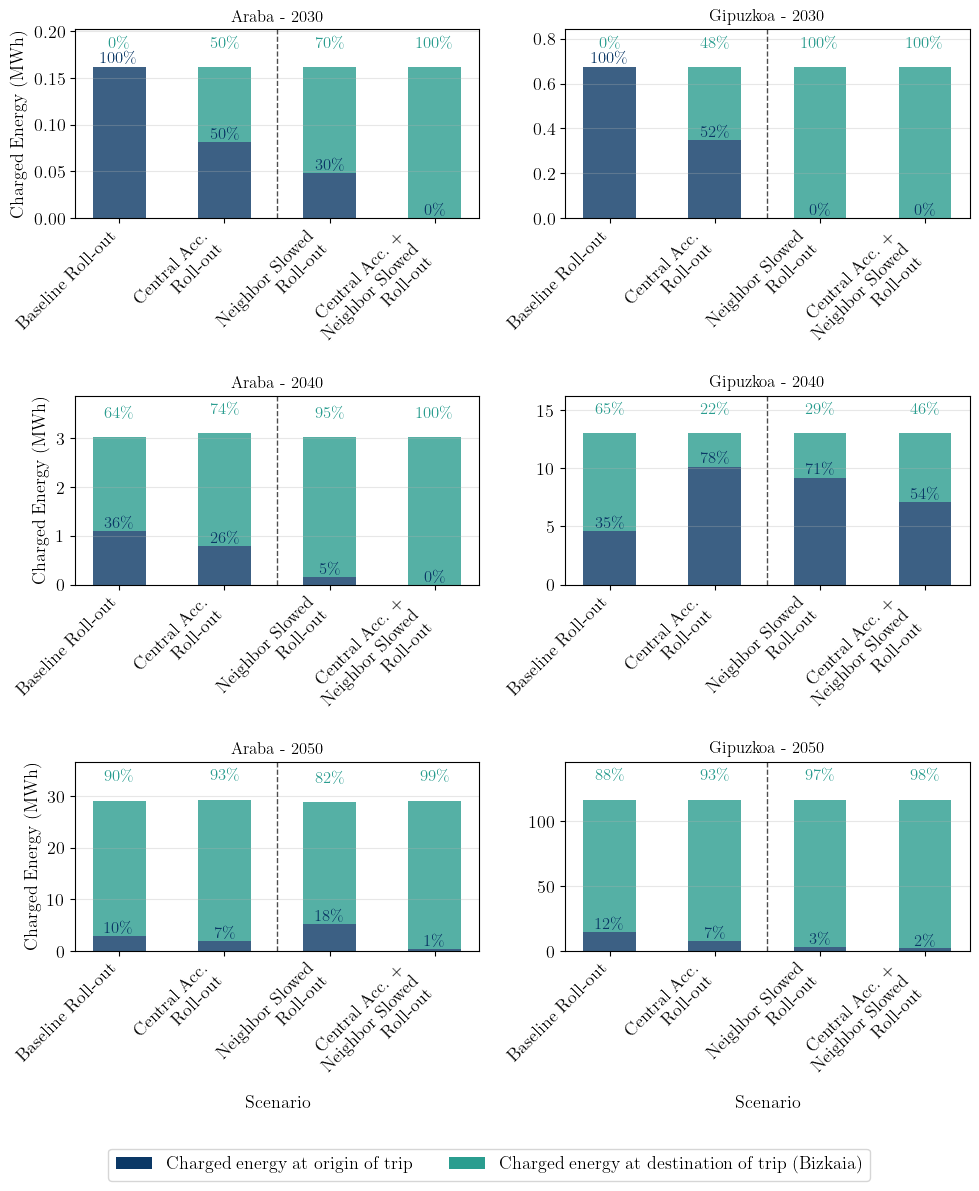

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

year_steps = [2030, 2040, 2050]
fig, axes = plt.subplots(len(year_steps), len(all_origins), figsize=(10, 12))  # Adjusted to 3x2 layout
plt.rcParams.update({'font.size': 13})  # Set the default font size to 13

# Ensure axes is a 2D array for consistent indexing
axes = np.atleast_2d(axes)

for row_idx, year in enumerate(year_steps):
    for col_idx, origin in enumerate(all_origins):
        ax = axes[row_idx, col_idx]
        x_base = np.arange(len(case_studies))  # one base per case study
        bar_width = 0.5  # Increased bar width

        origin_data = []
        destination_data = []
        for case in case_studies:
            origin_energy = energy_at_origin.get((year, case, origin), 0) * 1e-3
            destination_energy = energy_at_dest.get((year, case, origin), 0) * 1e-3
            origin_data.append(origin_energy)
            destination_data.append(destination_energy)

        x_pos = x_base
        ax.bar(x_pos, origin_data, bar_width, label='Origin', color=colors[0], alpha=0.8)
        ax.bar(x_pos, destination_data, bar_width, bottom=origin_data, label='Destination', color=colors[1], alpha=0.8)

        # Add text labels for percentages
        for i, (orig, dest) in enumerate(zip(origin_data, destination_data)):
            total = orig + dest
            if total > 0:
                ax.text(
                    x_pos[i], orig + orig * 0.01,
                    f'{orig/total*100:.0f}$\\%$', ha='center', va='bottom',
                    fontsize=12, color=colors[0]
                )
                ax.text(
                    x_pos[i], total + total * 0.11,
                    f'{dest/total*100:.0f}$\\%$', ha='center', va='bottom',
                    fontsize=12, color=colors[1]
                )

        # Adjust y-limits dynamically to make room for labels
        y_max = max([o + d for o, d in zip(origin_data, destination_data)])
        if y_max > 0:
            ax.set_ylim(0, y_max * 1.25)  # leave 25% headroom

        ax.set_xticks(x_base)
        ax.set_xticklabels(
            [correct_case_study_names[case] for case in case_studies],
            rotation=45, ha='right'
        )
        ax.set_title(f'{region_names[origin]} - {year}', fontsize=12)
        ax.grid(True, alpha=0.3, axis='y')

        if row_idx == len(year_steps) - 1:
            ax.set_xlabel("Scenario")
        if col_idx == 0:
            ax.set_ylabel('Charged Energy (MWh)')
for ax in axes.flatten():
    # Insert a vertical line between the first two and the second two scenarios
    ax.axvline(x=1.5, color='black', linestyle='--', linewidth=1, alpha=0.7)
# Add a legend for the entire figure
fig.legend(
    handles=[
        Patch(facecolor=colors[0], edgecolor='none', label='Charged energy at origin of trip'),
        Patch(facecolor=colors[1], edgecolor='none', label='Charged energy at destination of trip (Bizkaia)')
    ],
    loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.05)
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("rq2_charged_energy_by_origin_case_subplot.pdf", format="pdf", bbox_inches="tight")
plt.show()



<>:61: SyntaxWarning: invalid escape sequence '\%'
<>:61: SyntaxWarning: invalid escape sequence '\%'
C:\Users\simuser\AppData\Local\Temp\ipykernel_23640\2058966714.py:61: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel("Electrification share ($\%$)", fontsize=16)


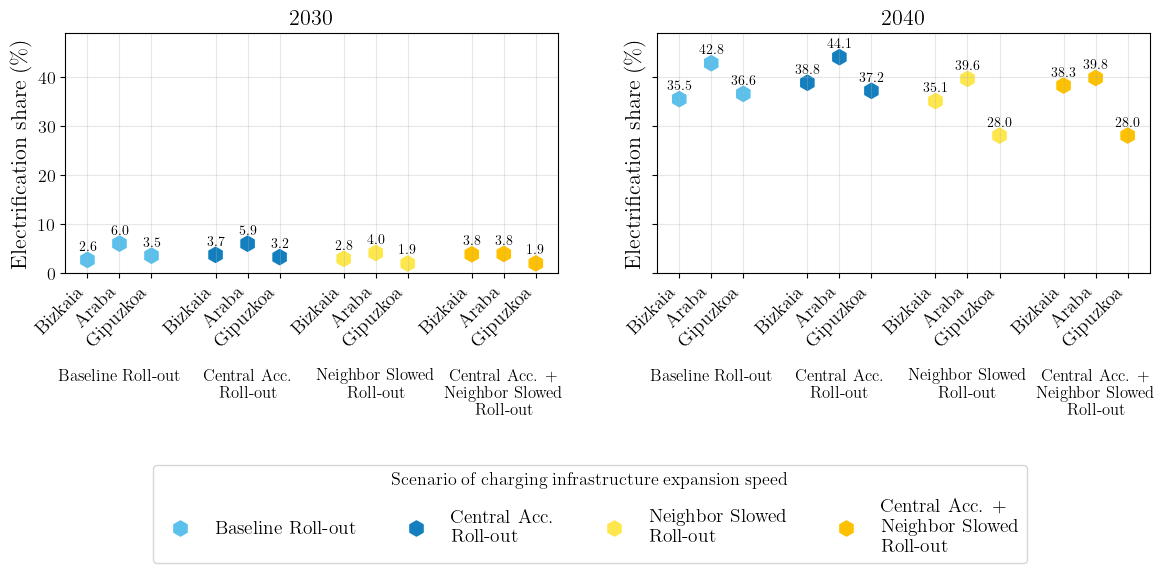

In [144]:
import numpy as np
import matplotlib.pyplot as plt

years_to_plot = [2030, 2040]
case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Baseline", "Undershoot-Overshoot"]

correct_case_study_names = {
    "Baseline": "Baseline Roll-out",
    "Baseline-Overshoot": "Central Acc. \nRoll-out",
    "Undershoot-Baseline": "Neighbor Slowed\nRoll-out",
    "Undershoot-Overshoot": "Central Acc. +\n Neighbor Slowed \nRoll-out"
}

region_names = {12: "Araba", 13: "Gipuzkoa", 14: "Bizkaia"}
region_ids = [14, 12, 13]
colors = ["#5bc0eb", "#137fbf", "#fde74c", "#fdc100"]  # Added color for 4th case study

fig, axes = plt.subplots(1, len(years_to_plot), figsize=(14, 5), sharey=True)  # Adjusted to have 3 subplots
for subplot_idx, year in enumerate(years_to_plot):
    ax = axes[subplot_idx]
    
    x_positions = []
    y_values = []
    color_list = []
    case_positions = []
    width = 0.8
    spacing_between_cases = 1.0
    
    for cidx, case_study in enumerate(case_study_order):
        case_start = cidx * (len(region_ids) + spacing_between_cases)
        case_positions.append(case_start + (len(region_ids) - 1) / 2)  # Center position for case label
        
        for ridx, region in enumerate(region_ids):
            xpos = case_start + ridx
            ypos = tech_split_per_region[year][case_study][region] * 100
            x_positions.append(xpos)
            y_values.append(ypos)
            color_list.append(colors[cidx])
    
    ax.scatter(x_positions, y_values, c=color_list, s=120, marker='h')
    
    # Add text labels above markers
    for x, y in zip(x_positions, y_values):
        ax.text(x, y + 1.5, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)
    
    # Set region labels on x-axis
    ax.set_xticks(x_positions)
    xtick_labels = []
    for cidx, case_study in enumerate(case_study_order):
        for ridx, region in enumerate(region_ids):
            xtick_labels.append(f"{region_names[region]}")

    ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=14)    
    # Add case study labels beneath each region label
    for cidx, case_study in enumerate(case_study_order):
        case_start = cidx * (len(region_ids) + spacing_between_cases)
        xpos = case_start + (len(region_ids) - 1) / 2
        ax.text(xpos, -0.4, correct_case_study_names[case_study], ha='center', va='top', 
            transform=ax.get_xaxis_transform(), rotation=0, fontsize=12, fontweight='bold', color="black", style='italic')
    
    ax.set_ylabel("Electrification share ($\%$)", fontsize=16)
    ax.set_title(f"{year}", fontsize=16)
    ax.grid(True, alpha=0.3)
    
    # Increase ylim to accommodate text labels
    max_y = max(y_values)
    ax.set_ylim(0, max_y + 5)  # Add 5% padding above the highest text

# Add legend
handles = []
labels = []
for i, case_study in enumerate(case_study_order):
    handles.append(plt.scatter([], [], c=colors[i], s=120, marker='h'))
    labels.append(correct_case_study_names[case_study])
fig.legend(handles, labels, title="Scenario of charging infrastructure expansion speed", 
            bbox_to_anchor=(0.5, -0.2), ncol=4, loc='lower center', fontsize=14)
plt.subplots_adjust(bottom=0.4)  # Increase bottom margin to fit legend
plt.savefig("rq_2_electrification_share_by_scenario_and_region.pdf", bbox_inches="tight")
plt.show()



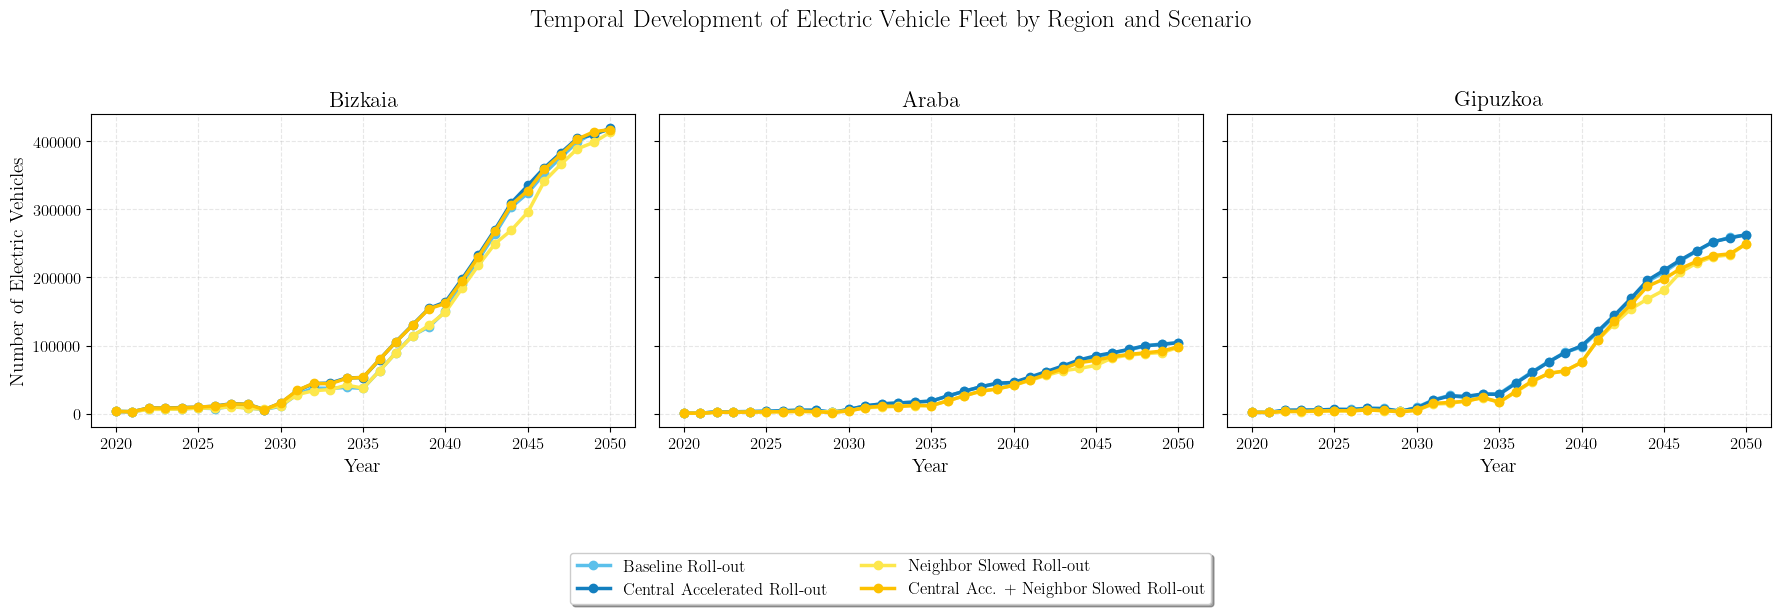

Temporal development plot created!


In [145]:
# Temporal development of electrification share by case study
import matplotlib.pyplot as plt
import numpy as np

case_study_order = ["Baseline", "Baseline-Overshoot", "Undershoot-Baseline", "Undershoot-Overshoot"]
correct_case_study_names = {
    "Baseline": "Baseline Roll-out",
    "Baseline-Overshoot": "Central Accelerated Roll-out",
    "Undershoot-Baseline": "Neighbor Slowed Roll-out",
    "Undershoot-Overshoot": "Central Acc. + Neighbor Slowed Roll-out"
}

colors_cases = ["#5bc0eb", "#137fbf", "#fde74c", "#fdc100"]
region_names = {12: "Araba", 13: "Gipuzkoa", 14: "Bizkaia"}

# Get all years available
all_years = sorted(veh_elec_per_region.keys())

# Create figure with subplots for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, (region_id, region_name) in enumerate([(14, "Bizkaia"), (12, "Araba"), (13, "Gipuzkoa")]):
    ax = axes[idx]
    
    for cidx, case_study in enumerate(case_study_order):
        years = []
        electric_vehicles = []
        
        for year in all_years:
            if case_study in veh_elec_per_region.get(year, {}):
                if region_id in veh_elec_per_region[year][case_study]:
                    elec_veh = veh_elec_per_region[year][case_study][region_id]
                    years.append(year)
                    electric_vehicles.append(elec_veh)
        
        if years:
            ax.plot(years, electric_vehicles, 
                   color=colors_cases[cidx], 
                   linewidth=2.5, 
                   marker='o', 
                   markersize=6,
                   label=correct_case_study_names[case_study])
    
    # Formatting
    ax.set_xlabel('Year', fontsize=14, fontweight='bold')
    if idx == 0:
        ax.set_ylabel('Number of Electric Vehicles', fontsize=14, fontweight='bold')
    
    ax.set_title(region_name, fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Set y-axis limits
    # ax.set_ylim(0, 100)  # Auto-scale for absolute numbers

# Create shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.05),
          ncol=2, 
          fontsize=12, 
          frameon=True, 
          fancybox=True, 
          shadow=True)

fig.suptitle('Temporal Development of Electric Vehicle Fleet by Region and Scenario',
            fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.savefig('rq_2_electric_vehicles_temporal_development.pdf', dpi=300, bbox_inches='tight')
plt.show()

print('Temporal development plot created!')


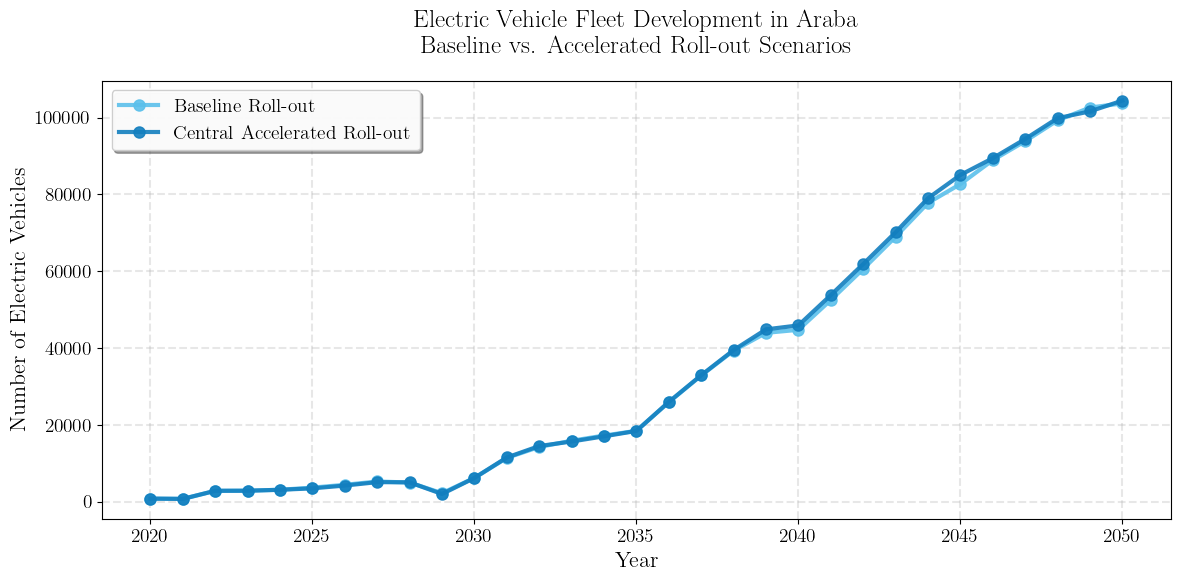

Comparison plot created for Araba!
Scenarios: Baseline Roll-out vs. Central Accelerated Roll-out


In [146]:
# Comparison of electric vehicle development in Araba
# Baseline Roll-out vs Central Accelerated Roll-out

import matplotlib.pyplot as plt
import numpy as np

# Focus on Araba (region_id = 12)
region_id = 12
region_name = "Araba"

# Compare these two scenarios
scenarios_to_compare = [
    ("Baseline", "Baseline Roll-out", "#5bc0eb"),
    ("Baseline-Overshoot", "Central Accelerated Roll-out", "#137fbf")
]

# Get all years available
all_years = sorted(veh_elec_per_region.keys())

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot each scenario
for case_study, display_name, color in scenarios_to_compare:
    years = []
    electric_vehicles = []
    
    for year in all_years:
        if case_study in veh_elec_per_region.get(year, {}):
            if region_id in veh_elec_per_region[year][case_study]:
                elec_veh = veh_elec_per_region[year][case_study][region_id]
                years.append(year)
                electric_vehicles.append(elec_veh)
    
    if years:
        ax.plot(years, electric_vehicles, 
               color=color, 
               linewidth=3, 
               marker='o', 
               markersize=8,
               label=display_name,
               alpha=0.9)

# Formatting
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Electric Vehicles', fontsize=16, fontweight='bold')
ax.set_title(f'Electric Vehicle Fleet Development in {region_name}\n' + 
            'Baseline vs. Accelerated Roll-out Scenarios',
            fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Legend
ax.legend(loc='upper left', fontsize=14, frameon=True, 
         fancybox=True, shadow=True, framealpha=0.95)

# Add grid on top of everything for better readability
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('rq_2_araba_baseline_vs_accelerated_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

print(f'Comparison plot created for {region_name}!')
print(f'Scenarios: Baseline Roll-out vs. Central Accelerated Roll-out')


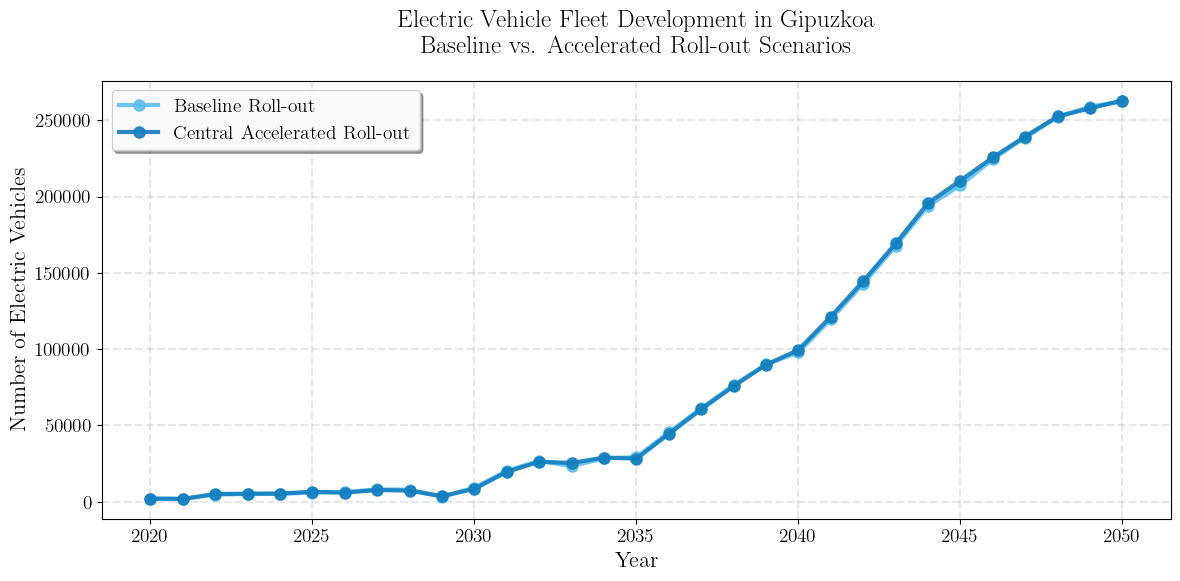

Comparison plot created for Gipuzkoa!
Scenarios: Baseline Roll-out vs. Central Accelerated Roll-out


In [147]:
# Comparison of electric vehicle development in Gipuzkoa
# Baseline Roll-out vs Central Accelerated Roll-out

import matplotlib.pyplot as plt
import numpy as np

# Focus on Gipuzkoa (region_id = 13)
region_id = 13
region_name = "Gipuzkoa"

# Compare these two scenarios
scenarios_to_compare = [
    ("Baseline", "Baseline Roll-out", "#5bc0eb"),
    ("Baseline-Overshoot", "Central Accelerated Roll-out", "#137fbf")
]

# Get all years available
all_years = sorted(veh_elec_per_region.keys())

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot each scenario
for case_study, display_name, color in scenarios_to_compare:
    years = []
    electric_vehicles = []
    
    for year in all_years:
        if case_study in veh_elec_per_region.get(year, {}):
            if region_id in veh_elec_per_region[year][case_study]:
                elec_veh = veh_elec_per_region[year][case_study][region_id]
                years.append(year)
                electric_vehicles.append(elec_veh)
    
    if years:
        ax.plot(years, electric_vehicles, 
               color=color, 
               linewidth=3, 
               marker='o', 
               markersize=8,
               label=display_name,
               alpha=0.9)

# Formatting
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Electric Vehicles', fontsize=16, fontweight='bold')
ax.set_title(f'Electric Vehicle Fleet Development in {region_name}\n' + 
            'Baseline vs. Accelerated Roll-out Scenarios',
            fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Legend
ax.legend(loc='upper left', fontsize=14, frameon=True, 
         fancybox=True, shadow=True, framealpha=0.95)

# Add grid on top of everything for better readability
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('rq_2_gipuzkoa_baseline_vs_accelerated_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

print(f'Comparison plot created for {region_name}!')
print(f'Scenarios: Baseline Roll-out vs. Central Accelerated Roll-out')


In [148]:
# Table: Maximum differences between Baseline and Central Accelerated Roll-out
import pandas as pd
import numpy as np

# Scenarios to compare
baseline = "Baseline"
accelerated = "Baseline-Overshoot"

# Regions
regions = {
    12: "Araba",
    13: "Gipuzkoa",
    14: "Bizkaia"
}

# Get all years
all_years = sorted(veh_elec_per_region.keys())

# Calculate differences for each region
results = []

for region_id, region_name in regions.items():
    # Collect data for both scenarios
    baseline_data = {}
    accelerated_data = {}
    
    for year in all_years:
        # Get baseline data
        if baseline in veh_elec_per_region.get(year, {}):
            if region_id in veh_elec_per_region[year][baseline]:
                baseline_data[year] = veh_elec_per_region[year][baseline][region_id]
        
        # Get accelerated data
        if accelerated in veh_elec_per_region.get(year, {}):
            if region_id in veh_elec_per_region[year][accelerated]:
                accelerated_data[year] = veh_elec_per_region[year][accelerated][region_id]
    
    # Calculate differences for common years
    common_years = set(baseline_data.keys()) & set(accelerated_data.keys())
    
    if not common_years:
        continue
    
    # Find maximum absolute difference
    max_abs_diff = 0
    max_abs_diff_year = None
    max_share_diff = 0
    max_share_diff_year = None
    
    for year in common_years:
        baseline_veh = baseline_data[year]
        accelerated_veh = accelerated_data[year]
        
        # Absolute difference
        abs_diff = accelerated_veh - baseline_veh
        if abs(abs_diff) > abs(max_abs_diff):
            max_abs_diff = abs_diff
            max_abs_diff_year = year
        
        # Get share data for percentage difference
        if baseline in tech_split_per_region.get(year, {}):
            if region_id in tech_split_per_region[year][baseline]:
                baseline_share = tech_split_per_region[year][baseline][region_id] * 100
                
                if accelerated in tech_split_per_region.get(year, {}):
                    if region_id in tech_split_per_region[year][accelerated]:
                        accelerated_share = tech_split_per_region[year][accelerated][region_id] * 100
                        
                        share_diff = accelerated_share - baseline_share
                        if abs(share_diff) > abs(max_share_diff):
                            max_share_diff = share_diff
                            max_share_diff_year = year
    
    # Store results
    results.append({
        'Region': region_name,
        'Max Abs. Difference (vehicles)': f'{max_abs_diff:,.0f}',
        'Year (Abs.)': max_abs_diff_year,
        'Max Share Difference (% points)': f'{max_share_diff:.2f}',
        'Year (Share)': max_share_diff_year
    })

# Create DataFrame
df = pd.DataFrame(results)

print('' + '='*90)
print('Maximum Differences: Central Accelerated Roll-out vs. Baseline Roll-out')
print('='*90)
print(df.to_string(index=False))
print('='*90)
print('Note: Positive values indicate higher numbers in Central Accelerated Roll-out')
print('      Negative values indicate higher numbers in Baseline Roll-out')


Maximum Differences: Central Accelerated Roll-out vs. Baseline Roll-out
  Region Max Abs. Difference (vehicles)  Year (Abs.) Max Share Difference (% points)  Year (Share)
   Araba                          2,374         2045                            2.16          2044
Gipuzkoa                          3,040         2045                            1.12          2044
 Bizkaia                         27,078         2039                            6.19          2039
Note: Positive values indicate higher numbers in Central Accelerated Roll-out
      Negative values indicate higher numbers in Baseline Roll-out


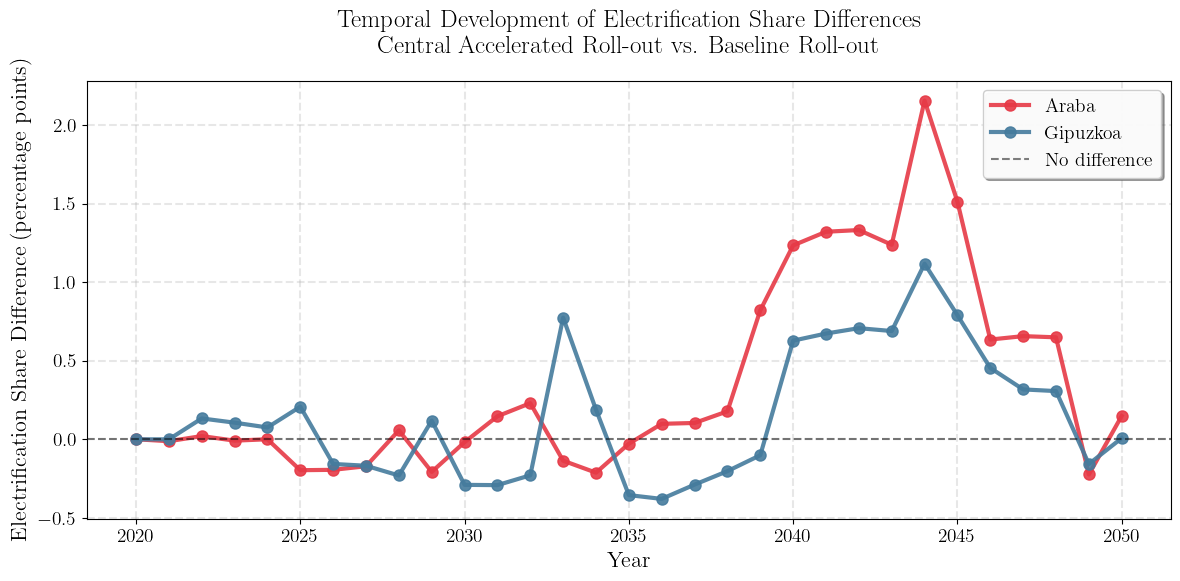

Share difference temporal development plot created!
Positive values: Central Accelerated has higher share
Negative values: Baseline has higher share


In [149]:
# Temporal development of electrification share differences
# Central Accelerated Roll-out vs. Baseline Roll-out

import matplotlib.pyplot as plt
import numpy as np

# Scenarios to compare
baseline = "Baseline"
accelerated = "Baseline-Overshoot"

# Regions to plot
regions_to_plot = [
    (12, "Araba", "#e63946"),
    (13, "Gipuzkoa", "#457b9d")
]

# Get all years
all_years = sorted(tech_split_per_region.keys())

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot for each region
for region_id, region_name, color in regions_to_plot:
    years = []
    share_differences = []
    
    for year in all_years:
        # Get baseline share
        if baseline in tech_split_per_region.get(year, {}):
            if region_id in tech_split_per_region[year][baseline]:
                baseline_share = tech_split_per_region[year][baseline][region_id] * 100
                
                # Get accelerated share
                if accelerated in tech_split_per_region.get(year, {}):
                    if region_id in tech_split_per_region[year][accelerated]:
                        accelerated_share = tech_split_per_region[year][accelerated][region_id] * 100
                        
                        # Calculate difference
                        share_diff = accelerated_share - baseline_share
                        years.append(year)
                        share_differences.append(share_diff)
    
    if years:
        ax.plot(years, share_differences, 
               color=color, 
               linewidth=3, 
               marker='o', 
               markersize=8,
               label=region_name,
               alpha=0.9)

# Add reference line at y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5, label='No difference')

# Formatting
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Electrification Share Difference (percentage points)', fontsize=16, fontweight='bold')
ax.set_title('Temporal Development of Electrification Share Differences\n' +
            'Central Accelerated Roll-out vs. Baseline Roll-out',
            fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Legend
ax.legend(loc='best', fontsize=14, frameon=True, 
         fancybox=True, shadow=True, framealpha=0.95)

# Add grid on top of everything for better readability
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('rq_2_share_difference_temporal_development.pdf', dpi=300, bbox_inches='tight')
plt.show()

print('Share difference temporal development plot created!')
print('Positive values: Central Accelerated has higher share')
print('Negative values: Baseline has higher share')


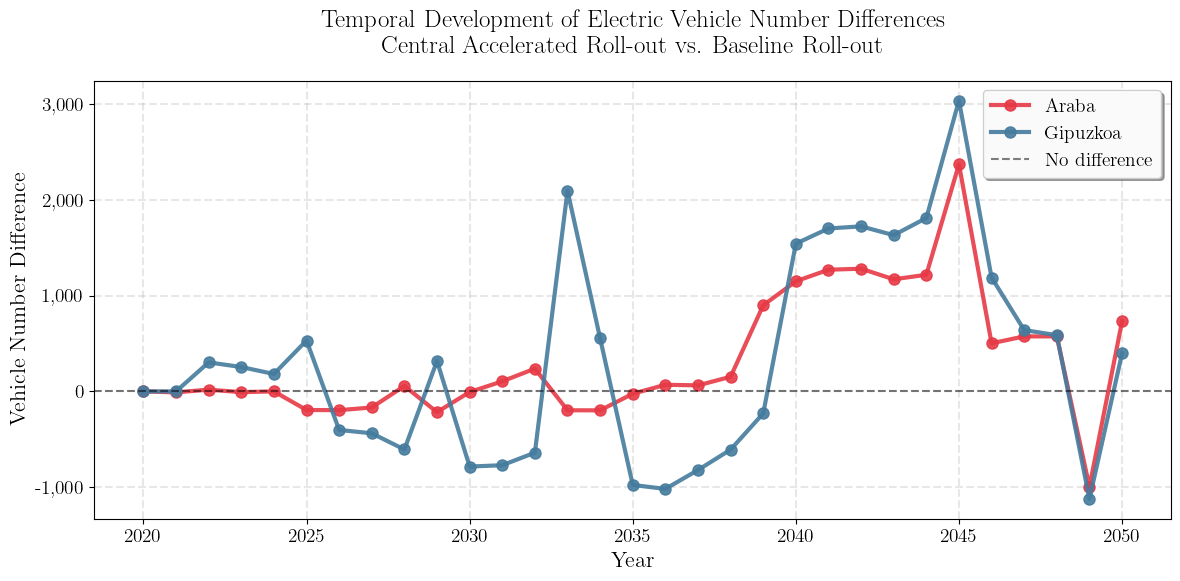

Vehicle number difference temporal development plot created!
Positive values: Central Accelerated has more vehicles
Negative values: Baseline has more vehicles


In [150]:
# Temporal development of absolute vehicle number differences
# Central Accelerated Roll-out vs. Baseline Roll-out

import matplotlib.pyplot as plt
import numpy as np

# Scenarios to compare
baseline = "Baseline"
accelerated = "Baseline-Overshoot"

# Regions to plot
regions_to_plot = [
    (12, "Araba", "#e63946"),
    (13, "Gipuzkoa", "#457b9d")
]

# Get all years
all_years = sorted(veh_elec_per_region.keys())

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot for each region
for region_id, region_name, color in regions_to_plot:
    years = []
    vehicle_differences = []
    
    for year in all_years:
        # Get baseline vehicle count
        if baseline in veh_elec_per_region.get(year, {}):
            if region_id in veh_elec_per_region[year][baseline]:
                baseline_veh = veh_elec_per_region[year][baseline][region_id]
                
                # Get accelerated vehicle count
                if accelerated in veh_elec_per_region.get(year, {}):
                    if region_id in veh_elec_per_region[year][accelerated]:
                        accelerated_veh = veh_elec_per_region[year][accelerated][region_id]
                        
                        # Calculate difference
                        veh_diff = accelerated_veh - baseline_veh
                        years.append(year)
                        vehicle_differences.append(veh_diff)
    
    if years:
        ax.plot(years, vehicle_differences, 
               color=color, 
               linewidth=3, 
               marker='o', 
               markersize=8,
               label=region_name,
               alpha=0.9)

# Add reference line at y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5, label='No difference')

# Formatting
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Vehicle Number Difference', fontsize=16, fontweight='bold')
ax.set_title('Temporal Development of Electric Vehicle Number Differences\n' +
            'Central Accelerated Roll-out vs. Baseline Roll-out',
            fontsize=18, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Format y-axis to show thousands separator
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Legend
ax.legend(loc='best', fontsize=14, frameon=True, 
         fancybox=True, shadow=True, framealpha=0.95)

# Add grid on top of everything for better readability
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('rq_2_vehicle_difference_temporal_development.pdf', dpi=300, bbox_inches='tight')
plt.show()

print('Vehicle number difference temporal development plot created!')
print('Positive values: Central Accelerated has more vehicles')
print('Negative values: Baseline has more vehicles')


In [151]:
for l in range(0, len(y_values)):
    print(f"x: {x_positions[l]}, y: {y_values[l]}")

x: 0.0, y: 35.50218410092721
x: 1.0, y: 42.84300019810222
x: 2.0, y: 36.573582776629024
x: 4.0, y: 38.84373340368607
x: 5.0, y: 44.07745125731375
x: 6.0, y: 37.20160836492669
x: 8.0, y: 35.1035203287152
x: 9.0, y: 39.64288779324764
x: 10.0, y: 28.042352431559543
x: 12.0, y: 38.27407470331028
x: 13.0, y: 39.81854828088521
x: 14.0, y: 28.04877297725875
